## GHRIBI SAIF EDDINE 
## MINI-PROJECT : GAUSSIAN MIXTURES

# Import libraries

In [2]:
options(warn = -1 )
install.packages("MASS",quiet = TRUE)
install.packages("abind",quiet = TRUE)
install.packages("mnormt",quiet = TRUE)
install.packages("LaplacesDemon",quiet = TRUE)
install.packages("coda",quiet = TRUE)
library(MASS)
library(abind)
library(mnormt)
library(LaplacesDemon)
library(coda)
library(repr)
dev.off()

package 'MASS' successfully unpacked and MD5 sums checked
package 'abind' successfully unpacked and MD5 sums checked
package 'mnormt' successfully unpacked and MD5 sums checked
package 'LaplacesDemon' successfully unpacked and MD5 sums checked
package 'coda' successfully unpacked and MD5 sums checked


null device 
          1

In [3]:
source(('fonctions_GM.R'))

# 1- Preliminaries
   


## Question 1

Generate a bi-variate dataset $X_{1:N}$ of size N = 500 from a Gaussian mixture with 3 components,
with parameters ($\mu_{1:3}$ = (0, 0),(1, 0),(0, 1)), with covariance matrices $\Sigma_{1:3}$ randomly drawn independently according to a Wishart distribution with parameter (ν = 4, S = $I_{2}$). To do so, use the
R function rwishart and set the seed of the random generator to 1 (by writing set.seed(1)
immediatly before generating the three covariance matrices). In order to keep track of the assignment of each $X_{i}$
, store the hidden variables $\xi_{i}$’s used to generate the $X_{i}$’s


In [9]:
set.seed(1)
nu = 4 ; 
S  =  0.02 * diag(2) ; 
sigma1 = rwishart(nu,S);
sigma2 = rwishart(nu,S);
sigma3 = rwishart(nu,S);
sigma = abind(sigma1,sigma2,sigma3,rev.along = 0)
Sigma = sigma 
Mu = array(0,dim = c(3,2)) 
Mu[1,]= c(0,0)
Mu[2,] = c(1,0)
Mu[3,] = c(0,1)
N = 500 ; 
X1 = mvrnorm(n = 500,mu = Mu[1,] ,Sigma = sigma1)
X2 = mvrnorm(n = 500,mu = Mu[2,] ,Sigma = sigma2)
X3 = mvrnorm(n = 500,mu = Mu[3,] ,Sigma = sigma3)
X = X1
rho = c(4/10,3/10,3/10)
p = rho 
Xi = rmultinom(500,1,rho)
Xi=t(Xi)
colors = c()
for (i in 1:N){
  
colors[i] = which.max(Xi[i,]);
  if (which.max(Xi[i,])==1 ){
    X[i,]=X1[i,] }
  
if (which.max(Xi[i,])==2 ){
    X[i,]=X2[i,]}
  if (which.max(Xi[i,])==3 ){
    X[i,]=X3[i,]

   }
}
dim(X)

[1] 500   2

### Comments
   X is succefully generated with N = 500 and d = 2,we can see the distribution of X in the next question.


## Question 2
Plot the generated data using one color for each mixture component, i.e. any point Xi such that
  $\xi_{i}$ = $j (j = 1, . . . , 3)$ should be assigned the $j^{th}$
color from R’s color palette (NB: this is achieved
with the option col = $j$ inside the plot function.)


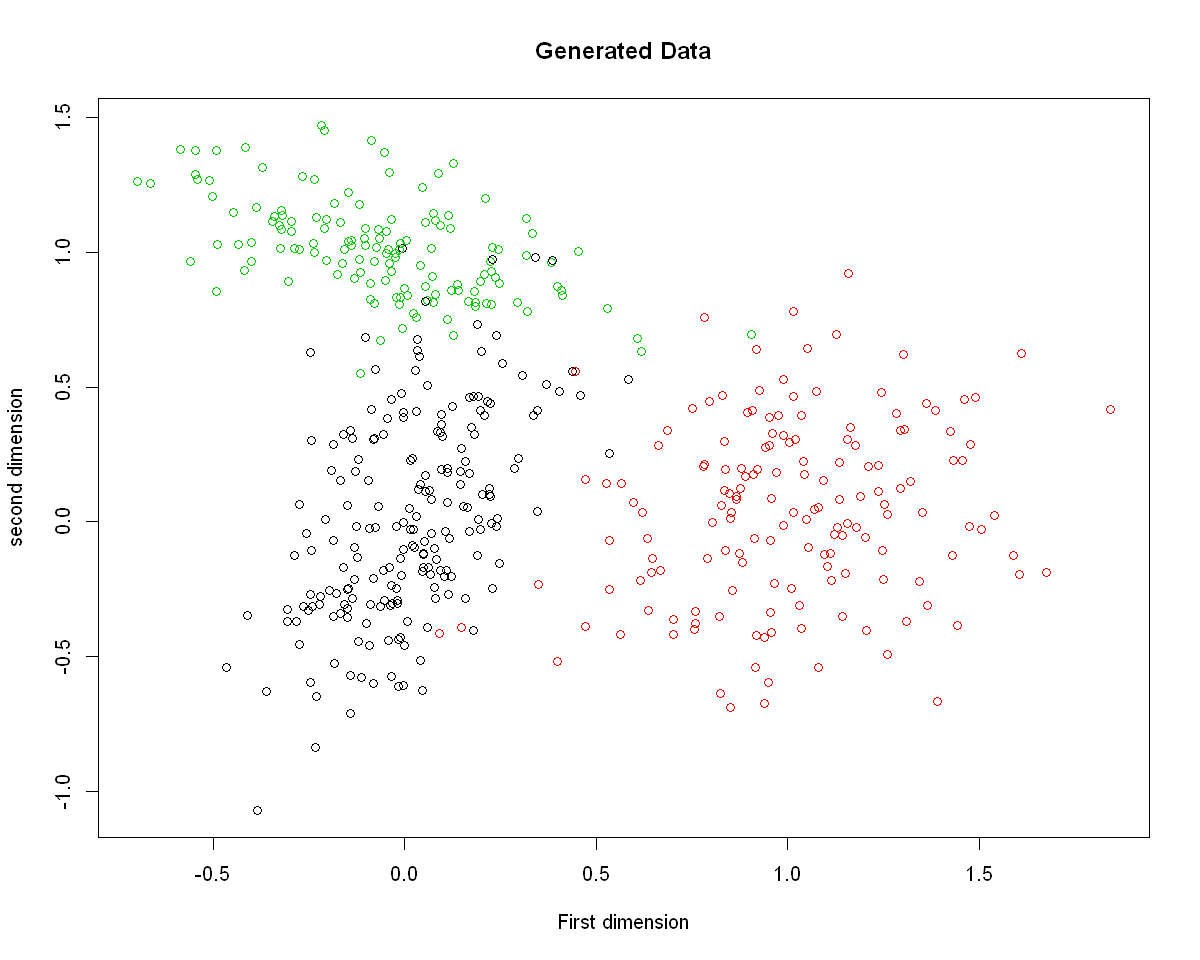

In [10]:
options(repr.plot.width=10, repr.plot.height=8)
plot(X[,1],X[,2],main="Generated Data",xlab="First dimension",ylab="second dimension",col = colors)


### Comments
We can see from the graph above that we have 3 clusters (3 colors) and its distributions are close to the defined  rho (3/10,3/10,4/10).


# 2- Variational Bayes
   


## Question 1
Complete the code of functions vbMStep, vbEstep and vbalgo. To choose the starting values
automatically, use the function initPar from the file fonctions_GM, which runs a simple
k-means. As a stopping criterion, use e.g. the squared $L_{2}$ norm between two successive values of
the parameters (when viewed as a concatenated single vector).


* Code in the file fonctions_GM.R
    

  

## Question 2
    Test your algorithm with the following code


[1] 152.0417 158.4767 189.7817

-0.0435227957,0.98530309
1.0114491217,0.05419288
0.0007566662,-0.03859344


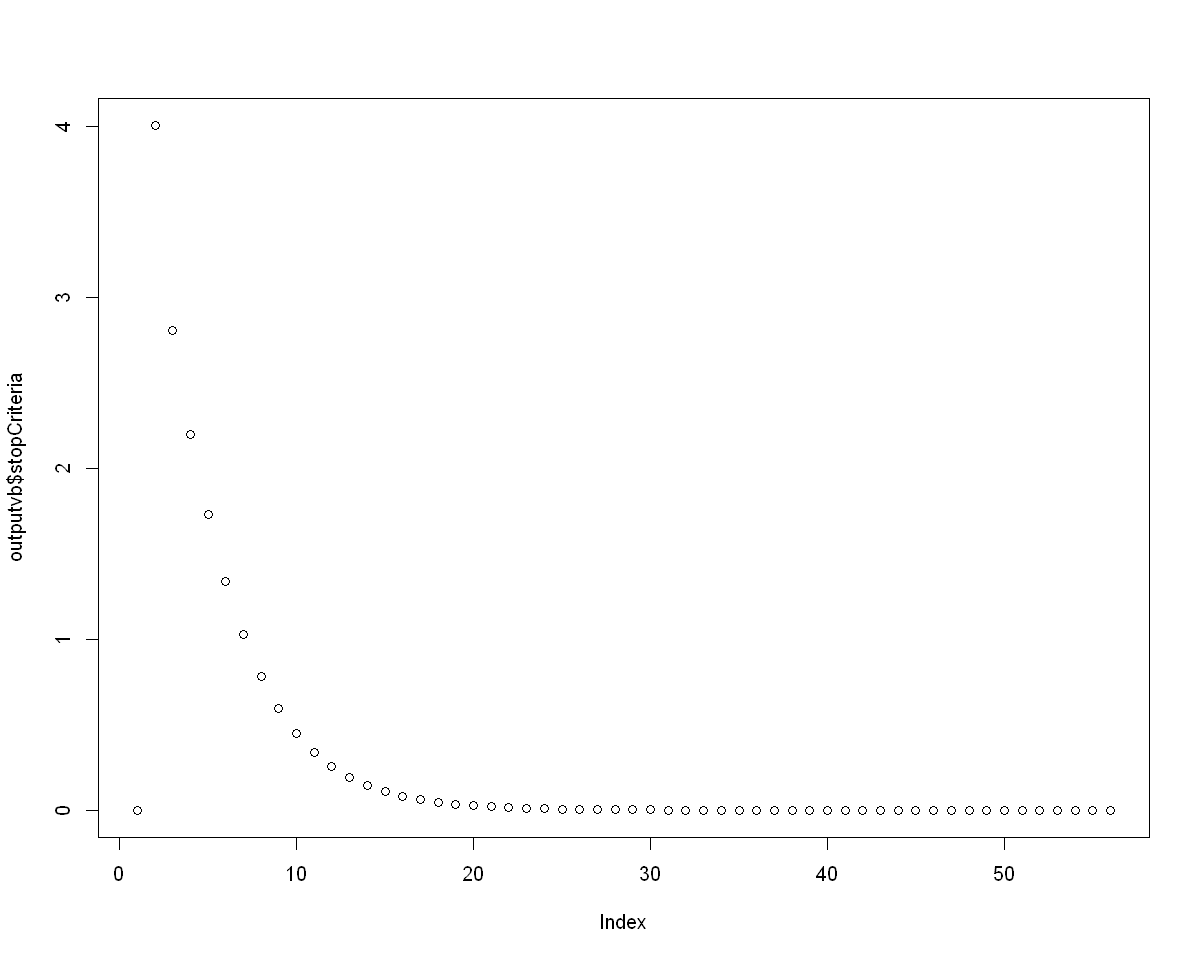

In [6]:
#' Bayesian model: 
#' p ~ dirichlet(alpha);  alpha = (alpha0, ... , alpha0)
#' [ xi | p ] ~ Multinomial(p)
#' [ mu_j | Lambda_j ] ~ Normal(m0, beta0 Lambda_j^(-1))
#' Lambda_j ~ Wishart(W0, nu0)
#' [ X| xi=j, mu, Lambda ] ~ Normal (mu_j, Lambda_j^(-1))

#' hyper-parameters : to be varied 
alpha0 <- 0.1
m0 <- array(0,dim=c(1,2))
beta0 <- 0.1
W0 <- 1*diag(2)
nu0 <- 10
Kfit = 3
#' Run VB 

seed <- 10
set.seed(seed)
outputvb <- vbalgo(x=X,k=Kfit, alpha0 = alpha0, W0inv = solve(W0),
                 nu0 = nu0, m0 = m0, beta0=beta0, tol=1e-6)
                 #' plot the Stopping criteria over iterations
plot(outputvb$stopCriteria)

#' show a summary of VB's output
T <- ncol(outputvb$Alphamat)
outputvb$Alphamat[,T]
outputvb$Marray[,,T]


### Comments
The Varitional Bayes converges after almost 30 iterations.

## Question 3

* To assess the quality of the ouput, we first compare the ground truth (true mixture density), with
the density of the mixture associated with point estimates ($ \widehat{\rho}$, $ \widehat{\mu}$, $ \widehat{\Lambda}^{-1}$) constructed from the VB
output. Namely , we choose as a parameter estimate, the posterior expectancy of this parameter in
    the variational approximation.</p>
   
* Write down the expression of ($ \widehat{\rho}$, $ \widehat{\mu}$, $ \widehat{\Lambda}^{-1}$) b in this framework, as a function of the VB output. </p>
   
* You may refer to Bishop (2006), Appendix B for expressions of expectancy’s of classical distributions.
    Plot a summary of the corresponding Gaussian mixture by completing the following code</p>


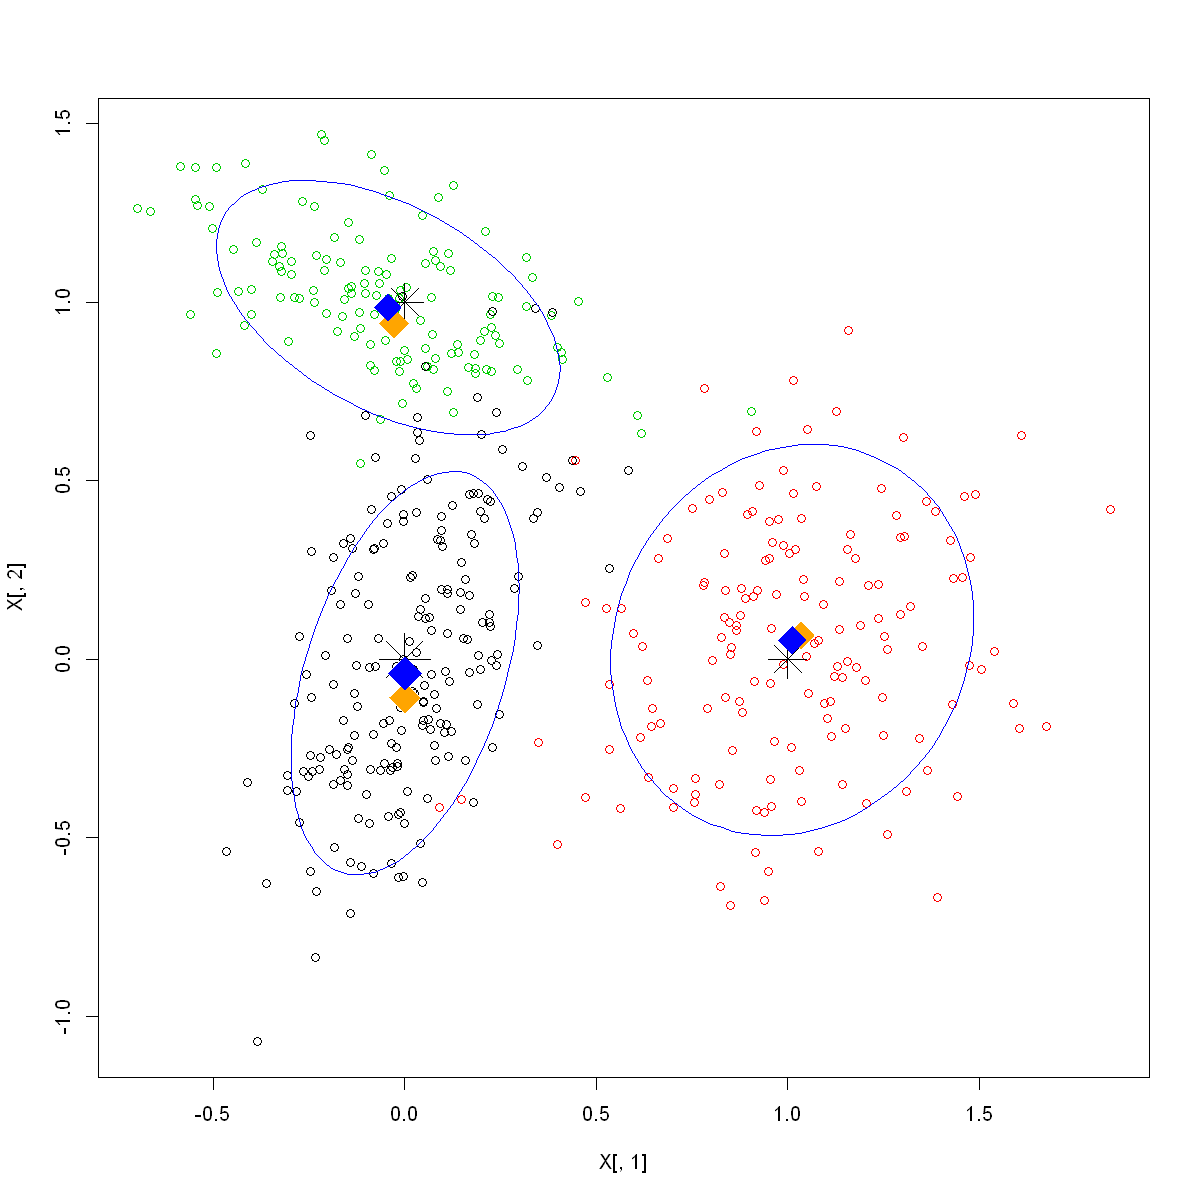

In [123]:
Mu = array(0,dim = c(3,2));Mu[1,]=c (0,0);Mu[2,] = c(1,0);Mu[3,] = c(0,1);
p = c(4/10,3/10,3/10)
p_vb <- outputvb$Alphamat[,T] / sum(outputvb$Alphamat[,T])
d= 2 
## complete the code
Mu_vb <- outputvb$Marray[,,T]## complete the code

Sigma_vb <- array(dim=c(d,d,Kfit))
Nu = outputvb$Numat[,T]
Winv = outputvb$Winvarray[,,,T]
sigma_new = Winv

for(j in 1:Kfit){
 
    Sigma_vb[,,j] <-Winv[,,j] / Nu[j]## complete the code
   
}


## show the data, true centers and initial positions from K-means
options(repr.plot.width=10, repr.plot.height=10)
plot(X[,1], X[,2], col=colors)
points(Mu[,1],Mu[,2], col="black",pch=8,cex=10*p) 
set.seed(seed)
Init <-  initPar(X,Kfit)
points(Init$Mu[,1],Init$Mu[,2], col="orange",pch=18,cex = 10*Init$p)
## Add a  summary of the VB solution

nonneg <- which(p_vb>0.001)
for(j in nonneg){
    points(Mu_vb[j,1], Mu_vb[j,2], col="blue",
           pch=18,cex= 10 * p_vb[j])
    ellips <- draw_sd(mu = Mu_vb[j,], 
                      sigma = Sigma_vb[,,j])
    lines(ellips[1,], ellips[2,], col='blue')
}    



### Comments
We can see from the graph above that the for kfit = 3 the VB algorithm return 3 nonzero components that fit well the data

In [124]:
Mu_vb

-0.0435227957,0.98530309
1.0114491217,0.05419288
0.0007566662,-0.03859344


### Comments
We can see that the VB returns $\mu_i$ very close to the ground truth (0,1) , (1,0) and (0,0).

In [125]:
p_vb

[1] 0.3039010 0.3167633 0.3793357

### Comments
Same for the $\rho_i$ ,they are very close to the ground truth ($\frac{3}{10}$,$\frac{3}{10}$,$\frac{4}{10}$).

In [126]:
Sigma_vb[,,1]
Sigma_vb[,,2]
Sigma_vb[,,3]

0.07478751,-0.02859283
-0.02859283,0.04726781


0.0834759,0.0109135
0.0109135,0.1117126


0.03286028,0.02635565
0.02635565,0.11863450


### Comments
Also the $\Sigma_i$ are very close to the ground truth .

## Question 4

* Study the influence of the hyperparameters $\alpha_0$ : Check that values less than one lead to $'sparse'$ solutions, in the sense that some mixture components are automatically granted negligeable weights, so that the true number of components is automatically recovered (contrary to EM).


* the influence of the hyperparameters $\alpha_0$


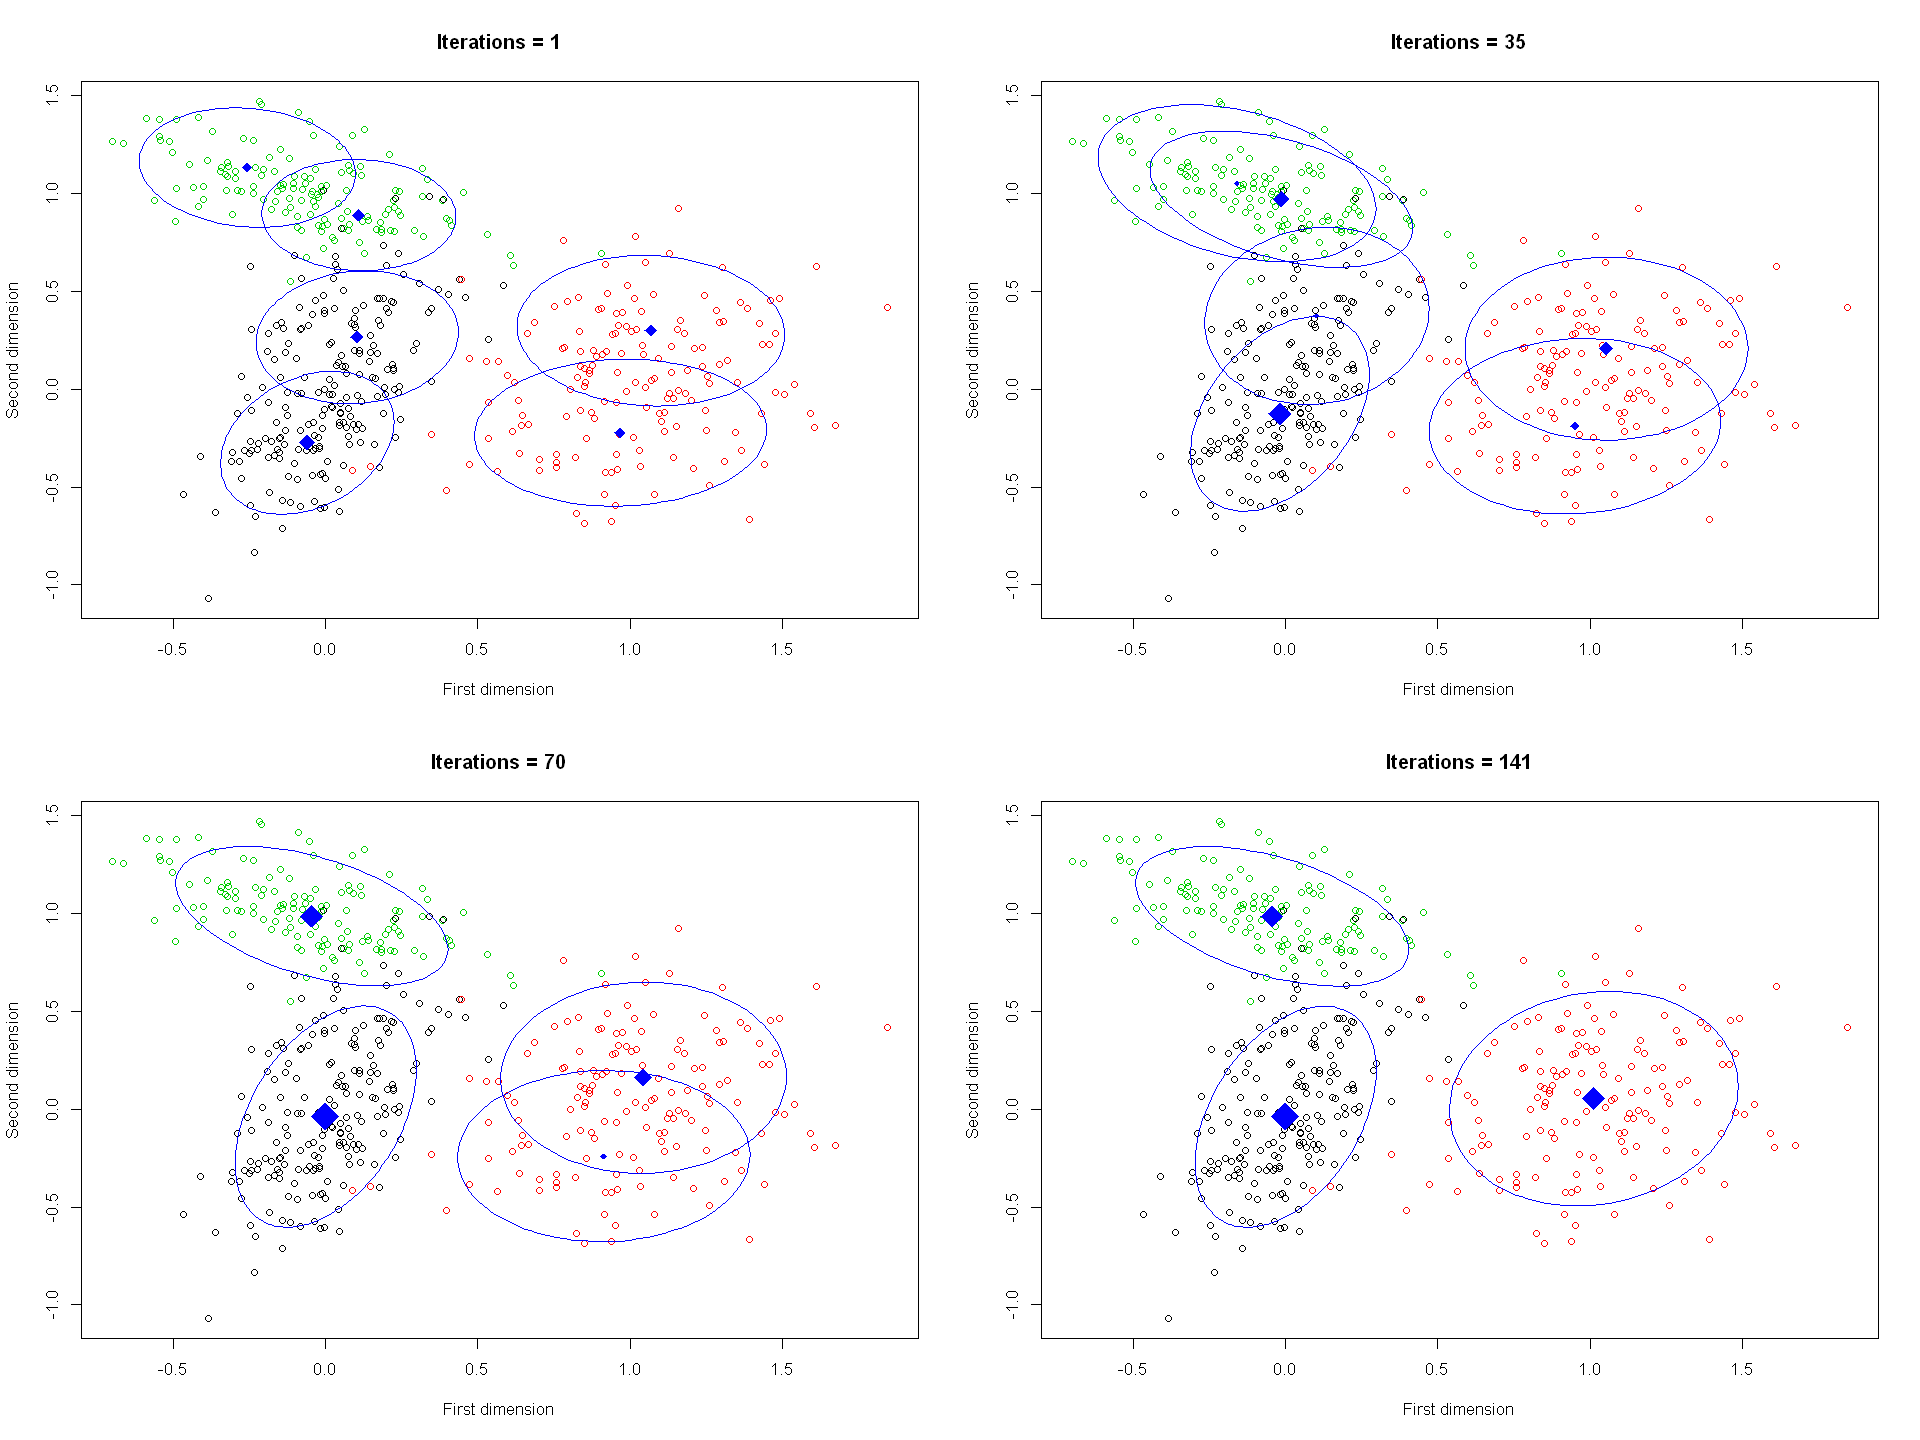

In [127]:
alpha0 <-0.01;m0 <- array(0,dim=c(1,2));beta0 <- 0.1;W0 <- 1*diag(2);nu0 <- 10;
Kfit =6;
seed <- 10
set.seed(seed)
outputvb <- vbalgo(x=X,k=Kfit, alpha0 = alpha0, W0inv = solve(W0),
                 nu0 = nu0, m0 = m0, beta0=beta0, tol=1e-6)
T_converge <- ncol(outputvb$Alphamat)
par(mfrow=c(2,2))
T_list = c(1,round(T_converge/4),round(T_converge/2),T_converge)
for (T in T_list){
  Mu_vb <- outputvb$Marray[,,T]## complete the code
  Sigma_vb <- outputvb$Winvarray[,,,T]
  Nu = outputvb$Numat[,T]
  for(j in 1:Kfit){ 
      Sigma_vb[,,j] <- Sigma_vb[,,j]/ Nu[j]## complete the code   
  }
  ## show the data, true centers and initial positions from K-means
options(repr.plot.width=16, repr.plot.height=12)
  plot(X[,1], X[,2],main=paste("Iterations =",toString(T)),xlab="First dimension",ylab="Second dimension" ,col=colors)
  set.seed(seed)
  ## Add a  summary of the VB solution
  p_vb <- outputvb$Alphamat[,T] / sum(outputvb$Alphamat[,T])
  nonneg <- which(p_vb>0.001)
  for(j in nonneg){
      points(Mu_vb[j,1], Mu_vb[j,2], col="blue",
            pch=18,cex= 10 * p_vb[j])
      ellips <- draw_sd(mu = Mu_vb[j,], 
                        sigma = Sigma_vb[,,j])
      lines(ellips[1,], ellips[2,], col='blue')
      }    
}


### Comments
We have $K_{fit}$ = 6  but the algorithm ends up with only 3 consistent components for the following reason
<br>
We can see that for small alpha ,for the components that $N_k$ ,the component will not play a role after a number of iterations (like the graph above) since <br> 
$E[\pi_k]=\frac{\alpha_k + N_k}{K\alpha_0 + N }$ ,for $N_k\rightarrow 0 $ and $\alpha_k \rightarrow \alpha_0 $ then $E[\pi_k] \rightarrow 0 $ that's why the number of "clusters" decreases over iterations and we have "sparse" components 

In [128]:
p_vb <- outputvb$Alphamat[,T] / sum(outputvb$Alphamat[,T]);p_vb

[1] 0.3038591849 0.0000199976 0.0000199976 0.3793458375 0.0000199976
[6] 0.3167349848

### Comments
We can see from printing $E[\pi]$ there are 3 $E[\pi_k]$ very small (order of $10^-5$) and 3 with consisting values (the one in the plot) 

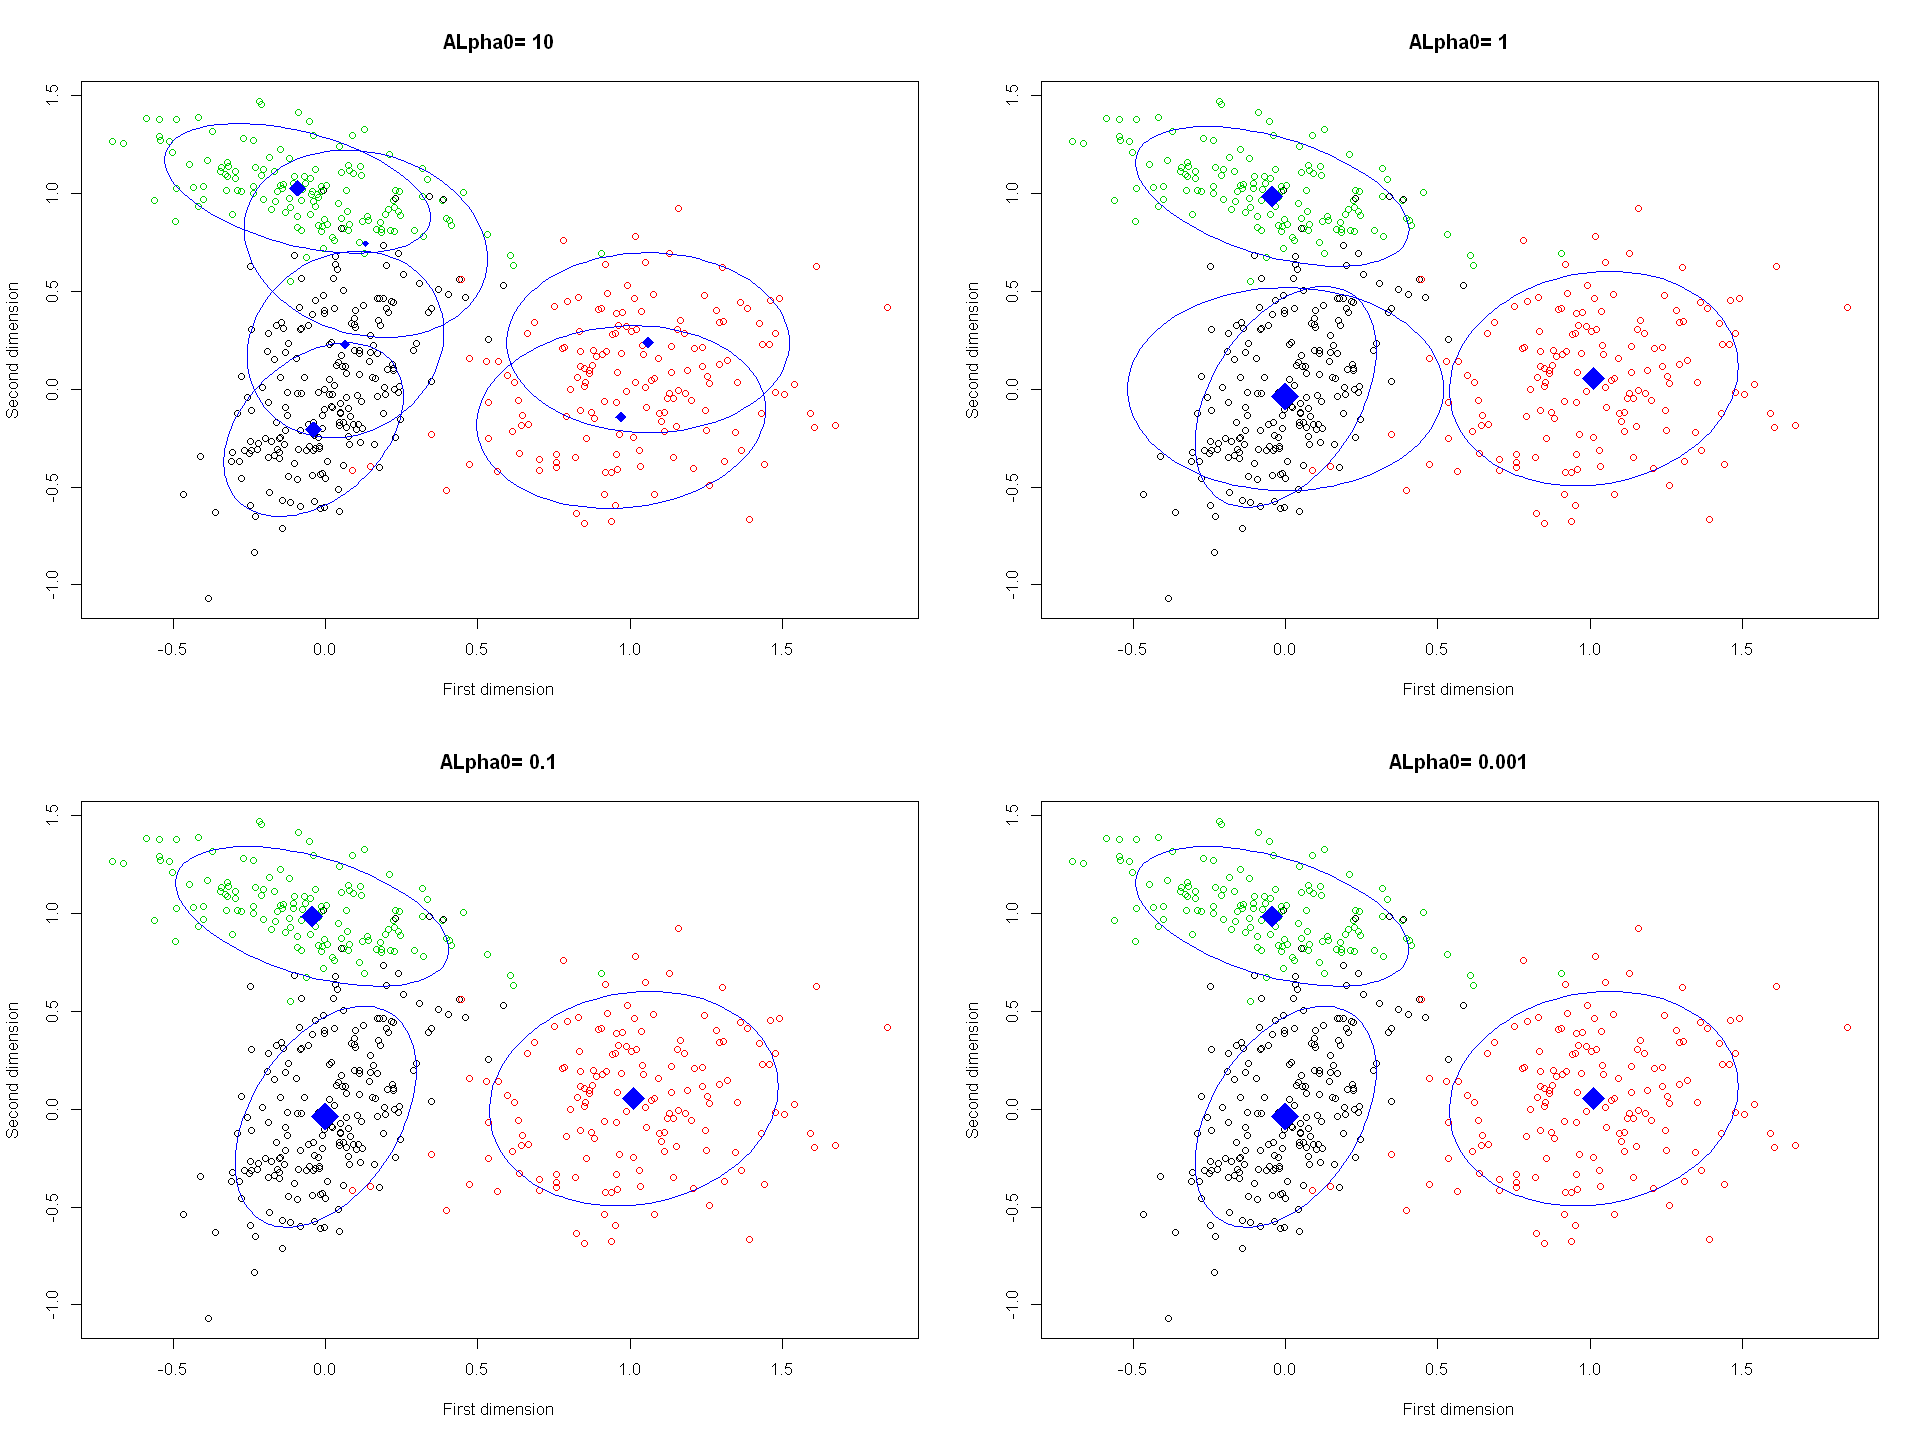

In [129]:
par(mfrow=c(2,2))
alpha0_list = c(10,1,0.1,0.001)
for (alpha0 in alpha0_list){
 
  m0 <- array(0,dim=c(1,2))
  beta0 <- 0.1
  W0 <- 1*diag(2)
  nu0 <- 10
  Kfit =6
  #' Run VB 

  seed <- 10
  set.seed(seed)
  outputvb <- vbalgo(x=X,k=Kfit, alpha0 = alpha0, W0inv = solve(W0),
                  nu0 = nu0, m0 = m0, beta0=beta0, tol=1e-6)
  T_converge <- ncol(outputvb$Alphamat)

  T = T_converge

  Mu_vb <- outputvb$Marray[,,T]## complete the code
  Sigma_vb <- outputvb$Winvarray[,,,T]
  Nu = outputvb$Numat[,T]
  for(j in 1:Kfit){ 
      Sigma_vb[,,j] <- Sigma_vb[,,j]/ Nu[j]## complete the code   
  }
  ## show the data, true centers and initial positions from K-means
options(repr.plot.width=16, repr.plot.height=12)
  plot(X[,1], X[,2],main= paste("ALpha0=",alpha0) ,xlab="First dimension",ylab="Second dimension" ,col=colors)
  set.seed(seed)
  ## Add a  summary of the VB solution
  p_vb <- outputvb$Alphamat[,T] / sum(outputvb$Alphamat[,T])
  nonneg <- which(p_vb>0.001)
  for(j in nonneg){
      points(Mu_vb[j,1], Mu_vb[j,2], col="blue",
            pch=18,cex= 10 * p_vb[j])
      ellips <- draw_sd(mu = Mu_vb[j,], 
                        sigma = Sigma_vb[,,j])
      lines(ellips[1,], ellips[2,], col='blue')
      } 
}


### Comments
For large alphas0($\alpha_0$ = 10) we have all 6  components have nonzero mixing coefficients. For $\alpha_0 = 1$ we obtain 4 components with nonzero mixing coefficients,as for $\alpha_0$ < 1 we obtain only 3 obtain 4 components with nonzero mixing coefficients

## Question 5

Study the influence of the other hyperparameters 


* The effect of the hyperparameter $m_0$

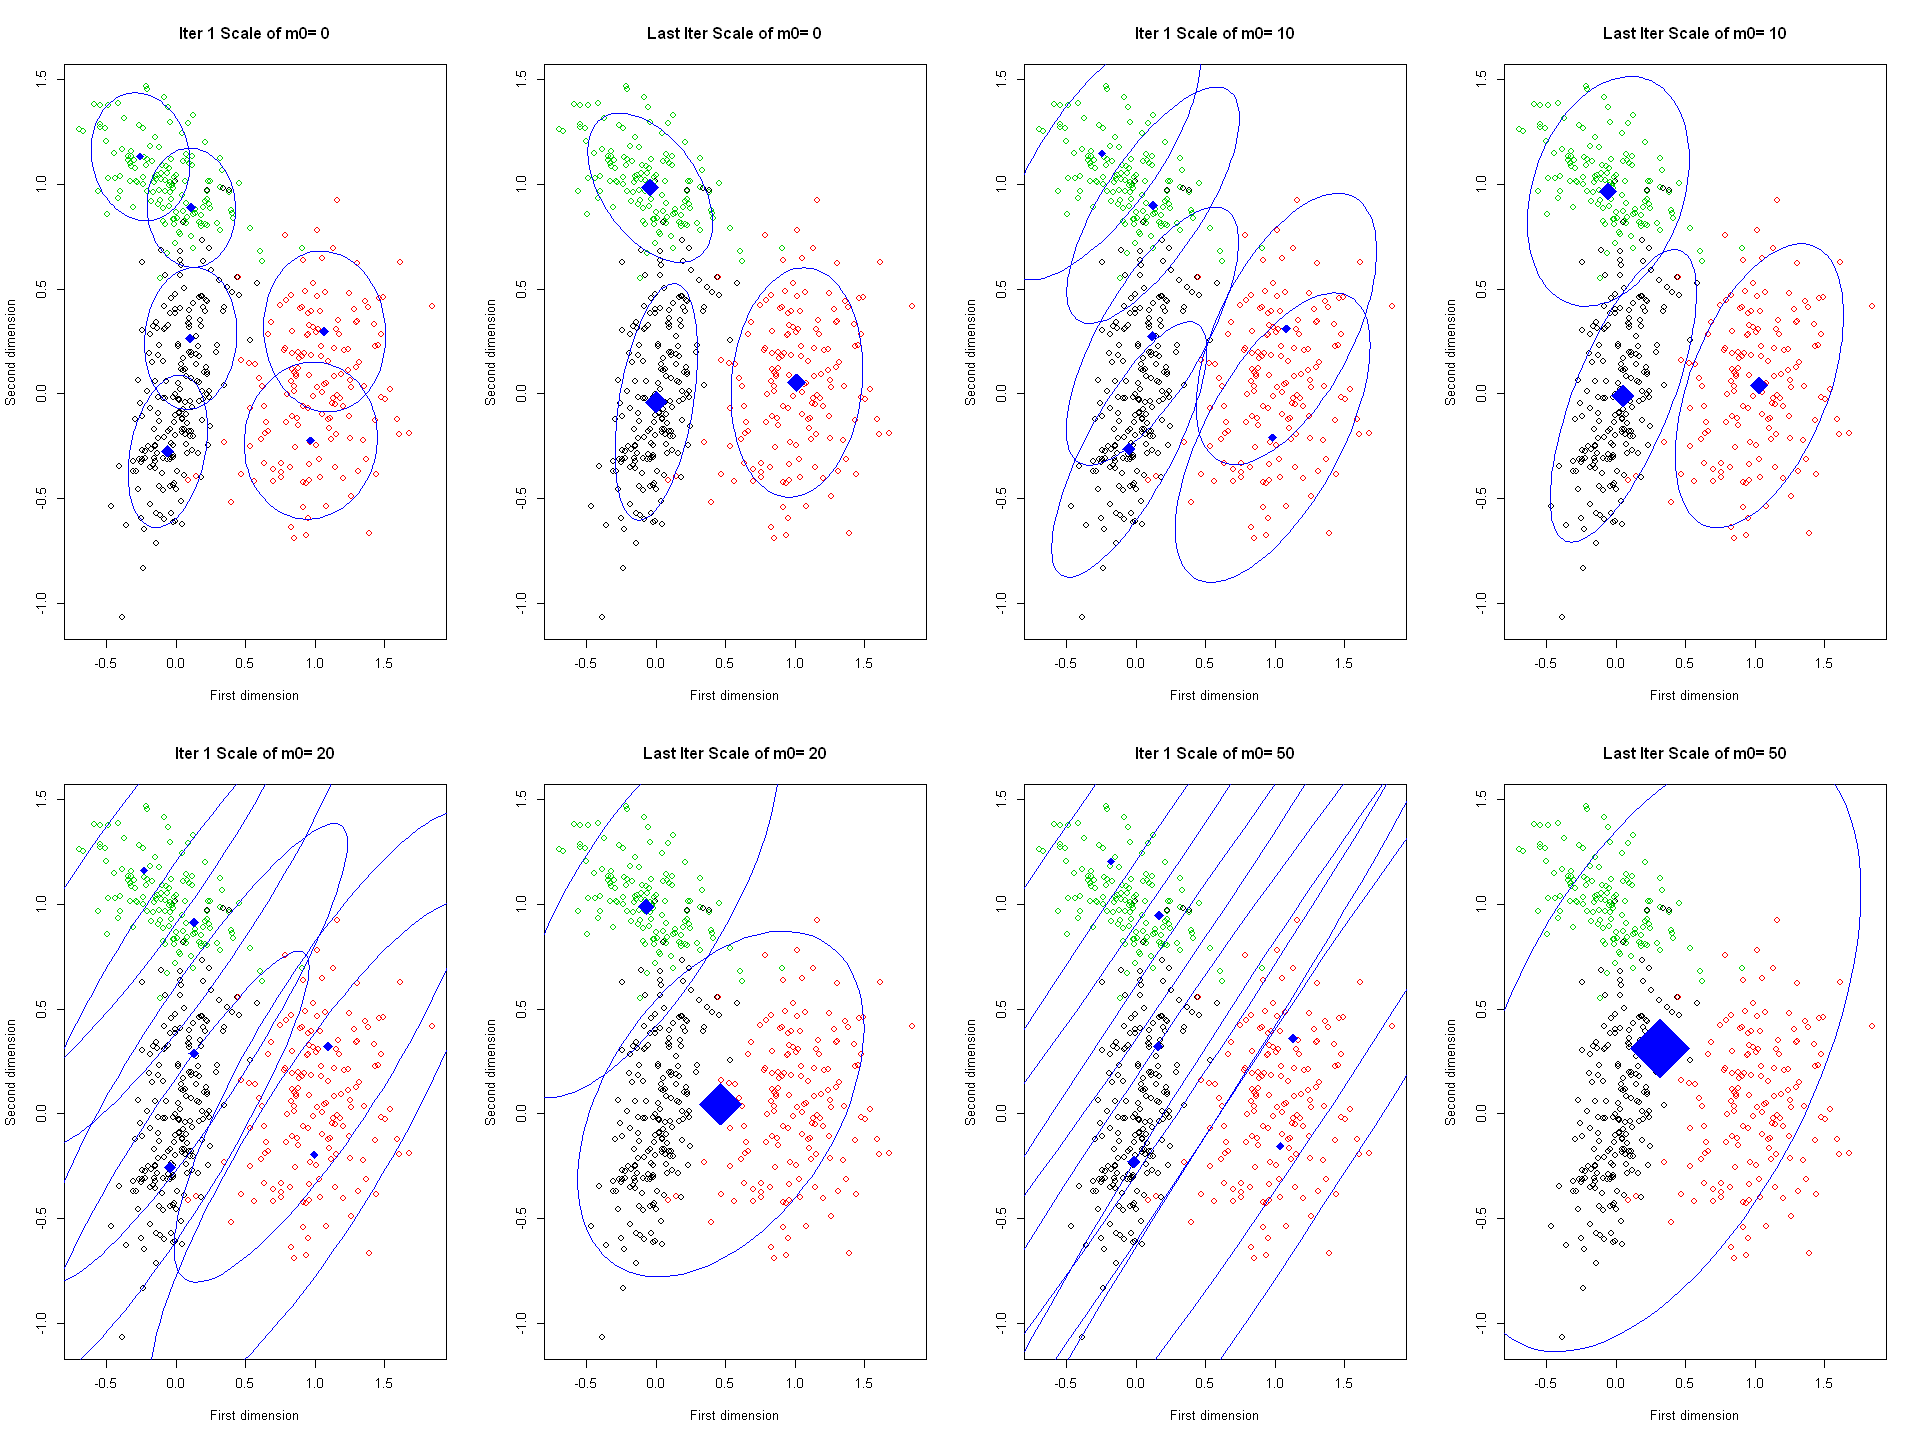

In [130]:
par(mfrow=c(2,4))
 coeff = c(0,10,20,50)
 for (i in coeff){
   #change the hyperparameter m0
   m0 <-  i * array(1,dim=c(1,2))
  beta0 <- 0.1
  W0 <- 1*diag(2)
  nu0 <- 10
  Kfit =6
  #' Run VB 

  seed <- 10
  set.seed(seed)
  outputvb <- vbalgo(x=X,k=Kfit, alpha0 = alpha0, W0inv = solve(W0),
                  nu0 = nu0, m0 = m0, beta0=beta0, tol=1e-6)
  T_converge <- ncol(outputvb$Alphamat)

  T = 1

  Mu_vb <- outputvb$Marray[,,T]## complete the code
  Sigma_vb <- outputvb$Winvarray[,,,T]
  Nu = outputvb$Numat[,T]
  for(j in 1:Kfit){ 
      Sigma_vb[,,j] <- Sigma_vb[,,j]/ Nu[j]## complete the code   
  }
  ## show the data, true centers and initial positions from K-means
options(repr.plot.width=10, repr.plot.height=10)
  plot(X[,1], X[,2],main=paste("Iter 1 Scale of m0=",toString(i)) ,xlab="First dimension",ylab="Second dimension" ,col=colors)
  set.seed(seed)
  ## Add a  summary of the VB solution
  p_vb <- outputvb$Alphamat[,T] / sum(outputvb$Alphamat[,T])
  nonneg <- which(p_vb>0.001)
  for(j in nonneg){
      points(Mu_vb[j,1], Mu_vb[j,2], col="blue",
            pch=18,cex= 10 * p_vb[j])
      ellips <- draw_sd(mu = Mu_vb[j,], 
                        sigma = Sigma_vb[,,j])
      lines(ellips[1,], ellips[2,], col='blue')
      } 
T = T_converge

  Mu_vb <- outputvb$Marray[,,T]## complete the code
  Sigma_vb <- outputvb$Winvarray[,,,T]
  Nu = outputvb$Numat[,T]
  for(j in 1:Kfit){ 
      Sigma_vb[,,j] <- Sigma_vb[,,j]/ Nu[j]## complete the code   
  }
  ## show the data, true centers and initial positions from K-means
     options(repr.plot.width=16, repr.plot.height=12)
  plot(X[,1], X[,2],main=paste("Last Iter Scale of m0=",toString(i)) ,xlab="First dimension",ylab="Second dimension" ,col=colors)
  set.seed(seed)
  ## Add a  summary of the VB solution
  p_vb <- outputvb$Alphamat[,T] / sum(outputvb$Alphamat[,T])
  nonneg <- which(p_vb>0.001)
  for(j in nonneg){
      points(Mu_vb[j,1], Mu_vb[j,2], col="blue",
            pch=18,cex= 10 * p_vb[j])
      ellips <- draw_sd(mu = Mu_vb[j,], 
                        sigma = Sigma_vb[,,j])
      lines(ellips[1,], ellips[2,], col='blue')
      } 
   
 }

### Comments
* To see the effect of changing the $m_0$ I choose to change the coefficient i $\in$ (0,10,20,50) and $m_0$ = i (1,1) .
* To see what happens we plot the components in the first iteration and the last iteration ,we can conclude that if  $m_0$ is big in terms of norm the $\Sigma_{i,initial}$ has bigger value (bigger ellipse) since in the $\Sigma_{i}$ are proportional to ($(m_0-\bar{x_k})(m_0-\bar{x_k})^T$.
* For the convergence ,$m_0$ has an effect on the number of nonzero components since if $m_0$ is big (in terms of norm) the number of nonzero components will decrease and we will have bigger components instead of multiple small components .

* The effect of the hyperparameter $\beta_0$

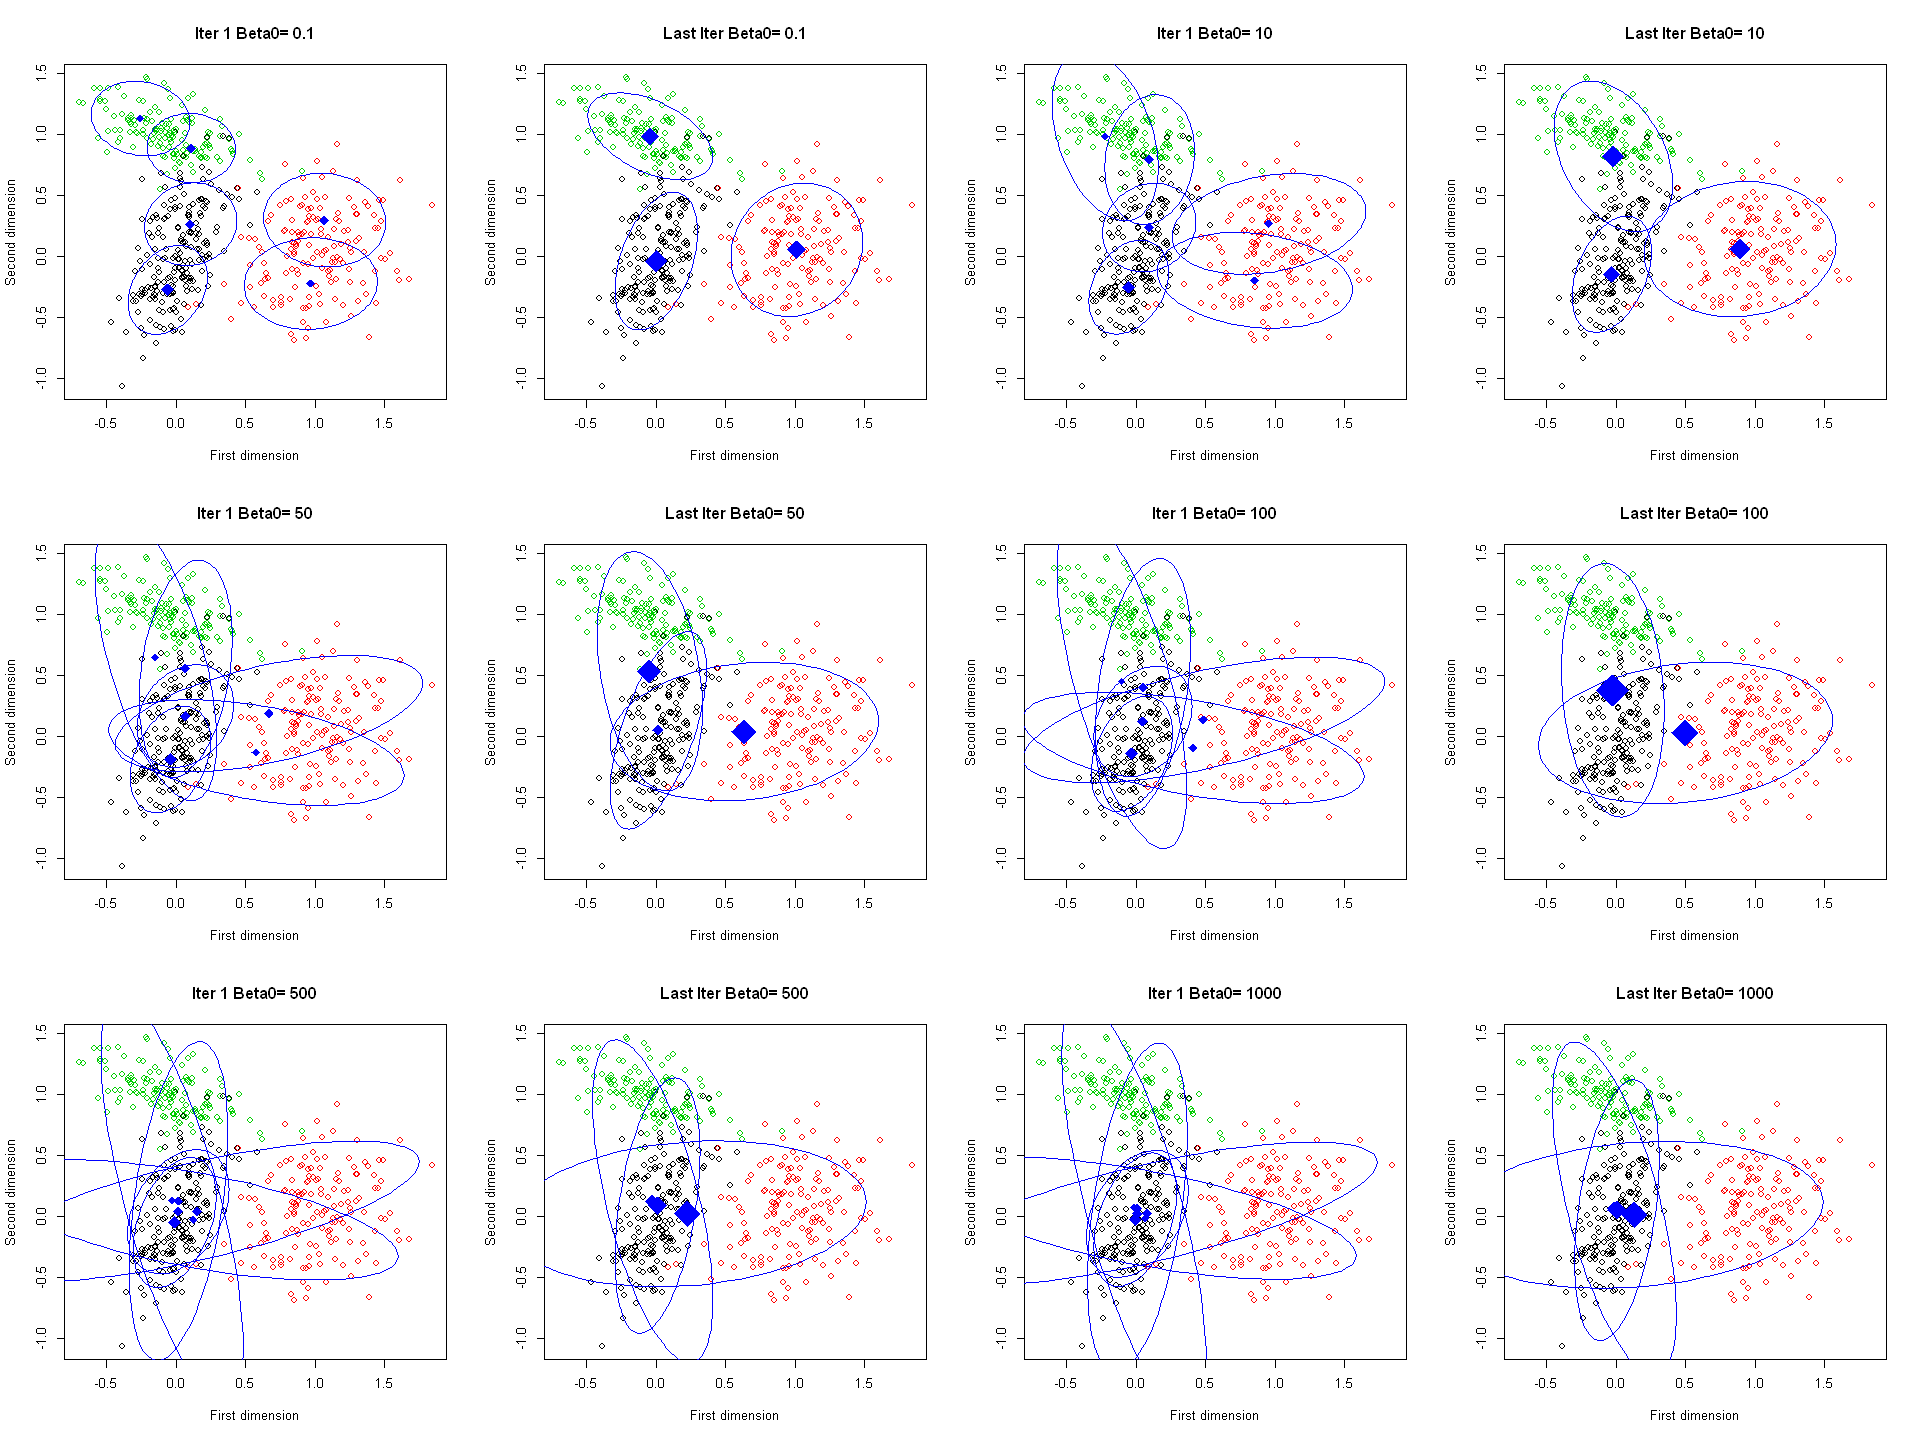

In [131]:
par(mfrow=c(3,4))
 betas = c(0.1,10,50,100,500,1000)
 for (beta0 in betas){
   #change the hyperparameter m0
   
   m0 <-  array(0,dim=c(1,2))
 
  W0 <- 1*diag(2)
  nu0 <- 10
  Kfit =6
  #' Run VB 

  seed <- 10
  set.seed(seed)
  outputvb <- vbalgo(x=X,k=Kfit, alpha0 = alpha0, W0inv = solve(W0),
                  nu0 = nu0, m0 = m0, beta0=beta0, tol=1e-6)
  T_converge <- ncol(outputvb$Alphamat)

  T = 1

  Mu_vb <- outputvb$Marray[,,T]## complete the code
  Sigma_vb <- outputvb$Winvarray[,,,T]
  Nu = outputvb$Numat[,T]
  for(j in 1:Kfit){ 
      Sigma_vb[,,j] <- Sigma_vb[,,j]/ Nu[j]## complete the code   
  }
  ## show the data, true centers and initial positions from K-means
  plot(X[,1], X[,2],main=paste("Iter 1 Beta0=",toString(beta0)) ,xlab="First dimension",ylab="Second dimension" ,col=colors)
  set.seed(seed)
  ## Add a  summary of the VB solution
  p_vb <- outputvb$Alphamat[,T] / sum(outputvb$Alphamat[,T])
  nonneg <- which(p_vb>0.001)
  for(j in nonneg){
      points(Mu_vb[j,1], Mu_vb[j,2], col="blue",
            pch=18,cex= 10 * p_vb[j])
      ellips <- draw_sd(mu = Mu_vb[j,], 
                        sigma = Sigma_vb[,,j])
      lines(ellips[1,], ellips[2,], col='blue')
      } 
T = T_converge

  Mu_vb <- outputvb$Marray[,,T]## complete the code
  Sigma_vb <- outputvb$Winvarray[,,,T]
  Nu = outputvb$Numat[,T]
  for(j in 1:Kfit){ 
      Sigma_vb[,,j] <- Sigma_vb[,,j]/ Nu[j]## complete the code   
  }
  ## show the data, true centers and initial positions from K-means
     options(repr.plot.width=16, repr.plot.height=12)
  plot(X[,1], X[,2],main=paste("Last Iter Beta0=",toString(beta0)) ,xlab="First dimension",ylab="Second dimension" ,col=colors)
  set.seed(seed)
  ## Add a  summary of the VB solution
  p_vb <- outputvb$Alphamat[,T] / sum(outputvb$Alphamat[,T])
  nonneg <- which(p_vb>0.001)
  for(j in nonneg){
      points(Mu_vb[j,1], Mu_vb[j,2], col="blue",
            pch=18,cex= 10 * p_vb[j])
      ellips <- draw_sd(mu = Mu_vb[j,], 
                        sigma = Sigma_vb[,,j])
      lines(ellips[1,], ellips[2,], col='blue')
      } 
   
 }

In [132]:
p_vb

[1] 3.341256e-01 1.999976e-06 1.999976e-06 1.999976e-06 2.209456e-01
[6] 4.449228e-01

### Comments
We have <br> 
$m_k = \frac{1}{\beta_0+N_k}(\beta_0m_0+N_k\bar{x_k})$ <br>
for $ \beta_0 \rightarrow \infty $ Then $m_k = \frac{1}{\beta_0+N_k}(\beta_0m_0+N_k\bar{x_k})\rightarrow \frac{\beta_0}{\beta_0}m_0 +\frac{N_k\bar{x_k}}{\beta_0} \rightarrow m_0$<br> 
Then for big values of $\beta_0$ $\forall k$ all the compenents have the same $\mu_i = m_0$That's why we can see from the graph above that we end less nonzero component with  center of class close to the coordinates $m_0$ (here we chose $m_0$ = (0,0)) 

* The effect of the hyperparameter $\nu_0$

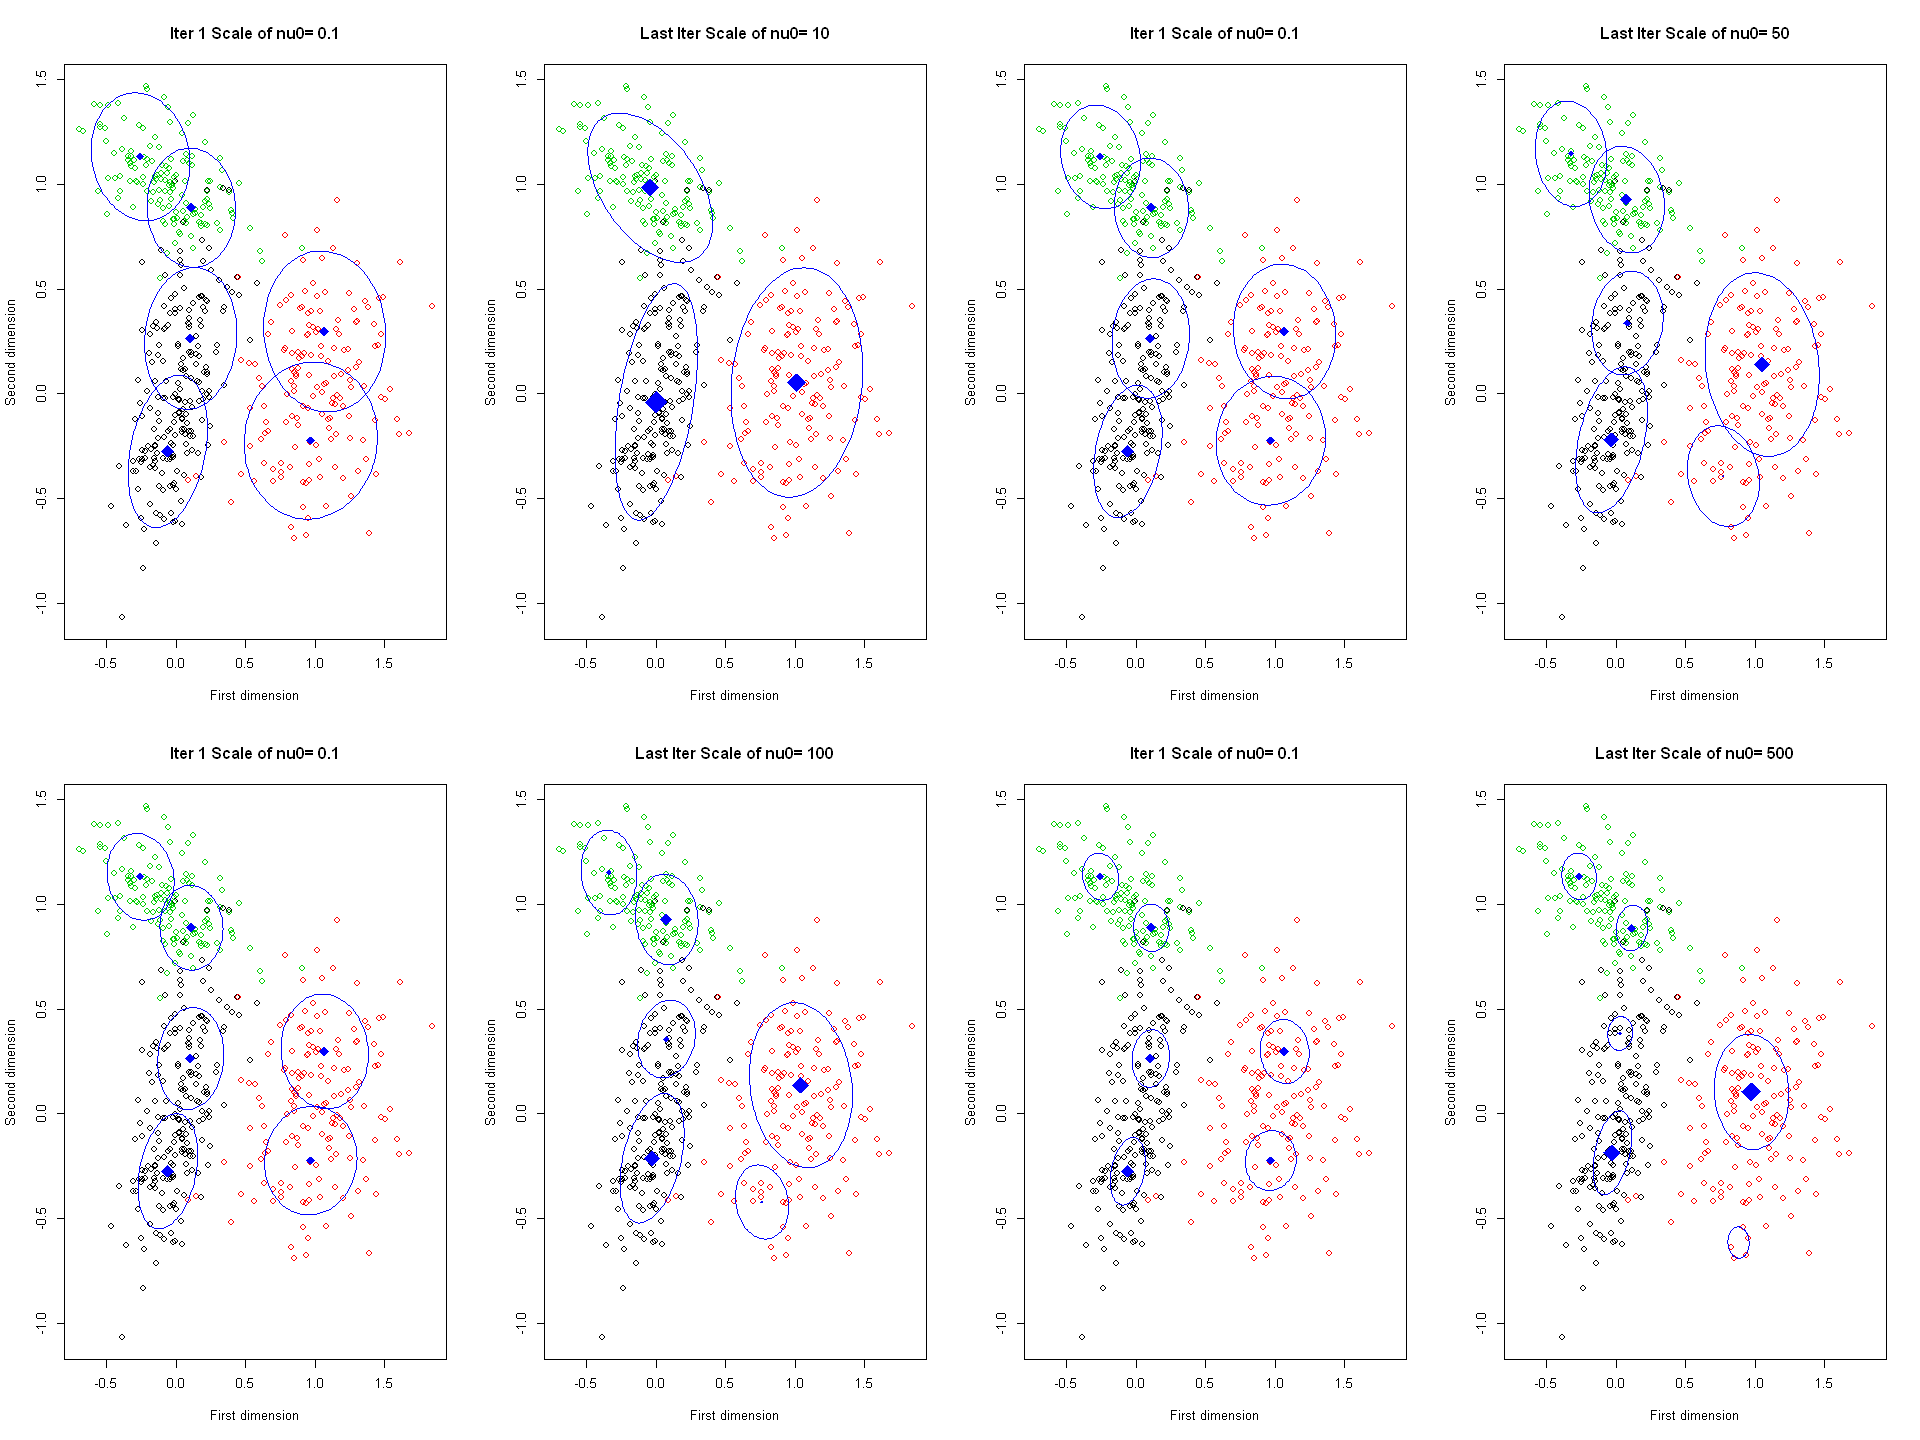

In [133]:
par(mfrow=c(2,4))
 nus = c(10,50,100,500)
 for (nu0 in nus){
   #change the hyperparameter m0
  alpha0 = 0.1
  m0 <-  array(0,dim=c(1,2))
  beta0 <- 0.1
  W0 <- 1*diag(2)
 
  Kfit =6
  #' Run VB 

  seed <- 10
  set.seed(seed)
  outputvb <- vbalgo(x=X,k=Kfit, alpha0 = alpha0, W0inv = solve(W0),
                  nu0 = nu0, m0 = m0, beta0=beta0, tol=1e-6)
  T_converge <- ncol(outputvb$Alphamat)

  T = 1

  Mu_vb <- outputvb$Marray[,,T]## complete the code
  Sigma_vb <- outputvb$Winvarray[,,,T]
  Nu = outputvb$Numat[,T]
  for(j in 1:Kfit){ 
      Sigma_vb[,,j] <- Sigma_vb[,,j]/ Nu[j]## complete the code   
  }
  ## show the data, true centers and initial positions from K-means
     options(repr.plot.width=16, repr.plot.height=12)
  plot(X[,1], X[,2],main=paste("Iter 1 Scale of nu0=",toString(beta0)) ,xlab="First dimension",ylab="Second dimension" ,col=colors)
  set.seed(seed)
  ## Add a  summary of the VB solution
  p_vb <- outputvb$Alphamat[,T] / sum(outputvb$Alphamat[,T])
  nonneg <- which(p_vb>0.001)
  for(j in nonneg){
      points(Mu_vb[j,1], Mu_vb[j,2], col="blue",
            pch=18,cex= 10 * p_vb[j])
      ellips <- draw_sd(mu = Mu_vb[j,], 
                        sigma = Sigma_vb[,,j])
      lines(ellips[1,], ellips[2,], col='blue')
      } 
T = T_converge

  Mu_vb <- outputvb$Marray[,,T]## complete the code
  Sigma_vb <- outputvb$Winvarray[,,,T]
  Nu = outputvb$Numat[,T]
  for(j in 1:Kfit){ 
      Sigma_vb[,,j] <- Sigma_vb[,,j]/ Nu[j]## complete the code   
  }
  ## show the data, true centers and initial positions from K-means
  plot(X[,1], X[,2],main=paste("Last Iter Scale of nu0=",toString(nu0)) ,xlab="First dimension",ylab="Second dimension" ,col=colors)
  set.seed(seed)
  ## Add a  summary of the VB solution
  p_vb <- outputvb$Alphamat[,T] / sum(outputvb$Alphamat[,T])
  nonneg <- which(p_vb>0.001)
  for(j in nonneg){
      points(Mu_vb[j,1], Mu_vb[j,2], col="blue",
            pch=18,cex= 10 * p_vb[j])
      ellips <- draw_sd(mu = Mu_vb[j,], 
                        sigma = Sigma_vb[,,j])
      lines(ellips[1,], ellips[2,], col='blue')
      } 
   
 }

### Comments
let T be the the number of the last iteration of the VB algorithm <br>
We have $\Sigma_{VB} =(\nu_T W)^{-1} $<br>
We have also $\nu_T = \nu_0 +N_T $<br> 
for $\nu_0 \rightarrow \infty $ then $\nu \rightarrow \infty$ then $||\Sigma_{VB}|| \rightarrow 0$<br> 
We can see the effect of $||\Sigma_{VB}|| \rightarrow 0$<br>  in the above graph by the fact that the components (ellipses) we have very small countours due to small  $||\Sigma_{VB}|| $

* The effect of the hyperparameter $W_0$

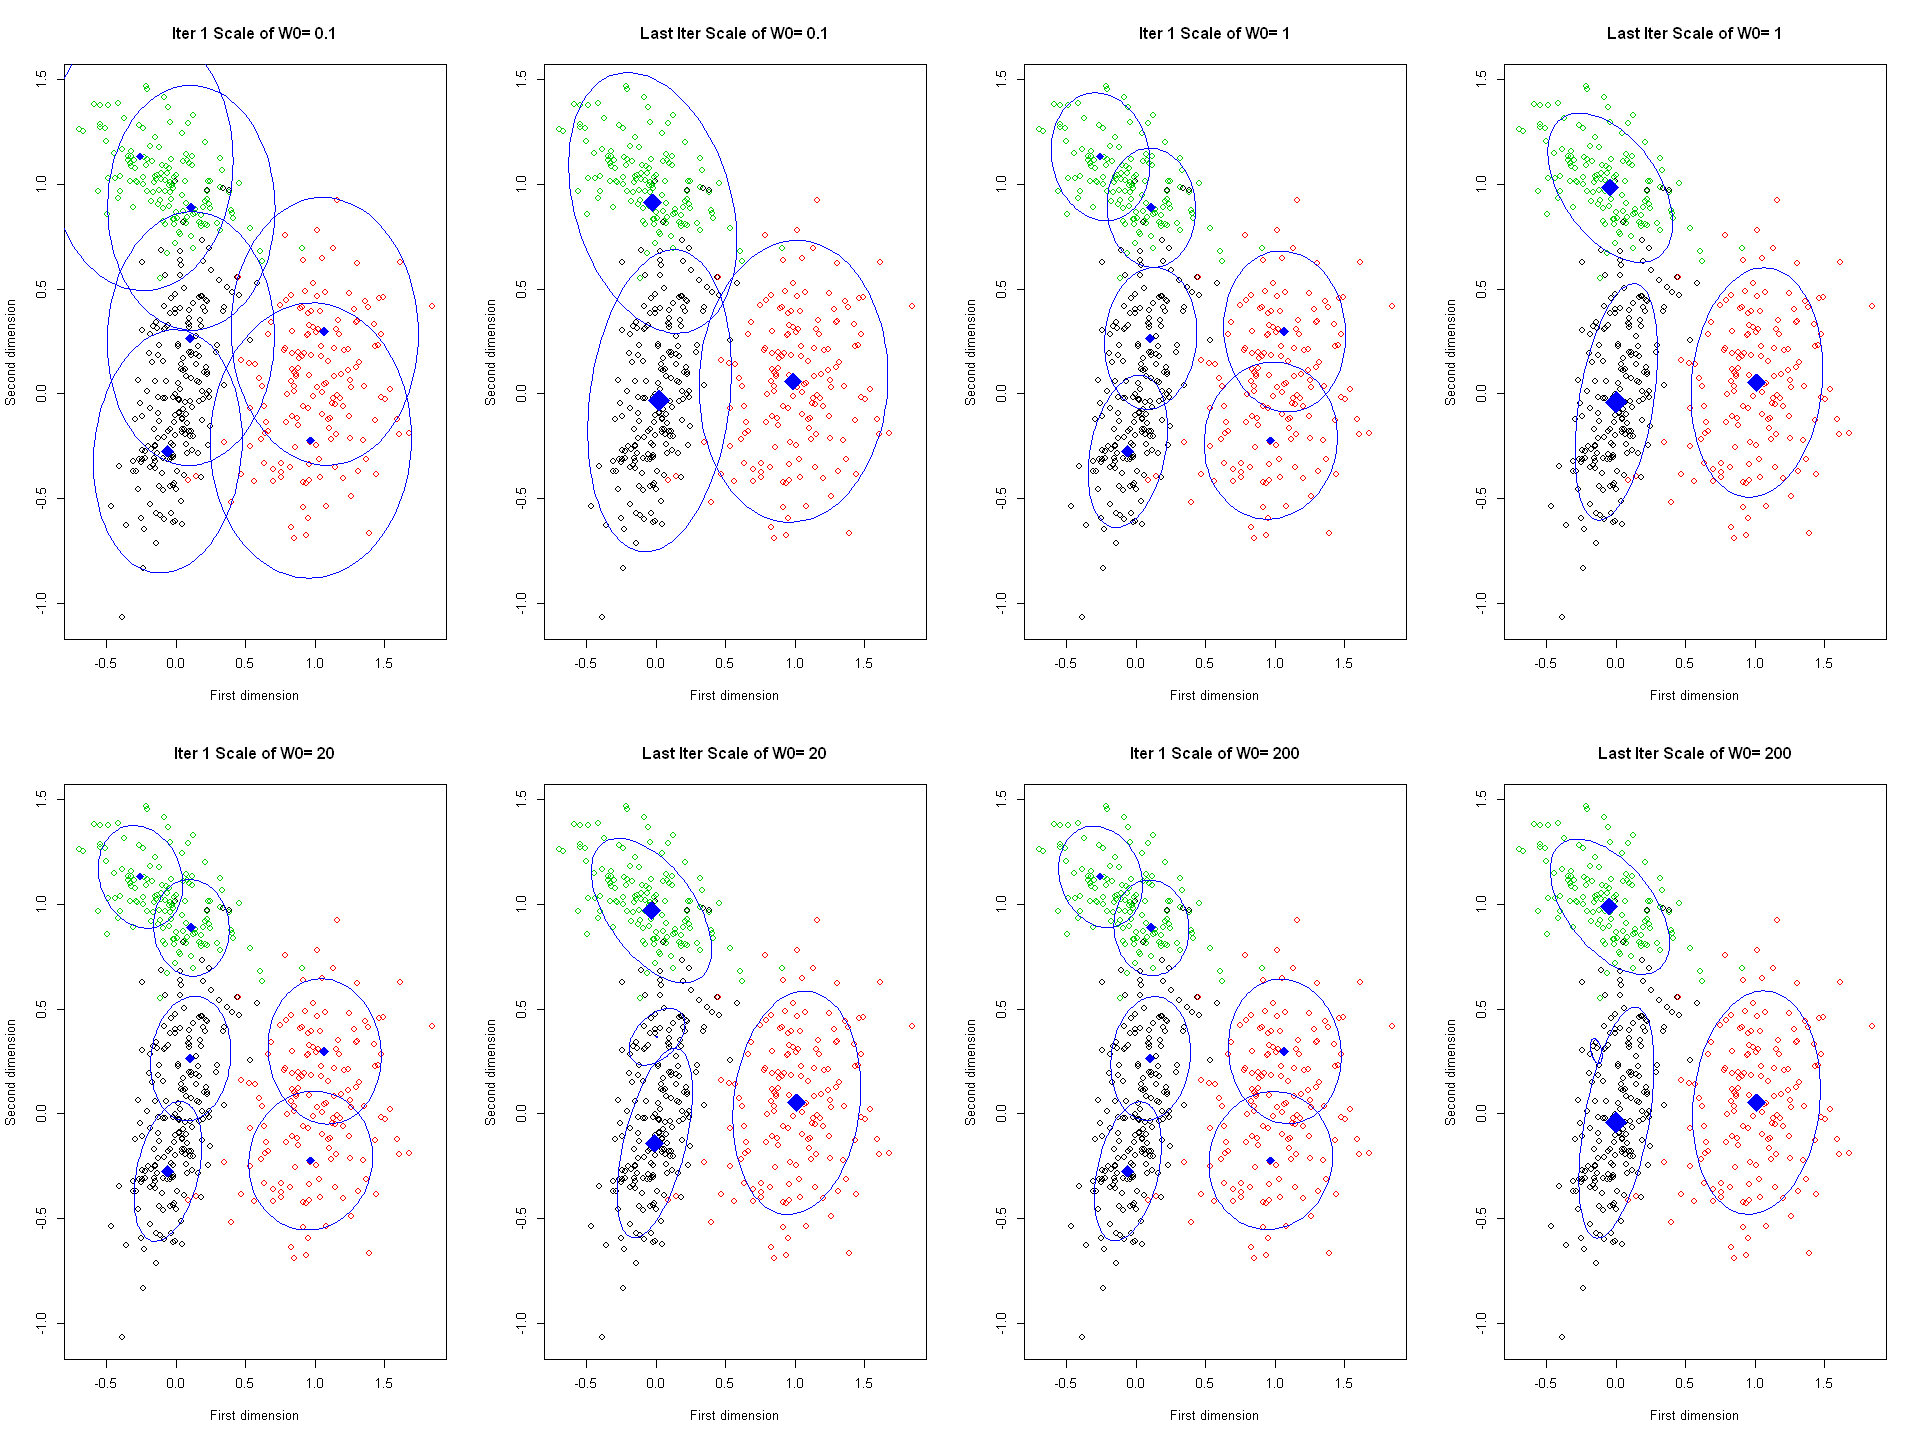

In [134]:
par(mfrow=c(2,4))
 coeff = c(0.1,1,20,200)
 for (i in coeff){
   #change the hyperparameter m0
   alpha0 = 0.1
     m0 <-  array(0,dim=c(1,2))
  beta0 <- 0.1
  W0 <- i*diag(2)
  nu0 <- 10
  Kfit =6
  #' Run VB 

  seed <- 10
  set.seed(seed)
  outputvb <- vbalgo(x=X,k=Kfit, alpha0 = alpha0, W0inv = solve(W0),
                  nu0 = nu0, m0 = m0, beta0=beta0, tol=1e-6)
  T_converge <- ncol(outputvb$Alphamat)

  T = 1

  Mu_vb <- outputvb$Marray[,,T]## complete the code
  Sigma_vb <- outputvb$Winvarray[,,,T]
  Nu = outputvb$Numat[,T]
  for(j in 1:Kfit){ 
      Sigma_vb[,,j] <- Sigma_vb[,,j]/ Nu[j]## complete the code   
  }
  ## show the data, true centers and initial positions from K-means
options(repr.plot.width=10, repr.plot.height=10)
  plot(X[,1], X[,2],main=paste("Iter 1 Scale of W0=",toString(i)) ,xlab="First dimension",ylab="Second dimension" ,col=colors)
  set.seed(seed)
  ## Add a  summary of the VB solution
  p_vb <- outputvb$Alphamat[,T] / sum(outputvb$Alphamat[,T])
  nonneg <- which(p_vb>0.001)
  for(j in nonneg){
      points(Mu_vb[j,1], Mu_vb[j,2], col="blue",
            pch=18,cex= 10 * p_vb[j])
      ellips <- draw_sd(mu = Mu_vb[j,], 
                        sigma = Sigma_vb[,,j])
      lines(ellips[1,], ellips[2,], col='blue')
      } 
T = T_converge

  Mu_vb <- outputvb$Marray[,,T]## complete the code
  Sigma_vb <- outputvb$Winvarray[,,,T]
  Nu = outputvb$Numat[,T]
  for(j in 1:Kfit){ 
      Sigma_vb[,,j] <- Sigma_vb[,,j]/ Nu[j]## complete the code   
  }
  ## show the data, true centers and initial positions from K-means
     options(repr.plot.width=16, repr.plot.height=12)
  plot(X[,1], X[,2],main=paste("Last Iter Scale of W0=",toString(i)) ,xlab="First dimension",ylab="Second dimension" ,col=colors)
  set.seed(seed)
  ## Add a  summary of the VB solution
  p_vb <- outputvb$Alphamat[,T] / sum(outputvb$Alphamat[,T])
  nonneg <- which(p_vb>0.001)
  for(j in nonneg){
      points(Mu_vb[j,1], Mu_vb[j,2], col="blue",
            pch=18,cex= 10 * p_vb[j])
      ellips <- draw_sd(mu = Mu_vb[j,], 
                        sigma = Sigma_vb[,,j])
      lines(ellips[1,], ellips[2,], col='blue')
      } 
   
 }

### Comments
    
If we increase the value of $W_{0}$ ,the clusters are getting smaller 
  
   we have 
   $\Sigma_{k} = \frac{W_{k}^{-1}}{\nu_{k}} = \frac{W_{k}^{-1}}{\nu_{0} + N_{k}} $
    <br> and <br> 
    $ W_{k}^{-1} = W_{0}^{-1} + N_{k}.S_{k} + \frac{\beta_{0}.N_{k}}{\beta_{0}+N_{k}}.(\bar{x_k} - m_{0})(\bar{x_k}-m_{0})^T $
  then we can say that if $W_0$ increases (in terms of norm) $\Sigma$ will decrease (in terms of norm) .Thus,we will have smaller clusters.
  


# 3- Metropolis-Hastings algorithm
   


## Question 1

Complete the code for the function rproposal in th file fonctions_GM.R to generate such proposal


*  Code in the file fonctions_GM.R


## Question 2

* Complete the code for the Metropolis-Hastings sampler MHsample


*
  Code in the file fonctions_GM.R


## Question 3
Test your code on the following example (fix nsample to a lower value for debugging). For comparison purposes, the hyperparameter values should be the same as those used in Variational Bayes


In [7]:
Kmc <- 3 ## try with different values
init <- initPar(x=X, k=Kmc)

hpar <- list( alpha0= alpha0, 
           m0 = rep(0, 2), beta0 = beta0, 
           W0 = W0, nu0 = nu0)

ppar <- list(var_Mu = 0.001,
            nu_Sigma = 500,
            alpha_p = 500) 


set.seed(1)
pct <- proc.time()
outputmh <- MHsample(x=X, k=Kmc, nsample= 10000,
                    init=init, hpar=hpar, ppar=ppar)
newpct <- proc.time()
elapsed <- newpct - pct
elapsed
outputmh$naccept ## should not be ridiculously low. 

   user  system elapsed 
  92.13    0.17   98.03 

[1] 422

## Question 4

* To obtain such a time series, complete the code of function cdfTrace from file fonctions_GM.R.
* Notice that parameters thin and burnin allow respectively to keep only one out of ‘thin’ samples and to discard the first burnin samples


*  Code in the file fonctions_GM.R

## Question 5

* The Heidelberger and Welch’s test is a convergence test based on the stationarity hypothesis (see
the help for function $heidel.diag$ from package coda). Use the function $heidel.diag$
from package coda in combination with cdfTrace to propose a reasonable number of iterations
    to achieve convergence.
* Use various values of x as argument of cdfTrace.
* N.B: the functions takes as argument a mcmc object. Any vector y may be coerced into an mcmc
    object via: $y <- mcmc(y)$ .


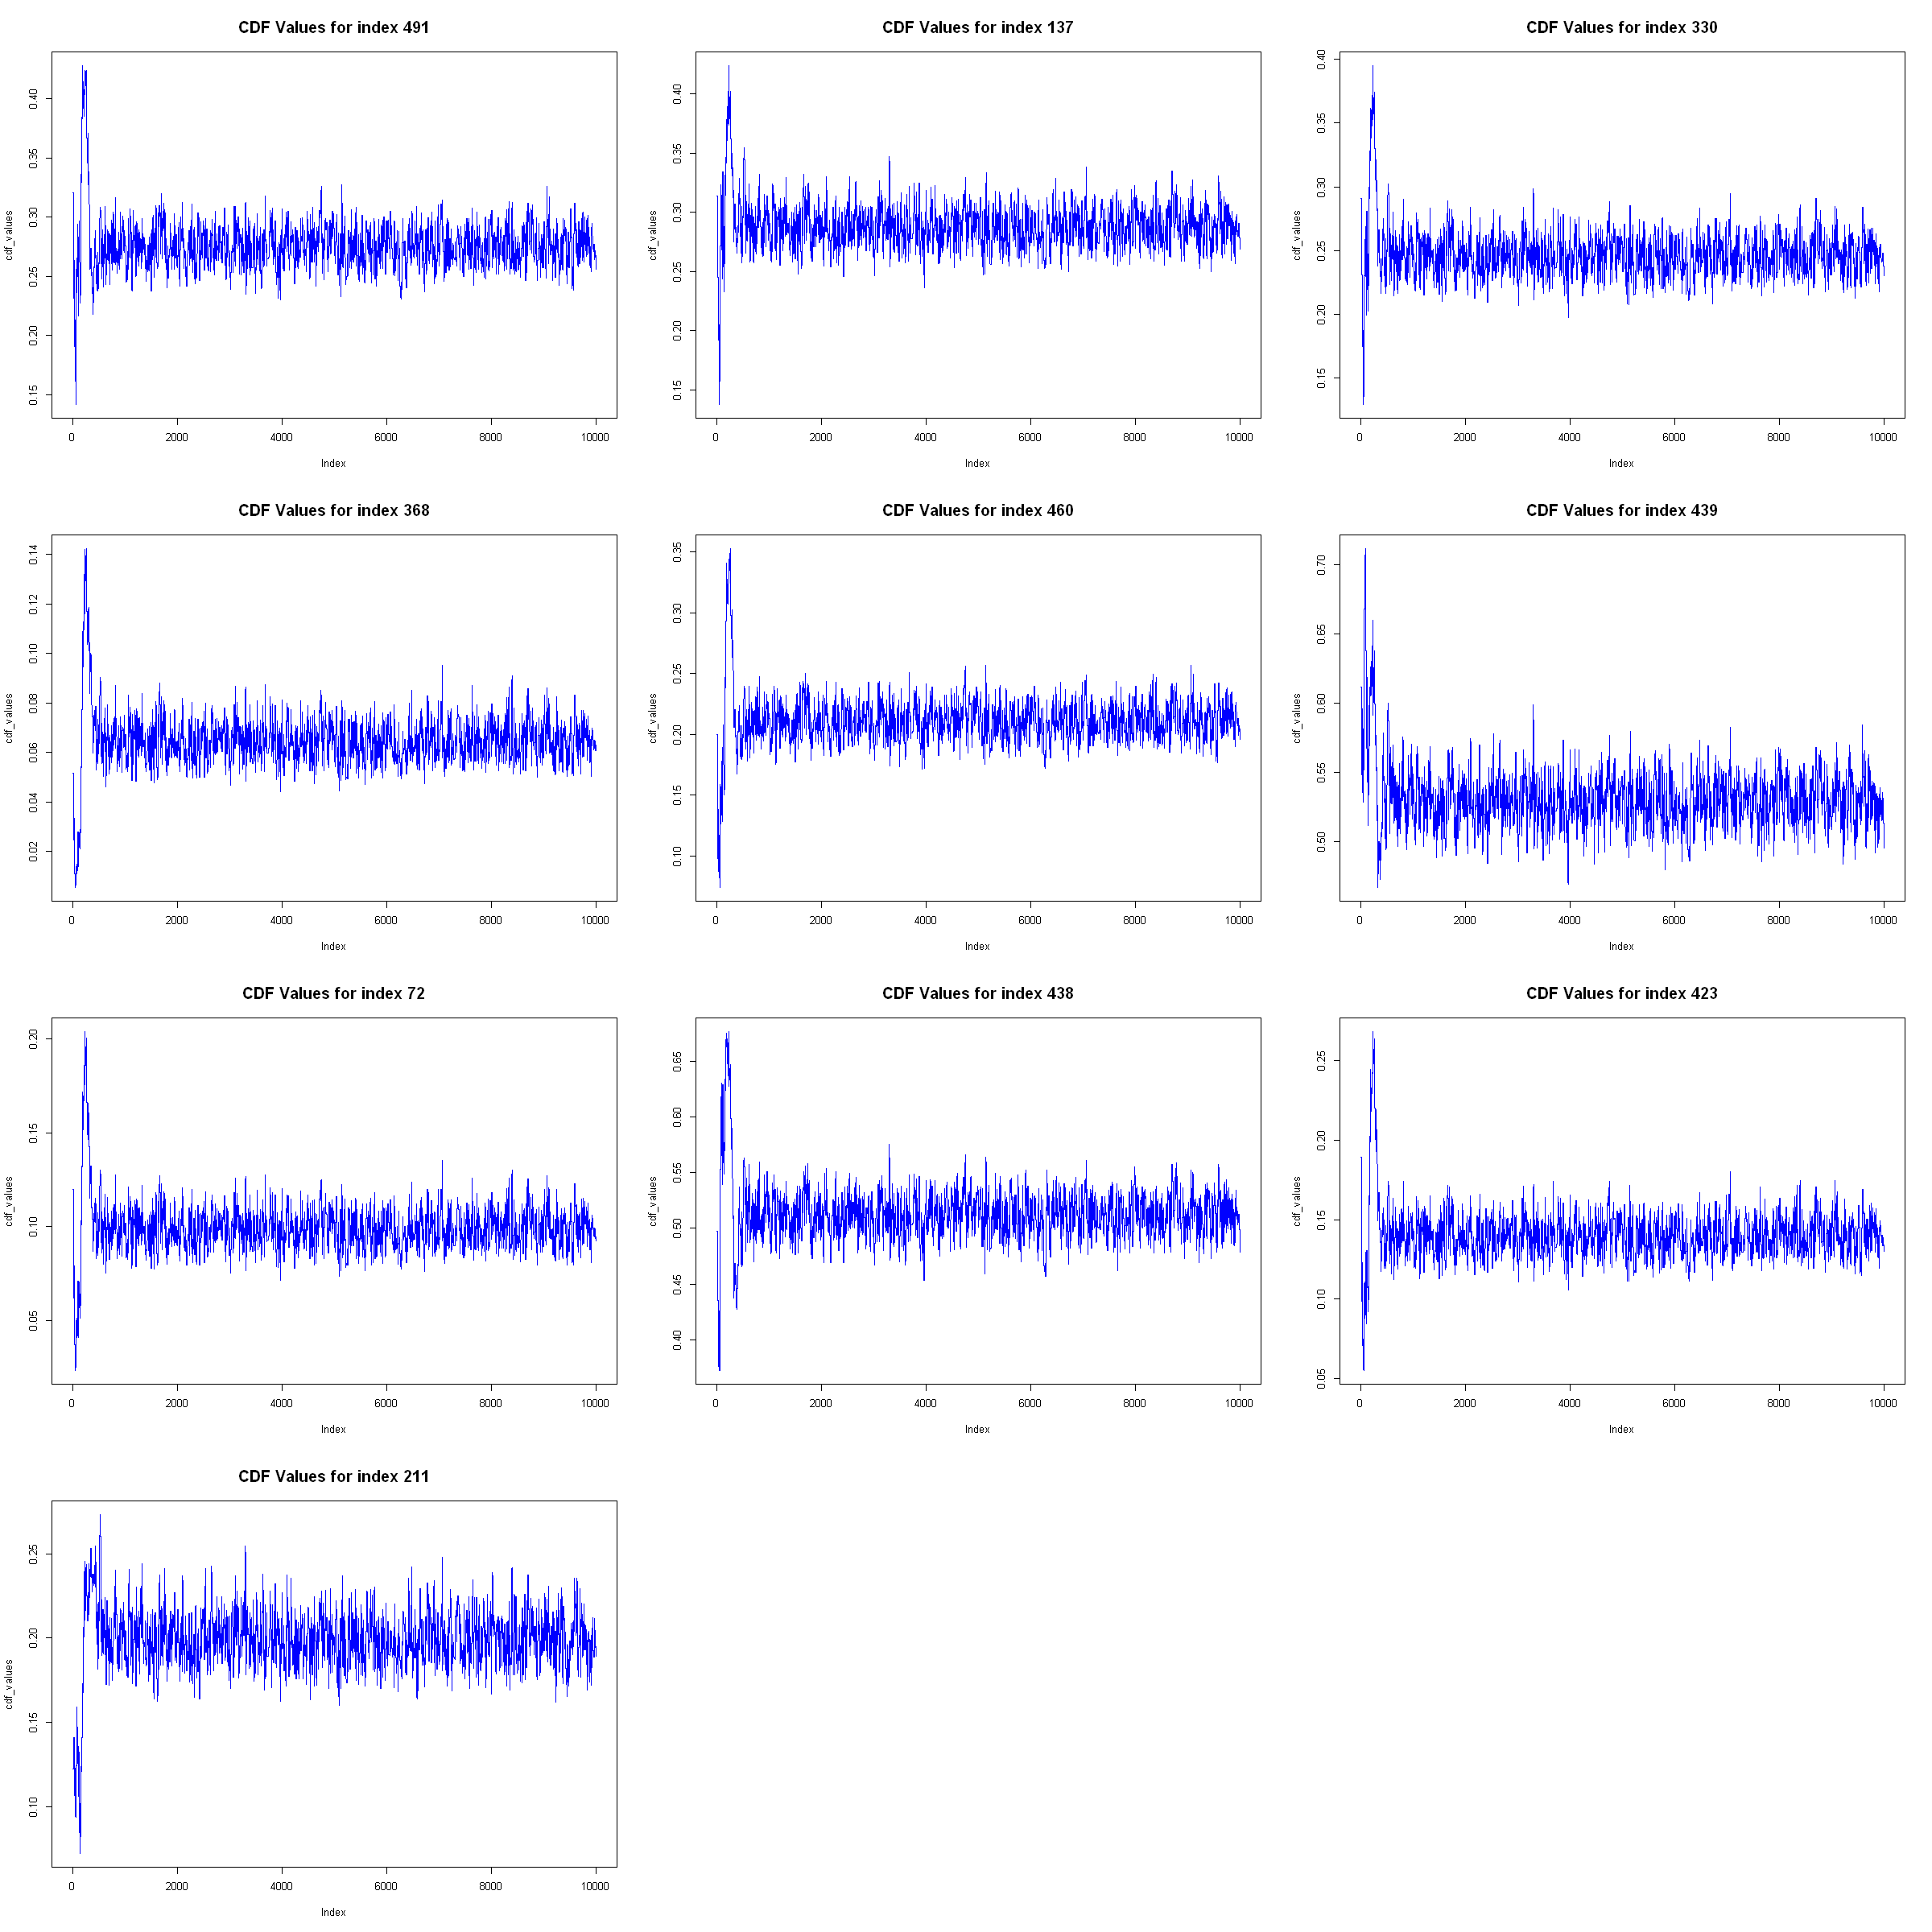

In [136]:

# Getting random indices of the Sample X
idx <- sample(1:N, 10, replace=T)
options(repr.plot.width=20, repr.plot.height=20)

par(mfrow=c(4,3))
for (i in (1:length(index))) {
    
    cdf_values <- cdfTrace(X[index[i],],outputmh,burnin=0,thin=1)
   plot(cdf_values,type='l',col = "blue") 
    title(main=paste(c("CDF Values for index", index [i] ), collapse = " ")
                   , cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
}

In [137]:
# Calculating the CDF and heidel test

for (i in (1:length(index))) {
    
    cdf_values <- cdfTrace(X[index[i],],outputmh,burnin=0, thin=1)
    paste(c("Heidel diagnostic for index ", index [i] ))
    print(heidel.diag(mcmc(cdf_values),eps=0.1, pvalue=0.05))
    }

                                   
     Stationarity start     p-value
     test         iteration        
var1 passed       1001      0.802  
                              
     Halfwidth Mean  Halfwidth
     test                     
var1 passed    0.275 0.00139  
                                   
     Stationarity start     p-value
     test         iteration        
var1 passed       1001      0.785  
                              
     Halfwidth Mean  Halfwidth
     test                     
var1 passed    0.287 0.00127  
                                   
     Stationarity start     p-value
     test         iteration        
var1 passed       1001      0.714  
                              
     Halfwidth Mean  Halfwidth
     test                     
var1 passed    0.246 0.00121  
                                   
     Stationarity start     p-value
     test         iteration        
var1 passed       1         0.143  
                               
     Halfwidth Mean 

### Comments
   As required in the question ,various values of samples from the data set were used and we notice that for both Heidelberger and Welch test they show a stationary distribution and since the test is always passed the burn is equal to 0.<br> 
    We can also conclude that the Gelman dignostic is better since its results are based on all the generated chains and it can suggest a number of iterations to convergence unlike Heidelberger.
    
   

## Question 6

Generate three different chains $outputmh1$,$outputmh2$, $outputmh3$ with different starting values and use the Gelman and Rubin’s diagnostic (coda functions $gelman.diag$ and
    $gelman.plot$) as an additional convergence check. 
 Discuss your results in combination with the previous ones to determine a reasonable number of iterations.</p>


[1] "Gelman diagnostic for index " "491"                         
Potential scale reduction factors:

     Point est. Upper C.I.
[1,]       1.09       1.27

[1] "Gelman diagnostic for index " "137"                         
Potential scale reduction factors:

     Point est. Upper C.I.
[1,]       1.07       1.21

[1] "Gelman diagnostic for index " "330"                         
Potential scale reduction factors:

     Point est. Upper C.I.
[1,]       1.03       1.07

[1] "Gelman diagnostic for index " "368"                         
Potential scale reduction factors:

     Point est. Upper C.I.
[1,]       1.13       1.39

[1] "Gelman diagnostic for index " "460"                         
Potential scale reduction factors:

     Point est. Upper C.I.
[1,]       1.03       1.07

[1] "Gelman diagnostic for index " "439"                         
Potential scale reduction factors:

     Point est. Upper C.I.
[1,]       1.41       2.07

[1] "Gelman diagnostic for index " "72"                   

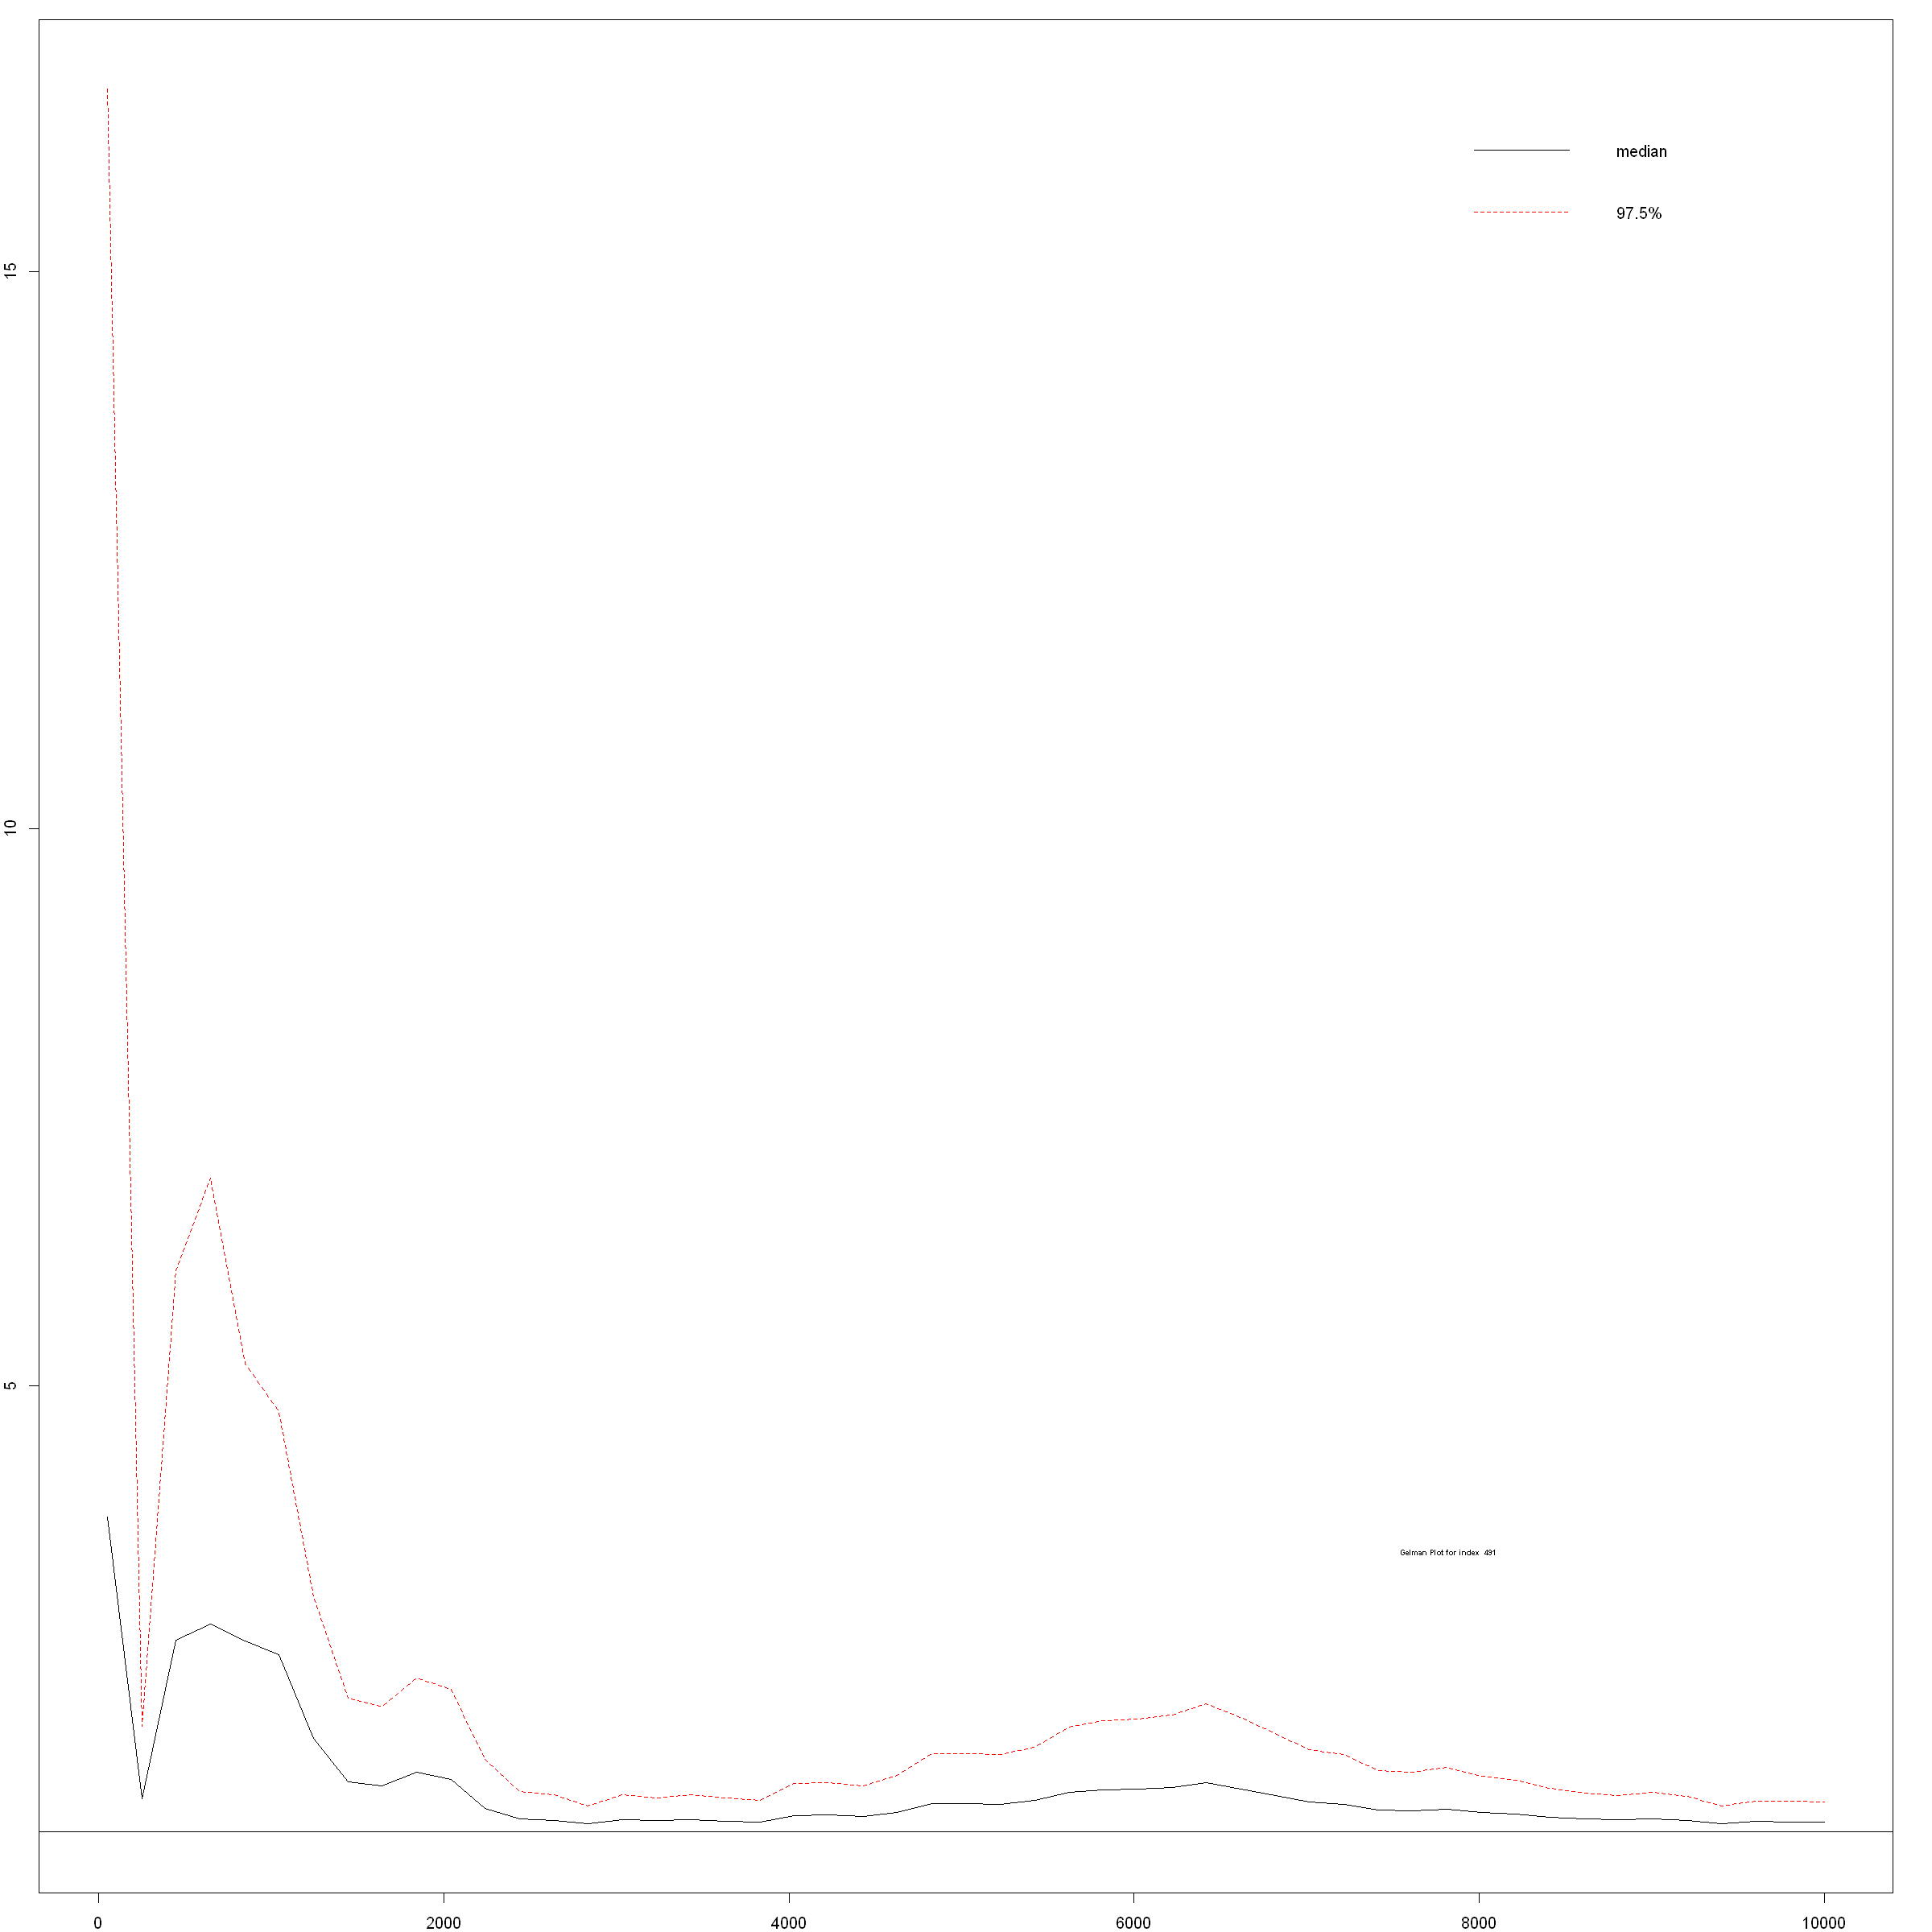

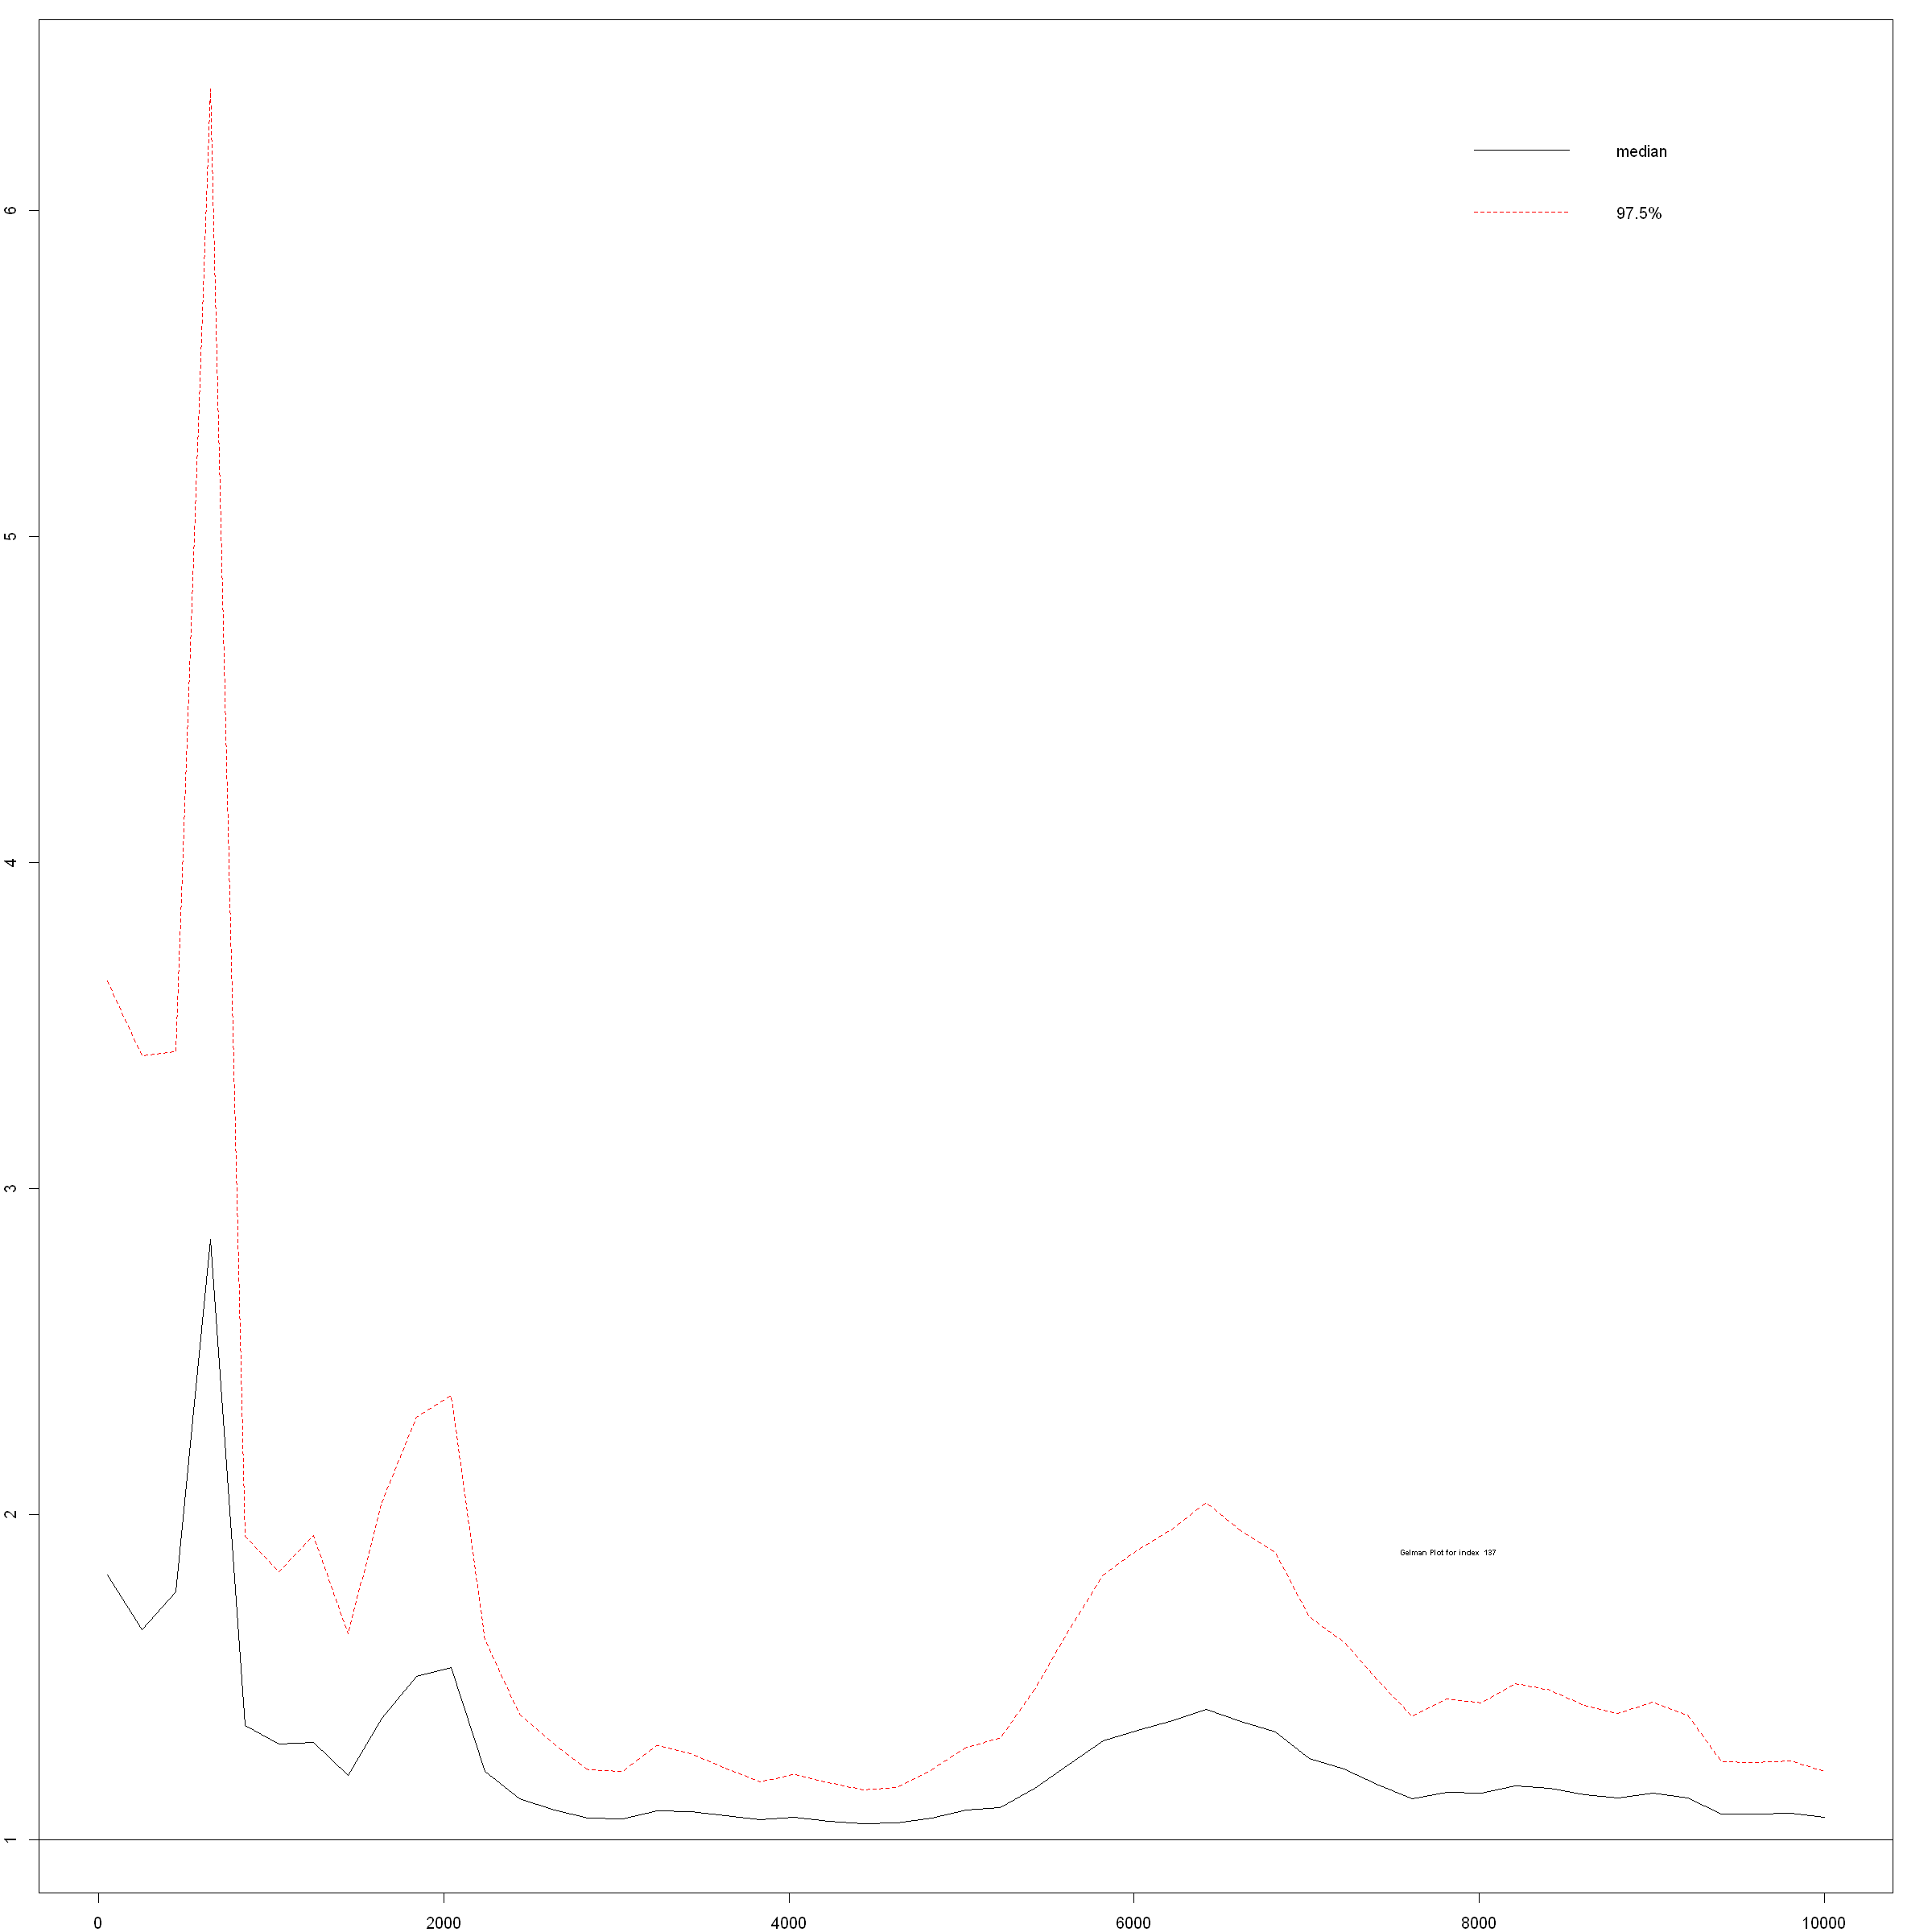

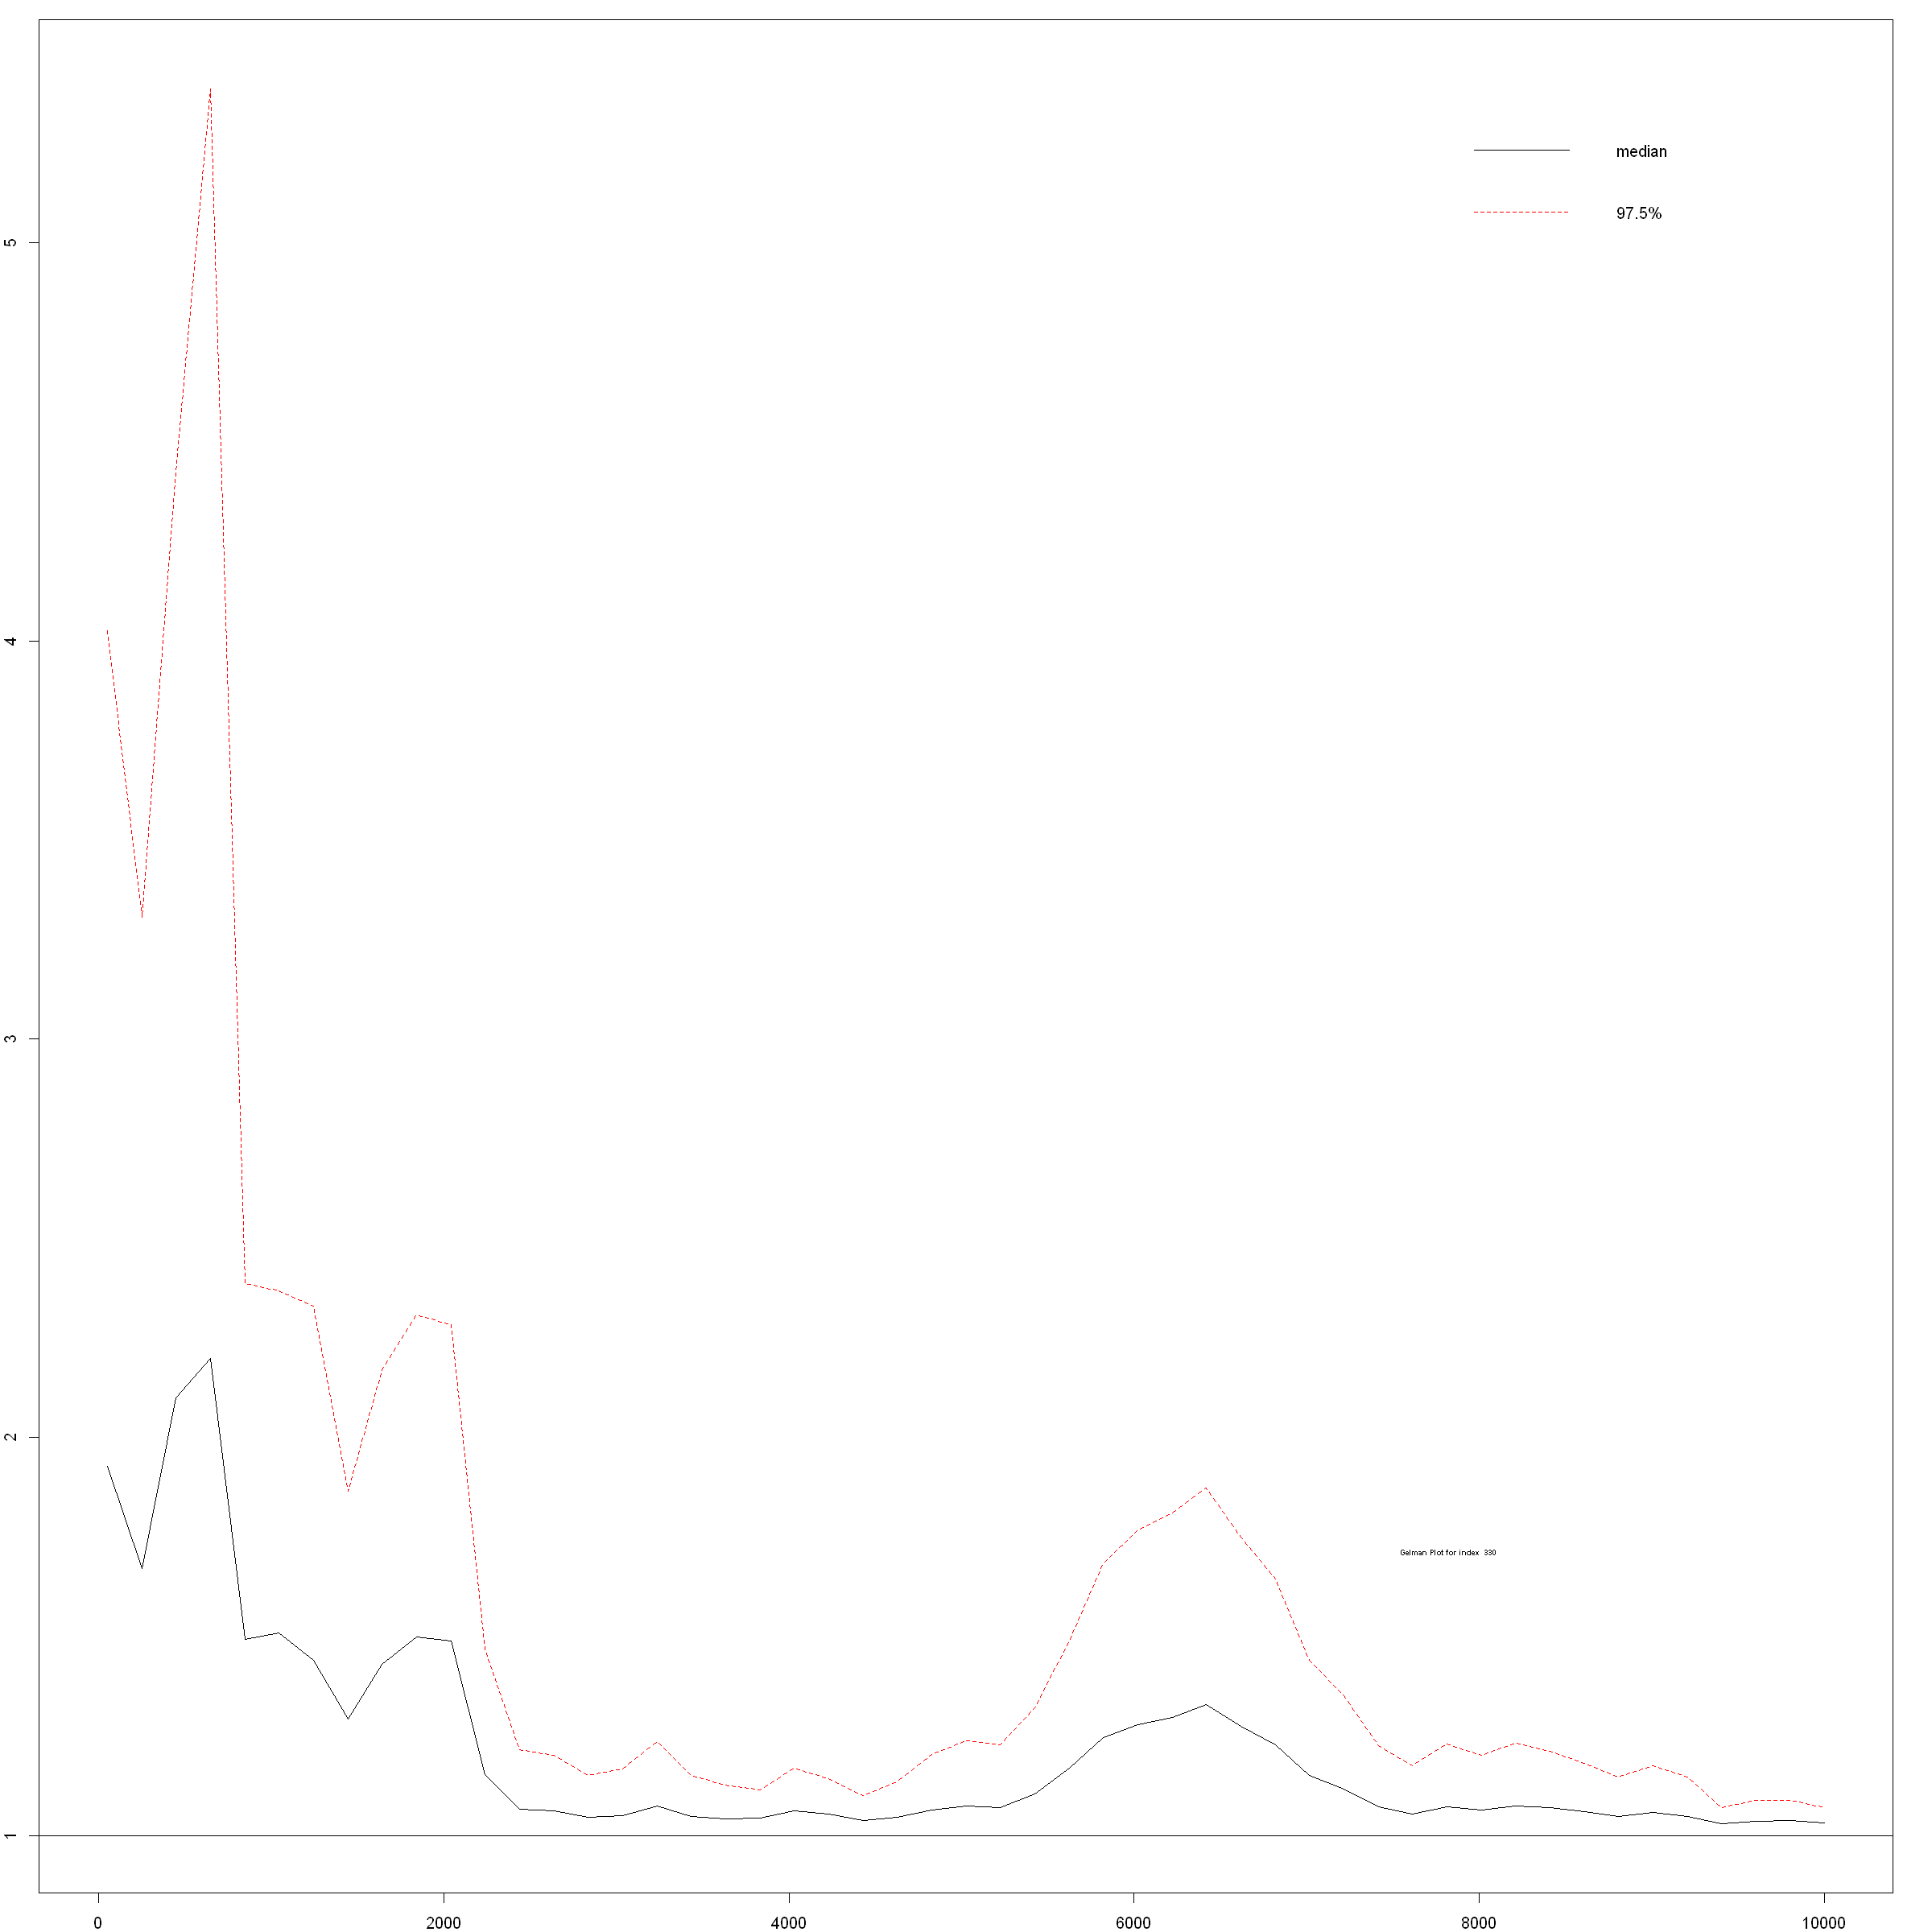

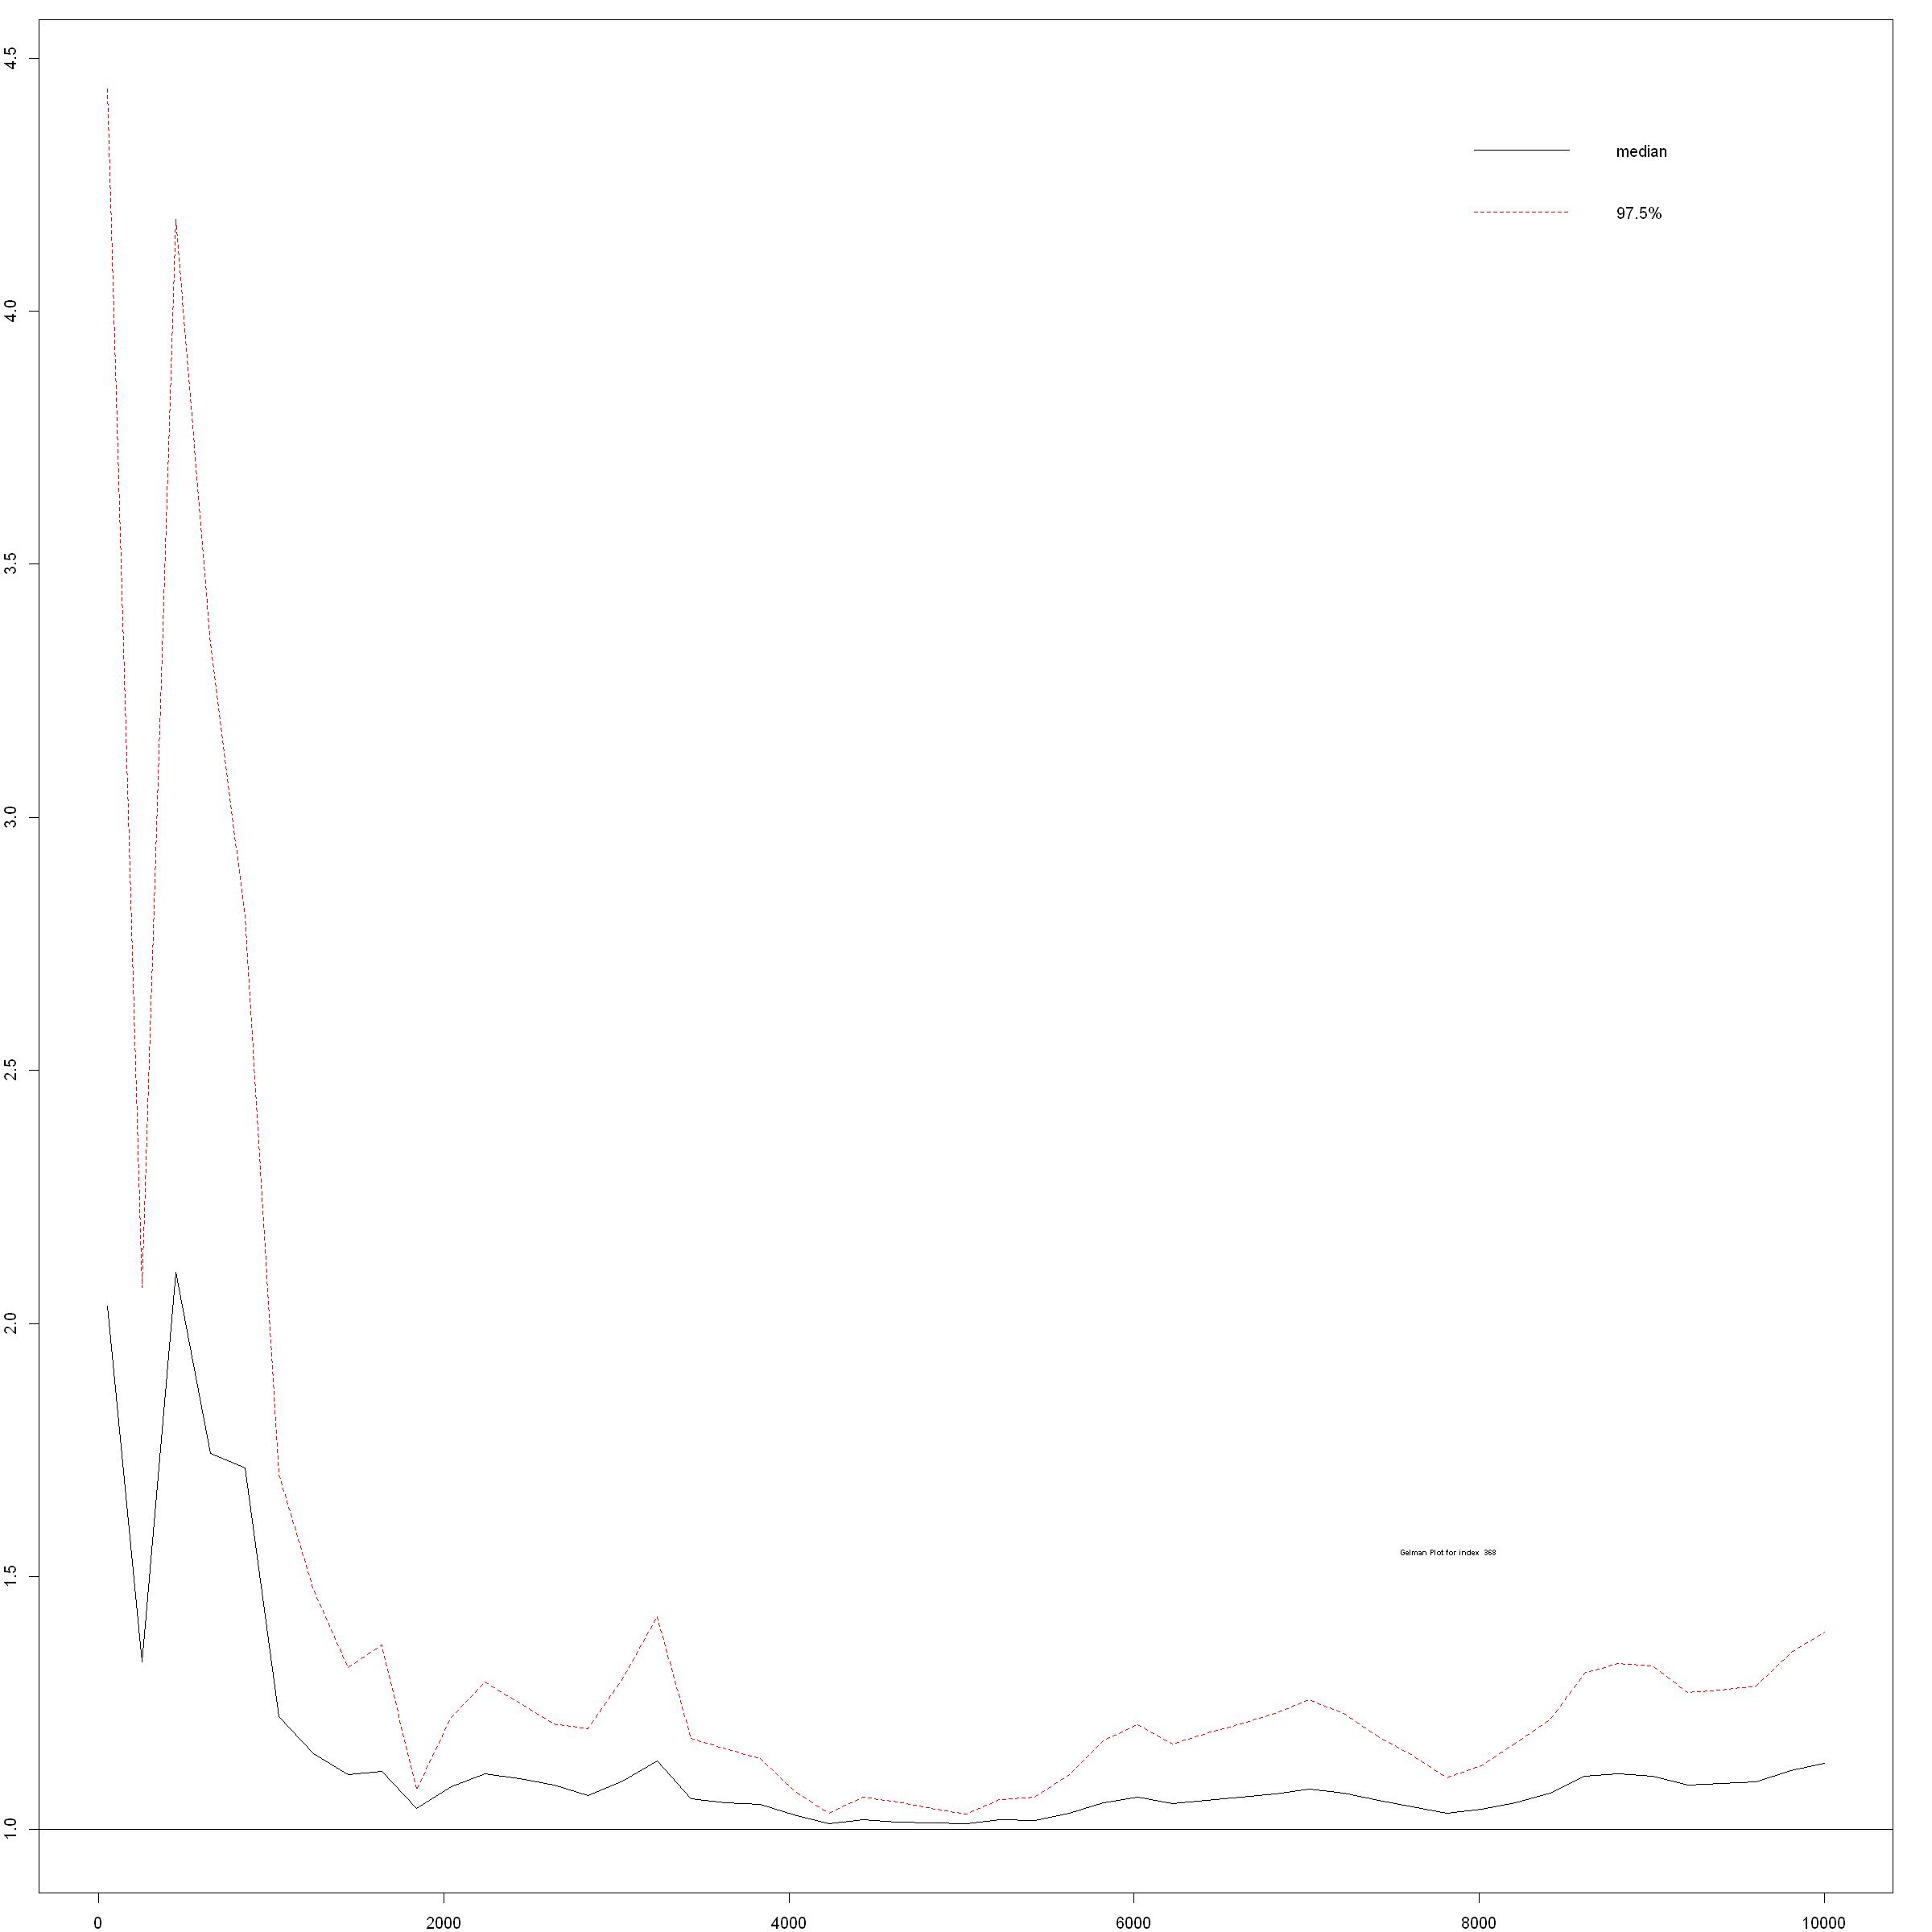

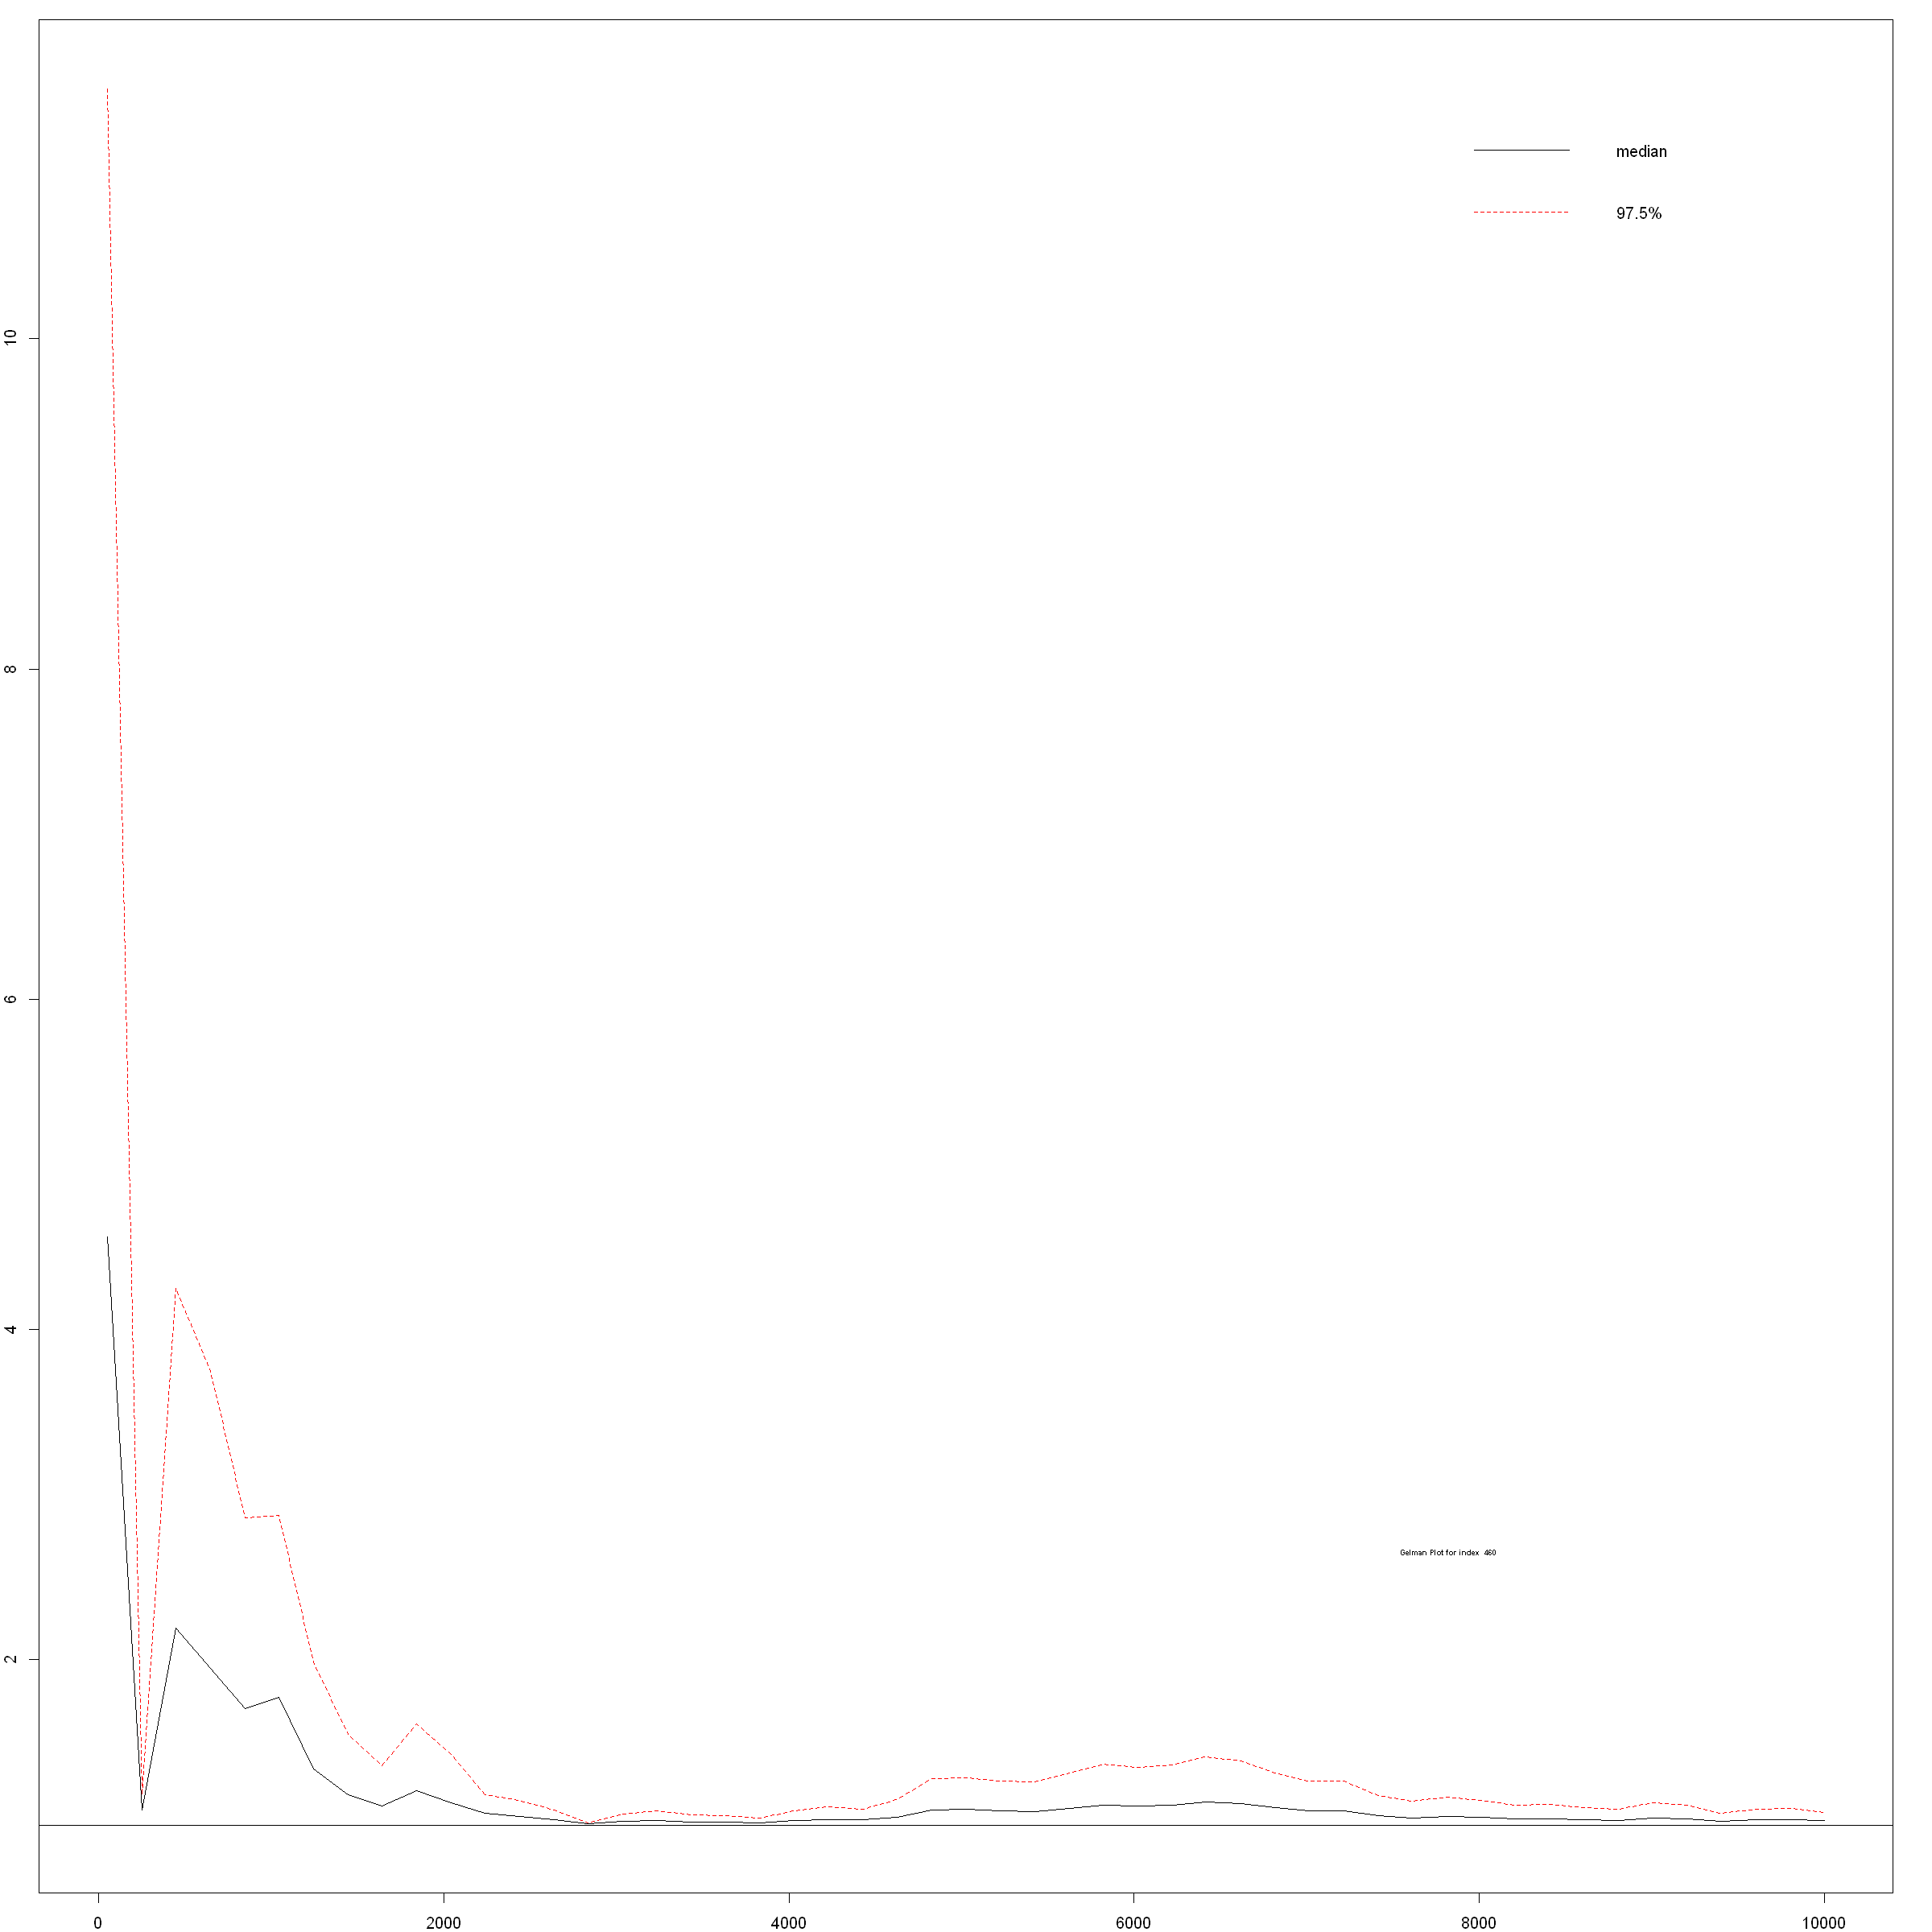

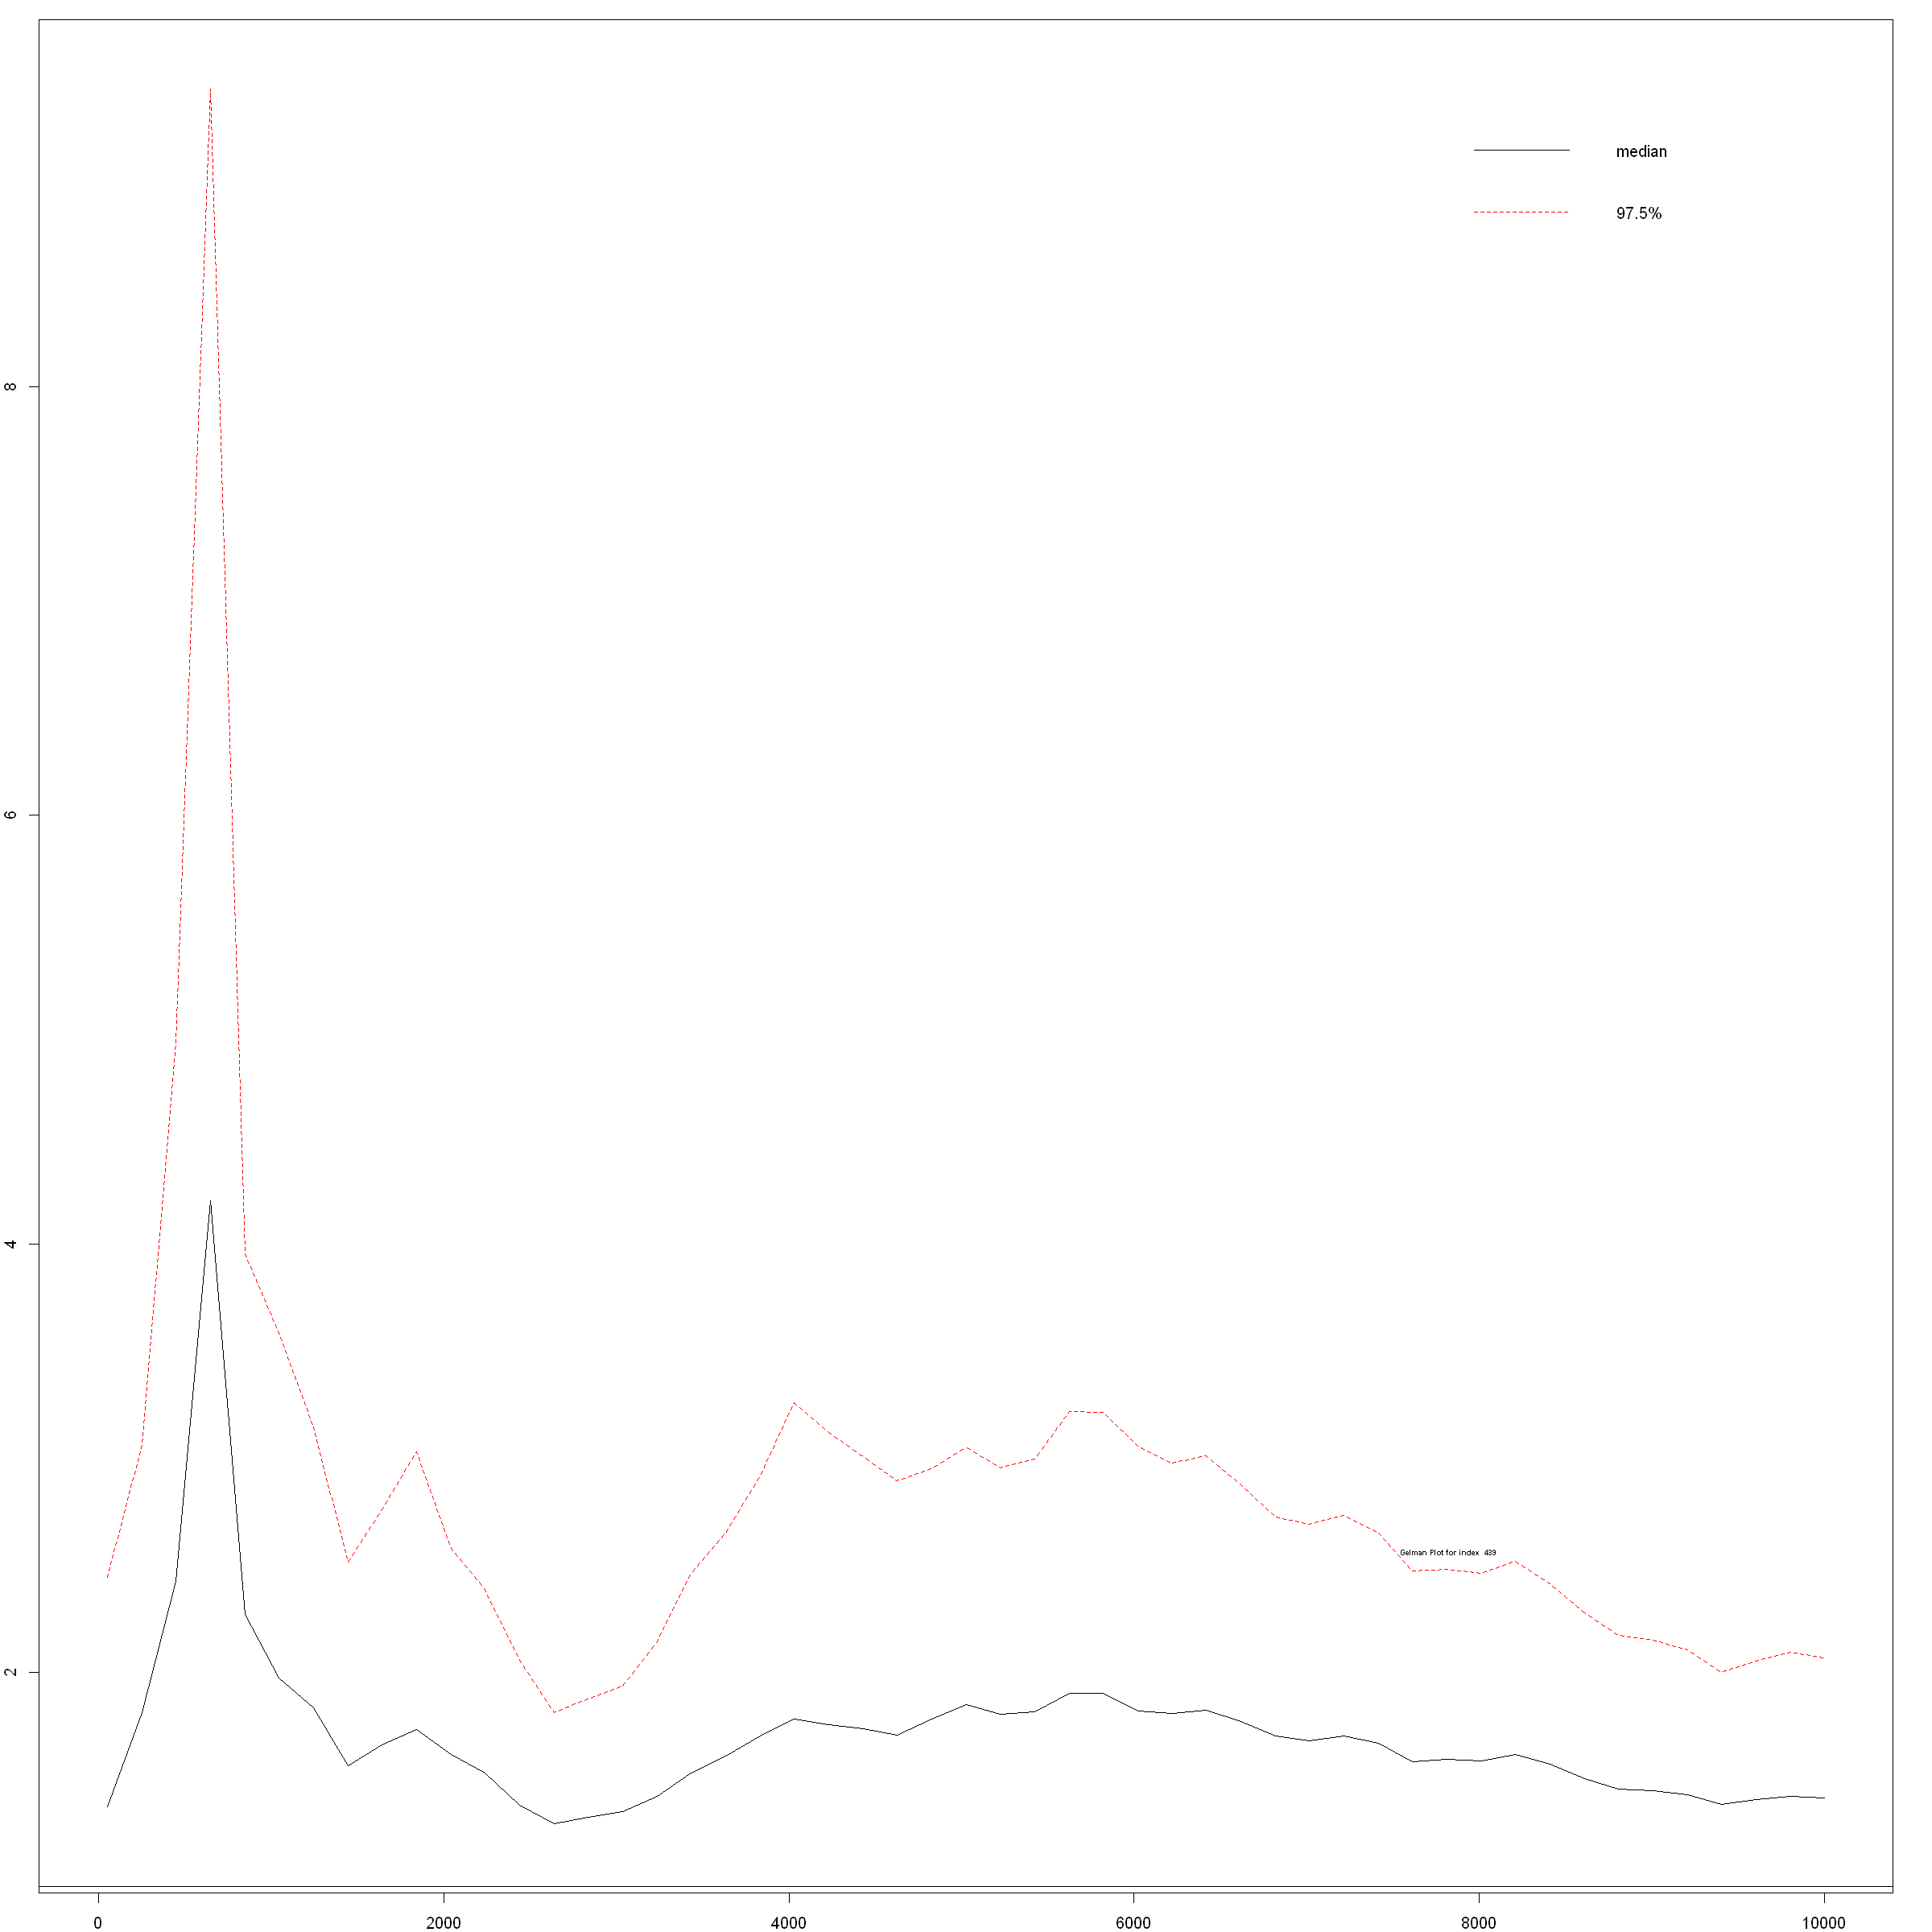

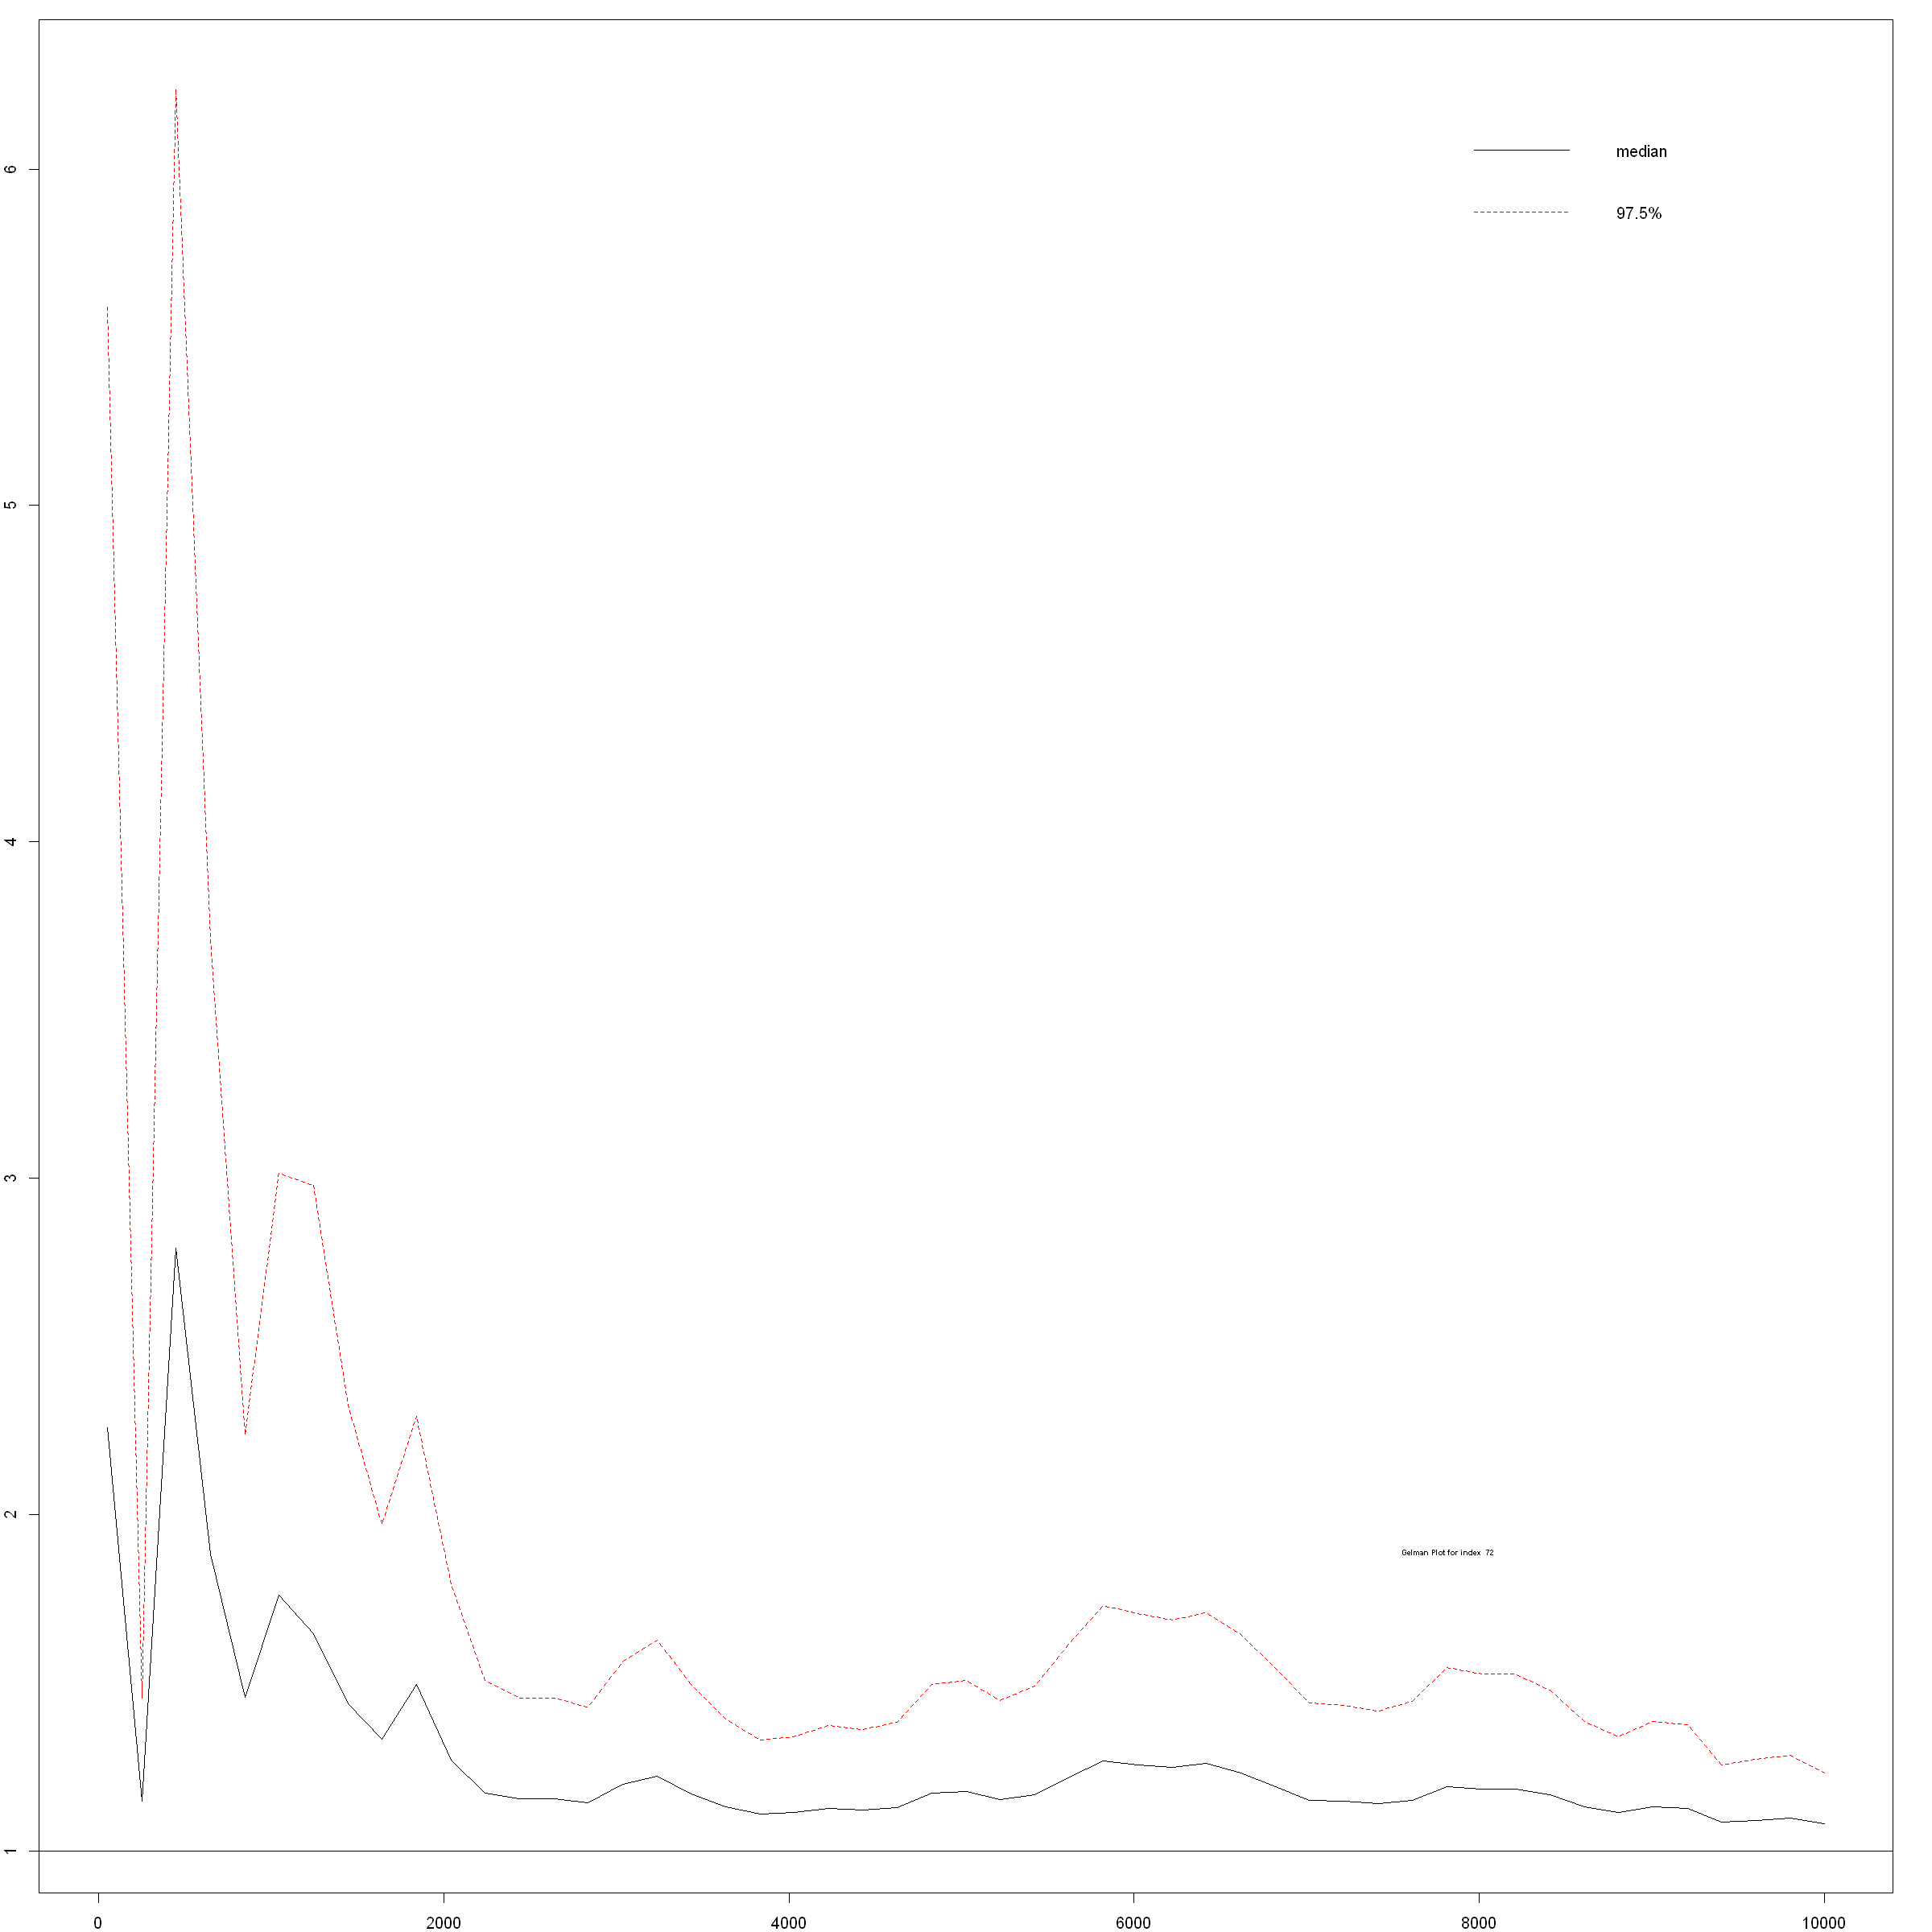

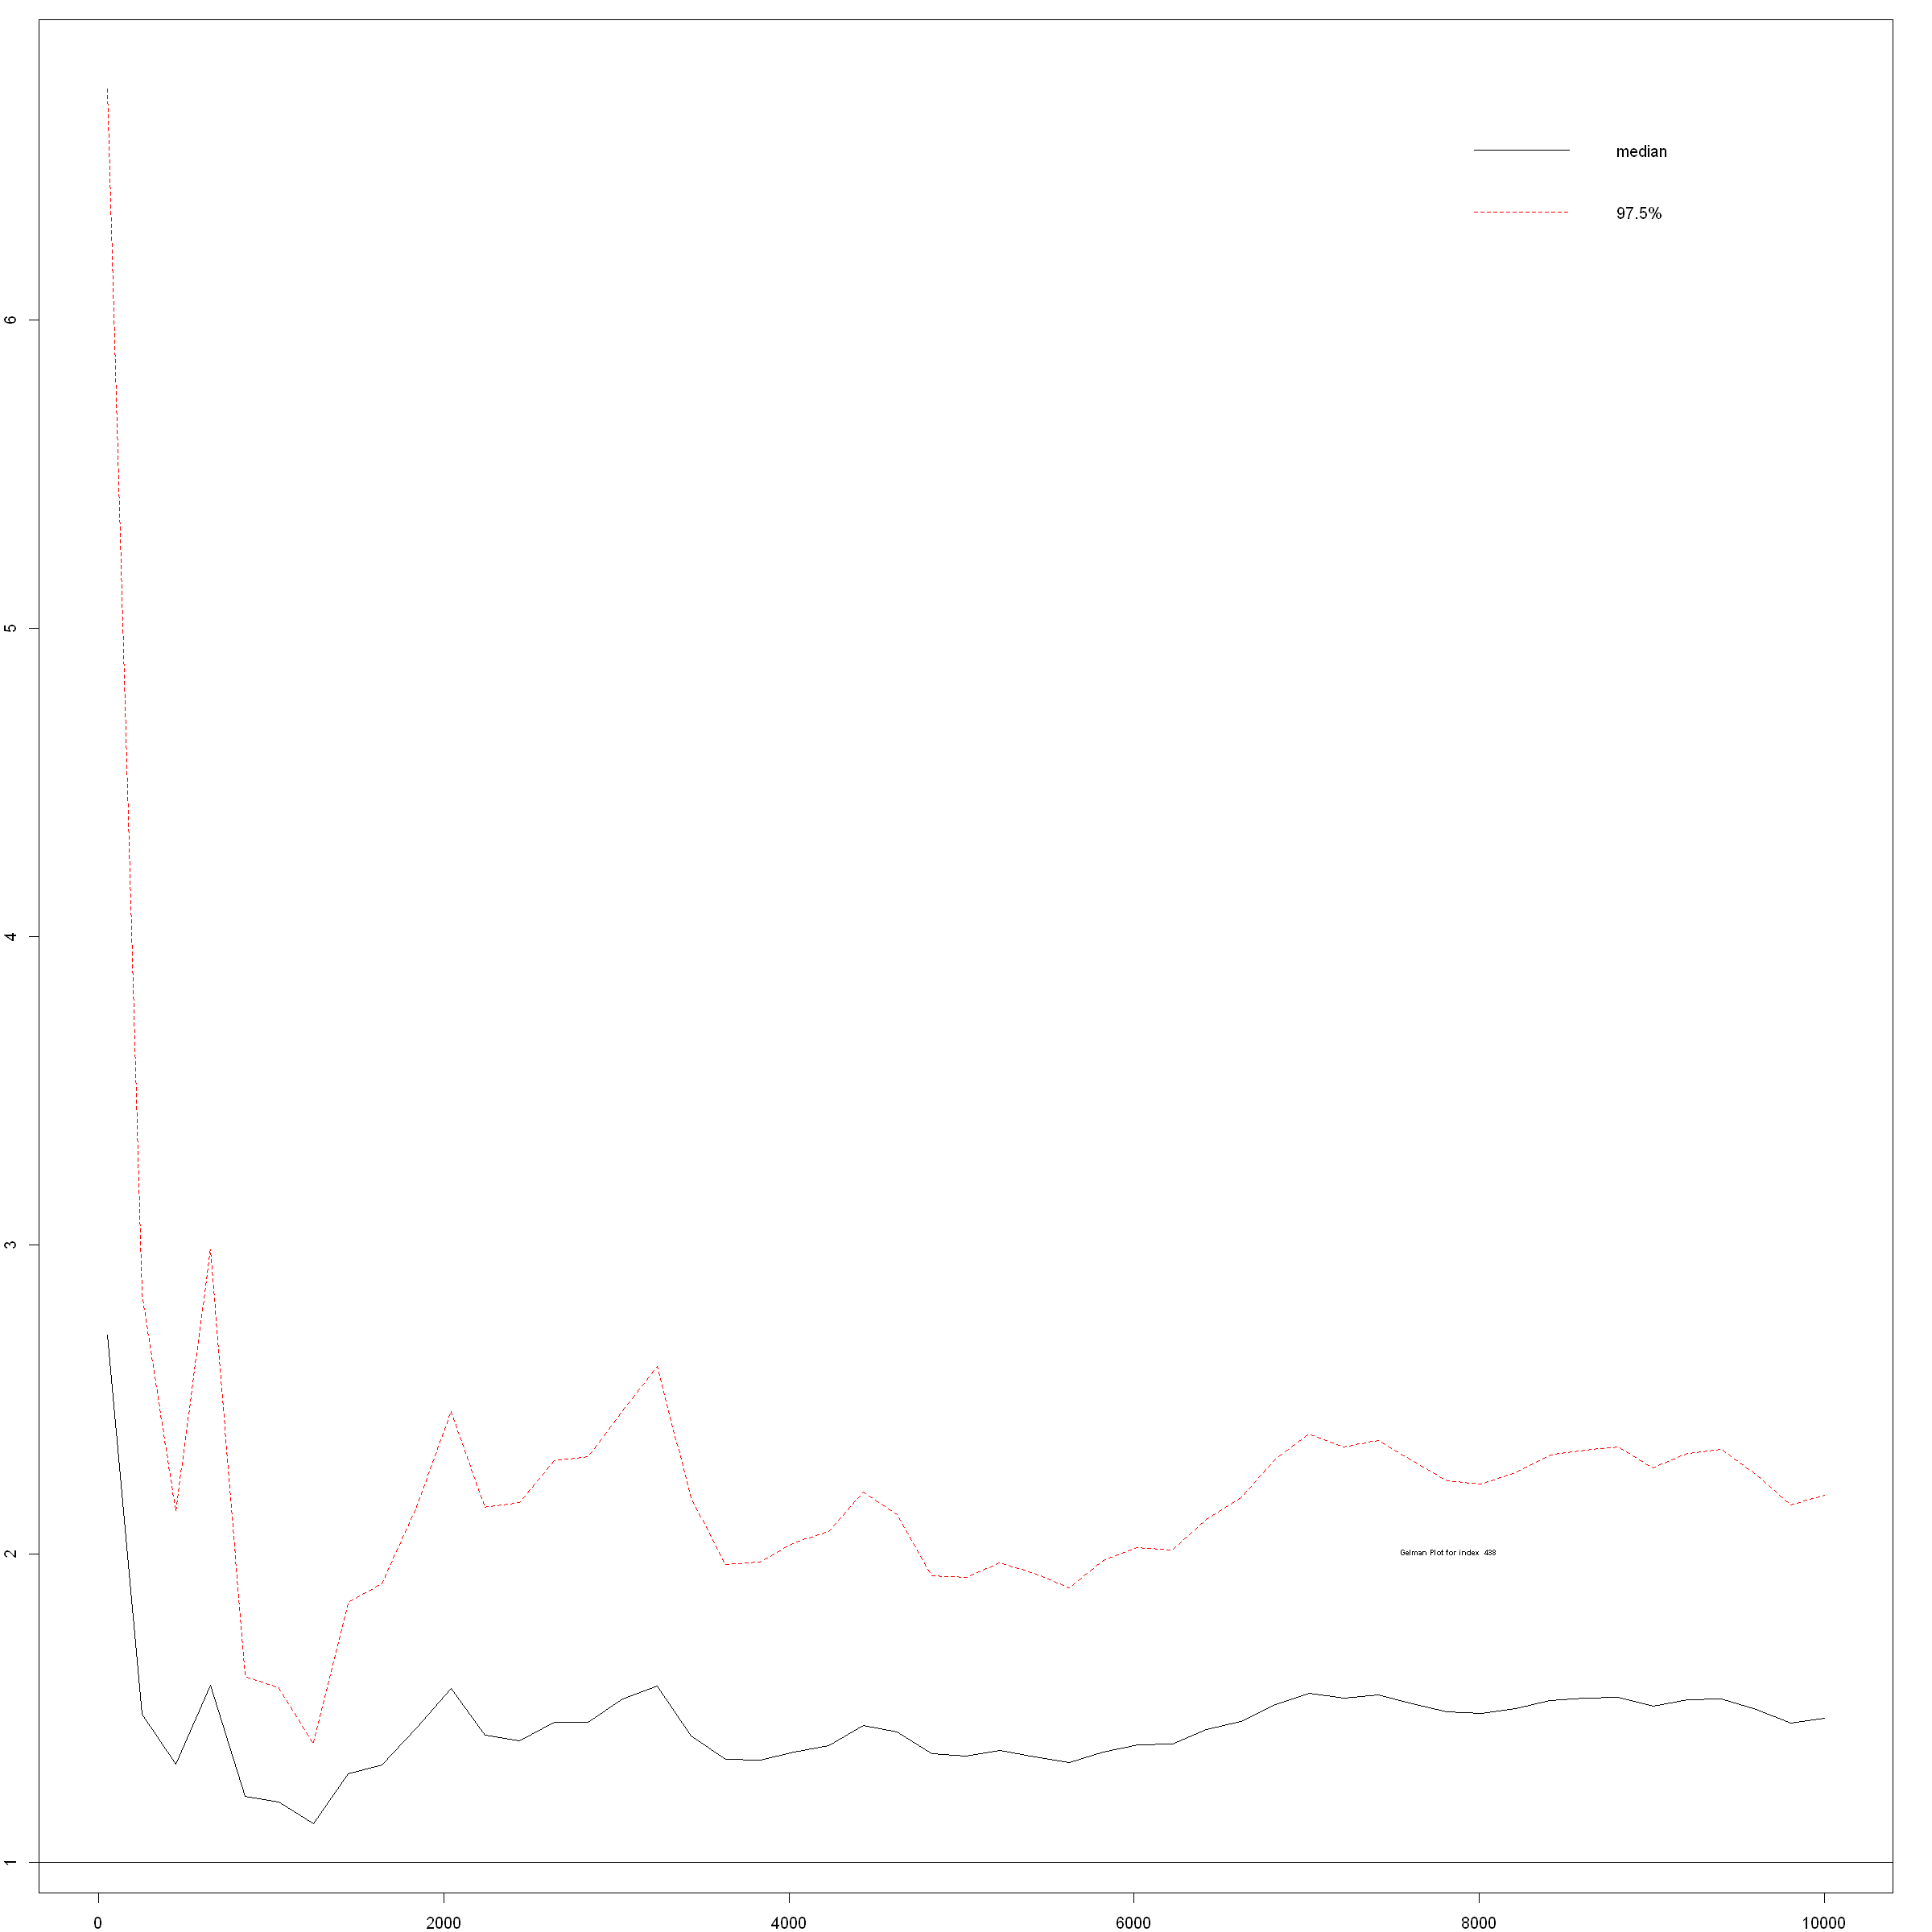

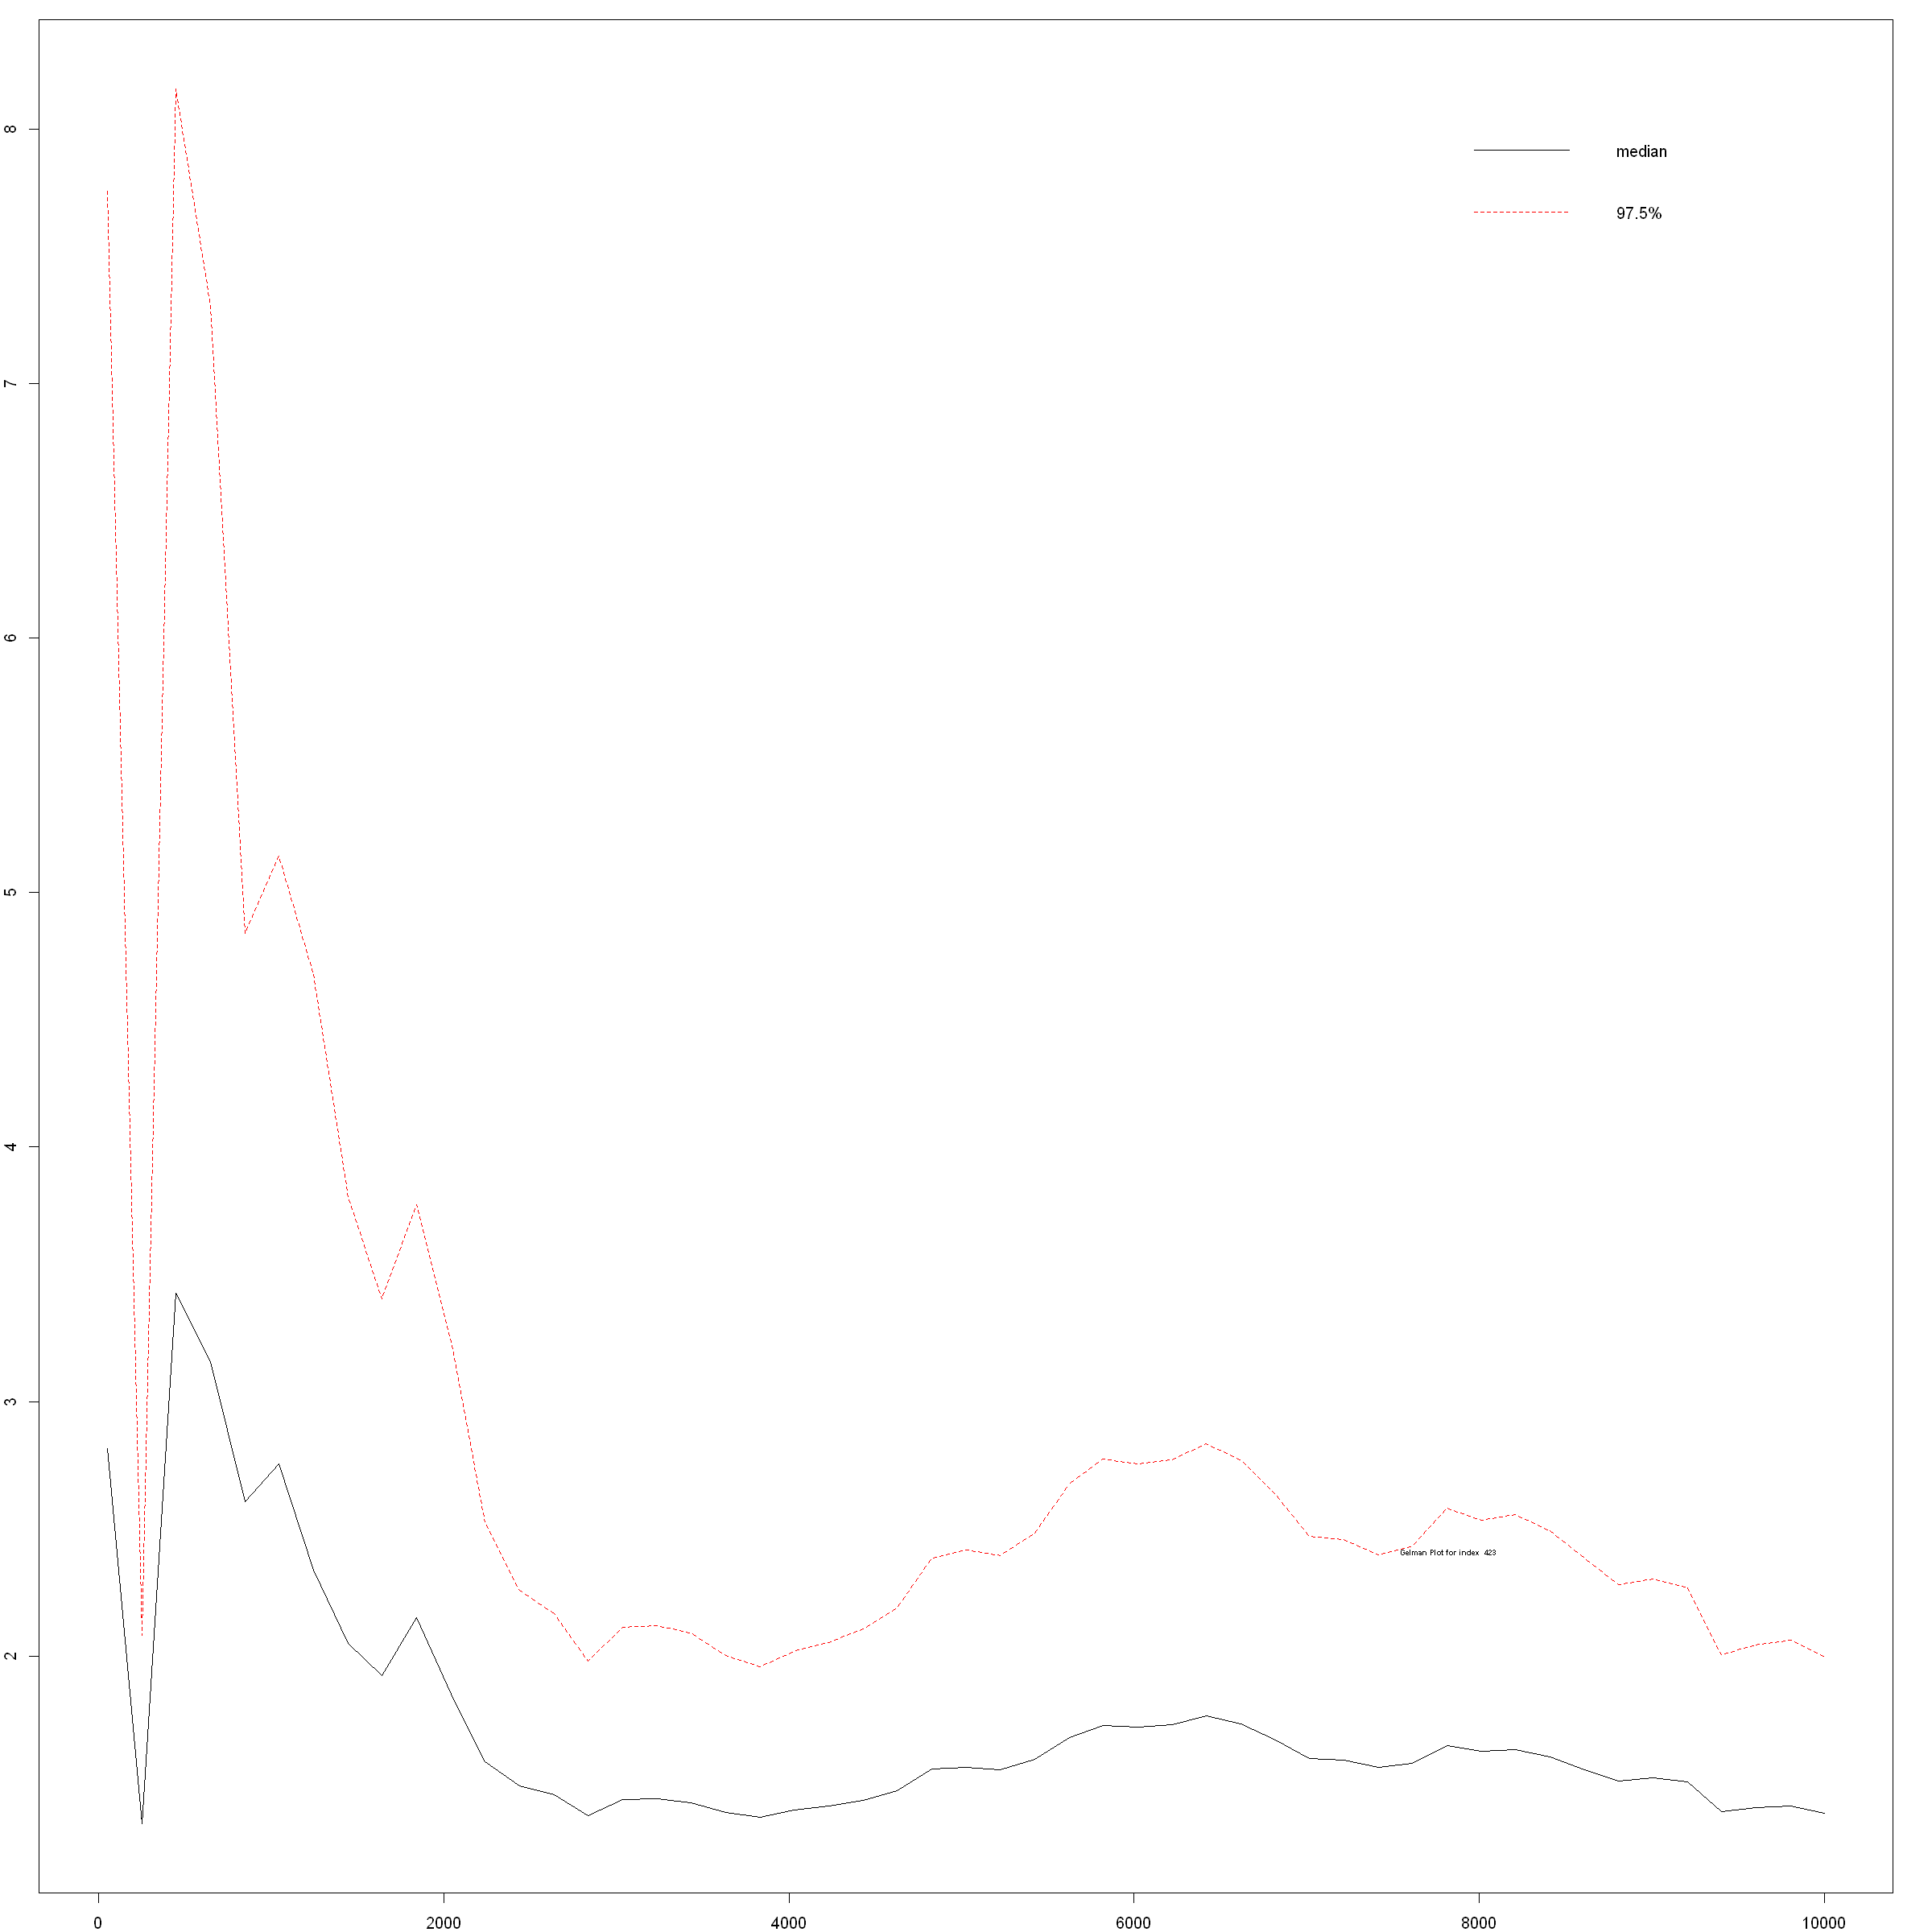

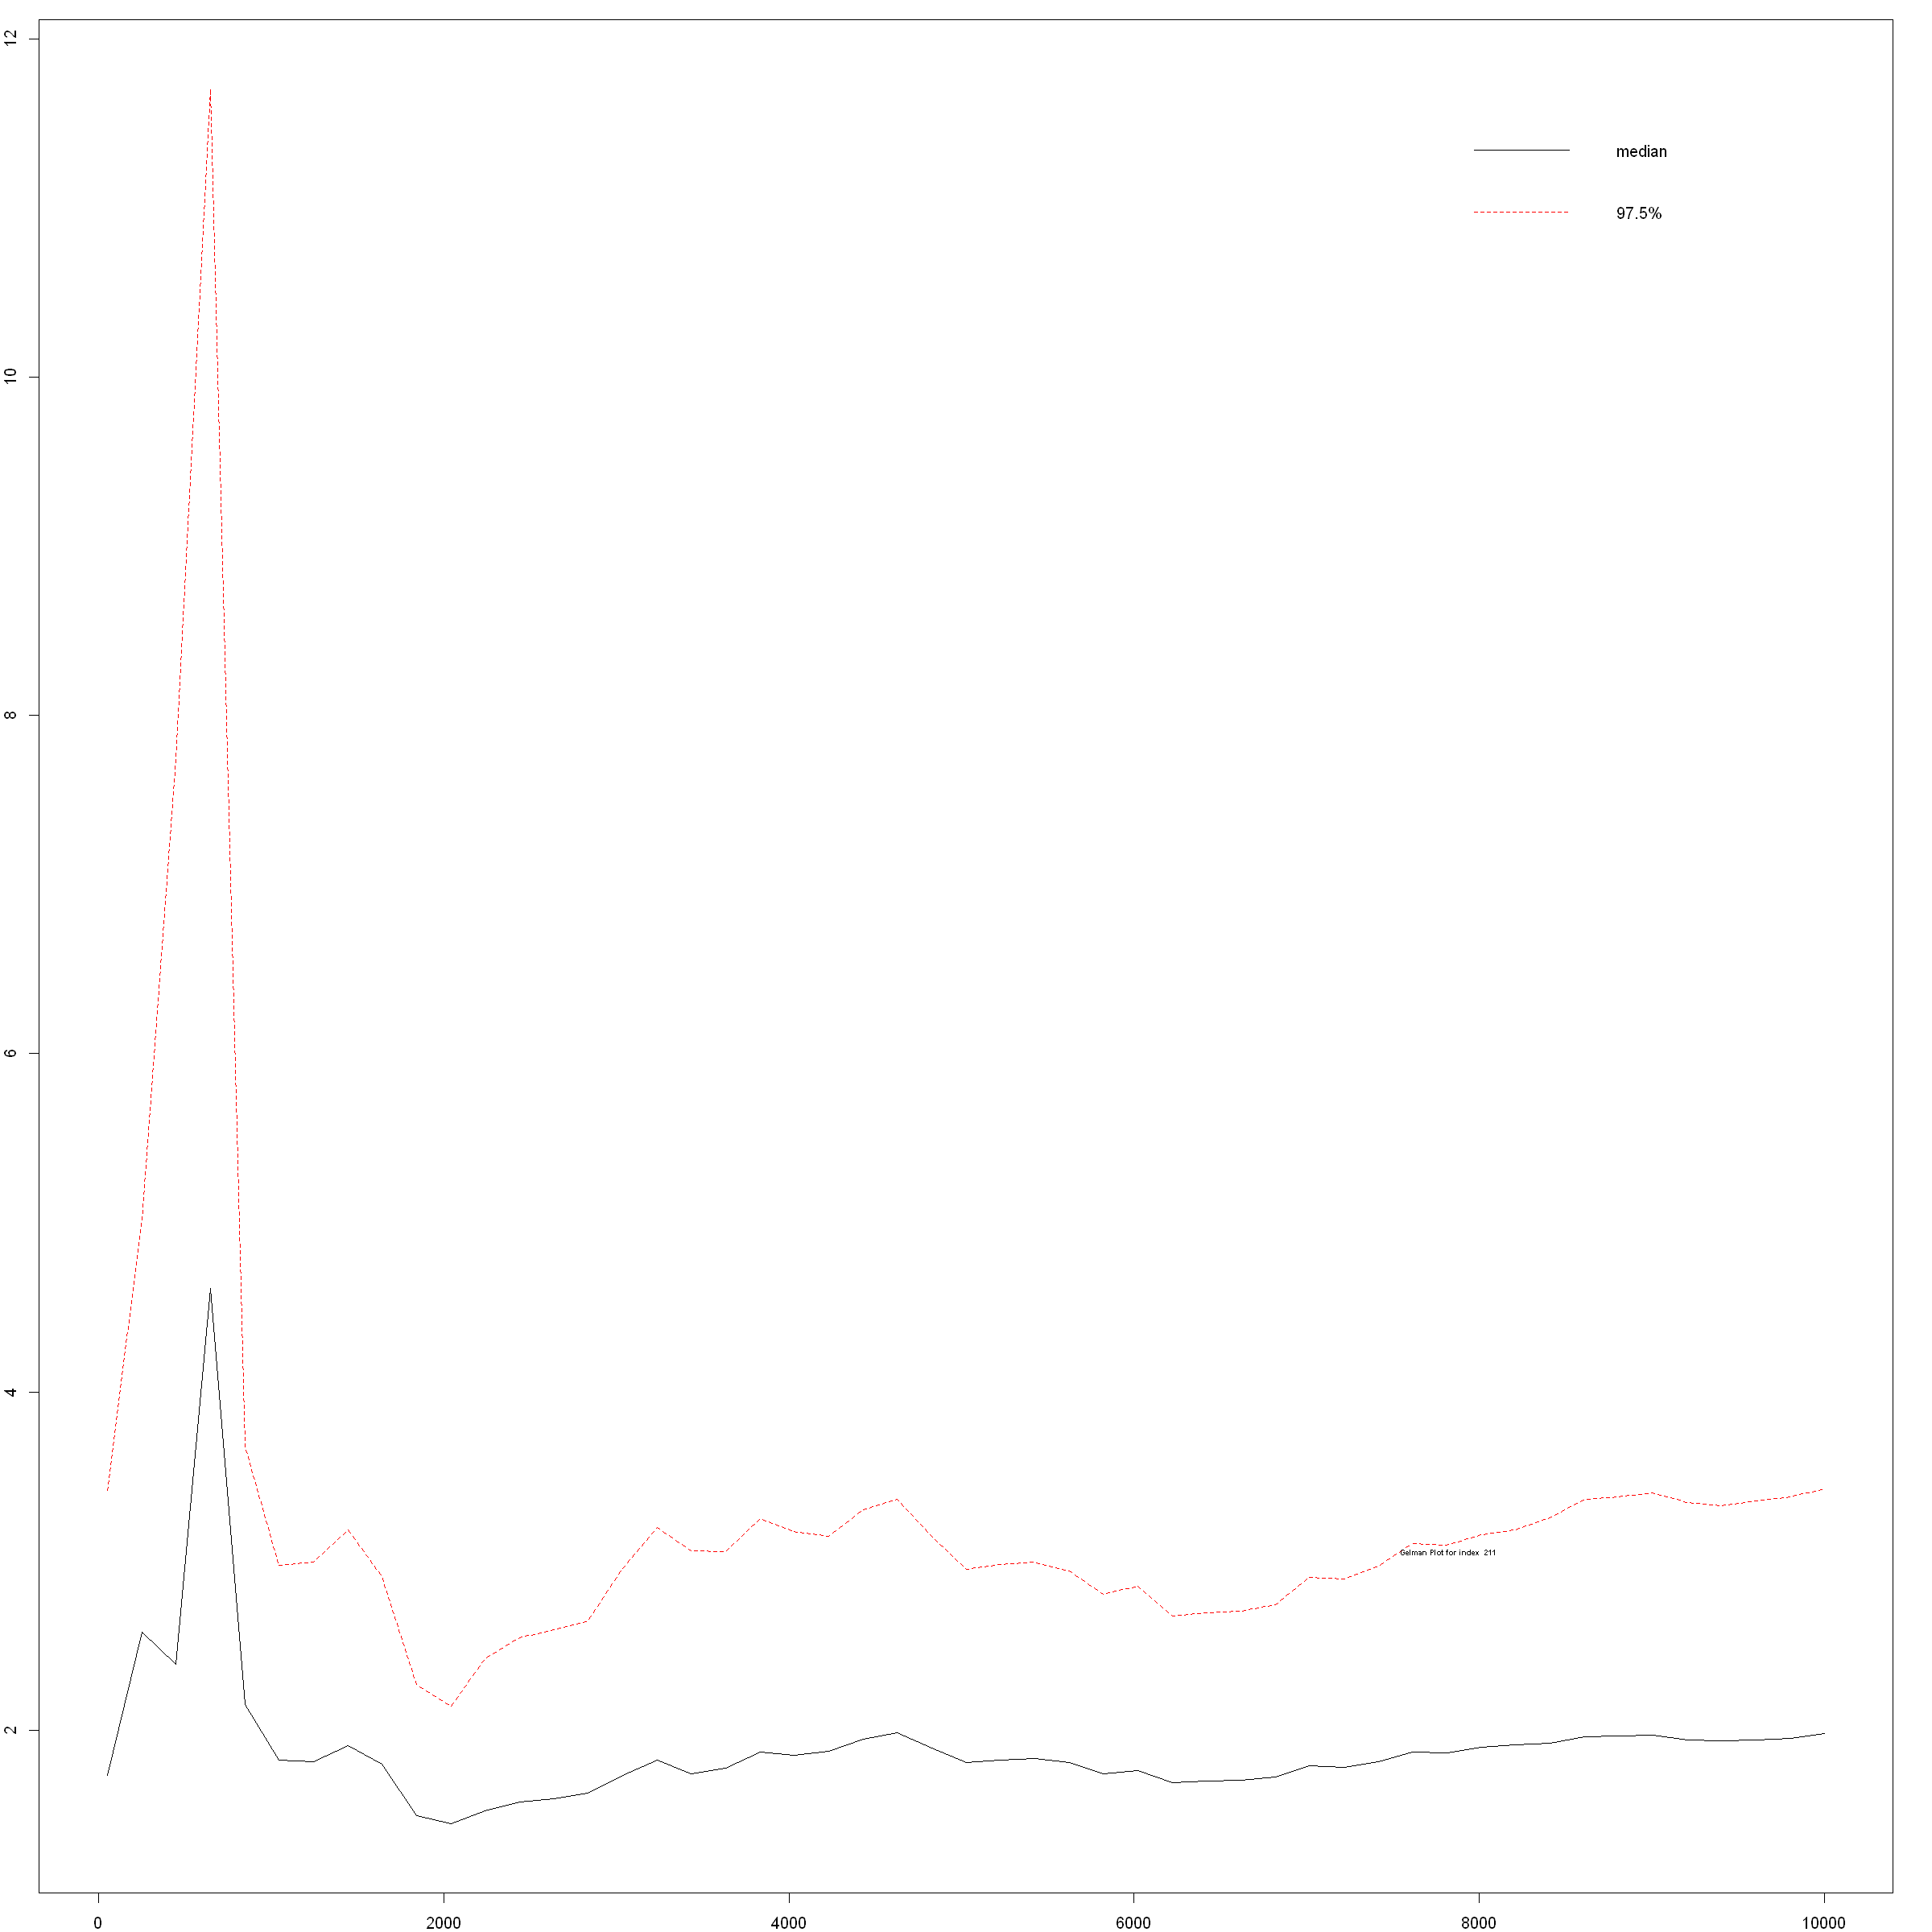

In [138]:
# Initializing the variable randomly

alpha0_param <- runif(3 , 0 ,  1)
beta0_param <- runif(3 , 0 ,  1)
m0_param <- matrix(c(sample(0:2,6,replace=T)),,nrow=3,ncol=2,byrow = TRUE)
W0_param <- array(c(1*diag(2),2*diag(2),5*diag(2)),dim=c(2,2,3))
nu0_param <- sample(10:100,3)

# Determining outputmh1 ,outputmh2,outputmh3
outputmh_list <- list()
for(i in (1:3)){
     
    init <- initPar(x=X, k=Kmc)

    hpar <- list( alpha0= alpha0_param[i], 
           m0 = m0_param[i,], beta0 = beta0_param[i], 
           W0 = W0_param[,,i], nu0 = nu0_param[i])
  
    ppar <- list(var_Mu = 0.001,
            nu_Sigma = 500,
            alpha_p = 500) 
     


     outputmh_list[[i]] <- MHsample(x=X, k=Kmc, nsample= 10000,
                    init=init, hpar=hpar, ppar=ppar)
}# Applying the gelman diagnostic

for (i in 1: length(index)) {
    
    cdf_1 = cdfTrace(X[index[i],],outputmh_list[[1]])
    cdf_2 = cdfTrace(X[index[i],],outputmh_list[[2]])
    cdf_3 = cdfTrace(X[index[i],],outputmh_list[[3]])
    outputmh_mcmc<- mcmc.list(mcmc(cdf_1),mcmc(cdf_2),mcmc(cdf_3))
    print(paste(c("Gelman diagnostic for index ", index [i] )))
    print(gelman.diag(outputmh_mcmc, autoburnin=TRUE))
}

# Plotting gelman diagnostic
 
par(mfrow=c(5,2), mar=c(2,2,1,2))
for (i in 1: length(index)) {
    
    cdf_1 = cdfTrace(X[index[i],],outputmh_list[[1]])
    cdf_2 = cdfTrace(X[index[i],],outputmh_list[[2]])
    cdf_3 = cdfTrace(X[index[i],],outputmh_list[[3]])
    outputmh_mcmc <- mcmc.list(mcmc(cdf_1),mcmc(cdf_2),mcmc(cdf_3))
    gelman.plot(outputmh_mcmc)
    title(main=paste(c("Gelman Plot for index ", index [i] ), collapse = " ")
                   , cex.main=0.7)
}

### Comments
    The conclusion that we can have based on the graphs above: From The Gelmen Rubin diagnostic the scale factor is decreasing and the variance of chains is almost the same.

## Question 7

Complete the following code chunk in order to plot the desired result together with the true
density.
 Define outputmh as one of the three previously generated chains with good pvalues for the Heidelberger and Welch’stest. Notice that the wrapper function from file
fonctions_GM.R is a convenient auxiliary allowing to apply a function on a grid via the
R function outer. 


In [ ]:
#######################################################
#' Predictive density
#' ####################################################
xx <- seq(-2,2,length.out=20)
yy <- xx
dtrue <- outer(X= xx, Y=yy,
            FUN = function(x,y){
                wrapper(x=x, y=y,
                        FUN=function(u,v){
                          exp(gmllk(x = c(u,v), Mu = Mu,
                          Sigma = Sigma, p = p))
                        })
            })

dpredmh <-  outer(X= xx, Y=yy,
            FUN = function(x,y){
                wrapper(x = x, y = y,
                        FUN =function(u,v){
                          MHpredictive(x=c(u,v) , outputmh_list[[1]] , burnin=2000, thin=1)})
            })

breaks <- c(seq(0.01,0.09, length.out=5),seq(0.1,0.3,length.out=5))
nbreaks <- length(breaks)
contour(xx,yy, z = dtrue, nlevels=nbreaks, levels = breaks,plot.title="Predictive density")
contour(xx,yy, z = dpredmh,  nlevels=nbreaks, levels = breaks,
          add=TRUE, col='red')

### Comments
The HM algorithm predict well the true density. it capture approximately the exact shape with minor errors in the borders.


# 4- Predictive distributions versus maximum likelihood distribution
   


## Question 1

  Complete the code of function MHpredictiveCdf



* Code in the file fonctions_GM.R


## Question 2
 We consider a range of thresholds on the diagonal line, $u = (x, x)$, for $x \in [−1, 4]$. Complete the
following code chunk in order to plot on the same graph, as a function of x,
$\varphi((x, x)|\rho, \mu_{1:k}, \Sigma_{1:k})$, $\widehat{\varphi_{2}}(x,x)$, $\widehat{\varphi_{3}}(x,x)$ </p>
  
Comment your results. 


In [11]:
options(warn = -1 )
Pexcess <- rep(0,10)
Pexcess_vb <- Pexcess; Pexcess_mh <- Pexcess
thres_vect <-  seq(-1, 4, length.out=30)
for(i in seq_along(thres_vect)){
     threshold <- rep(thres_vect[i], 2)
     Pexcess[i] <- 1 - gmcdf(x = threshold, Mu = Mu, Sigma=Sigma, p=p)
     Pexcess_vb[i] <- 1 -  vbPredictiveCdf (x=threshold, outputvb$Alphamat[,T] ,outputvb$Betamat[,T] 
                                       , outputvb$Marray[,,T], outputvb$Winv[,,,T], outputvb$Numat[,T])   ## complete the code:
    ## posterior predictive  estimator using VB output: 
    ## use vbPredictiveCdf
    
     Pexcess_mh[i] <-1 - MHpredictiveCdf( threshold , outputmh , burnin = 0, thin = 1)  ## complete the code:
    ## posterior predictive  estimator using MH output:
    ## use MHpredictiveCdf. 
}


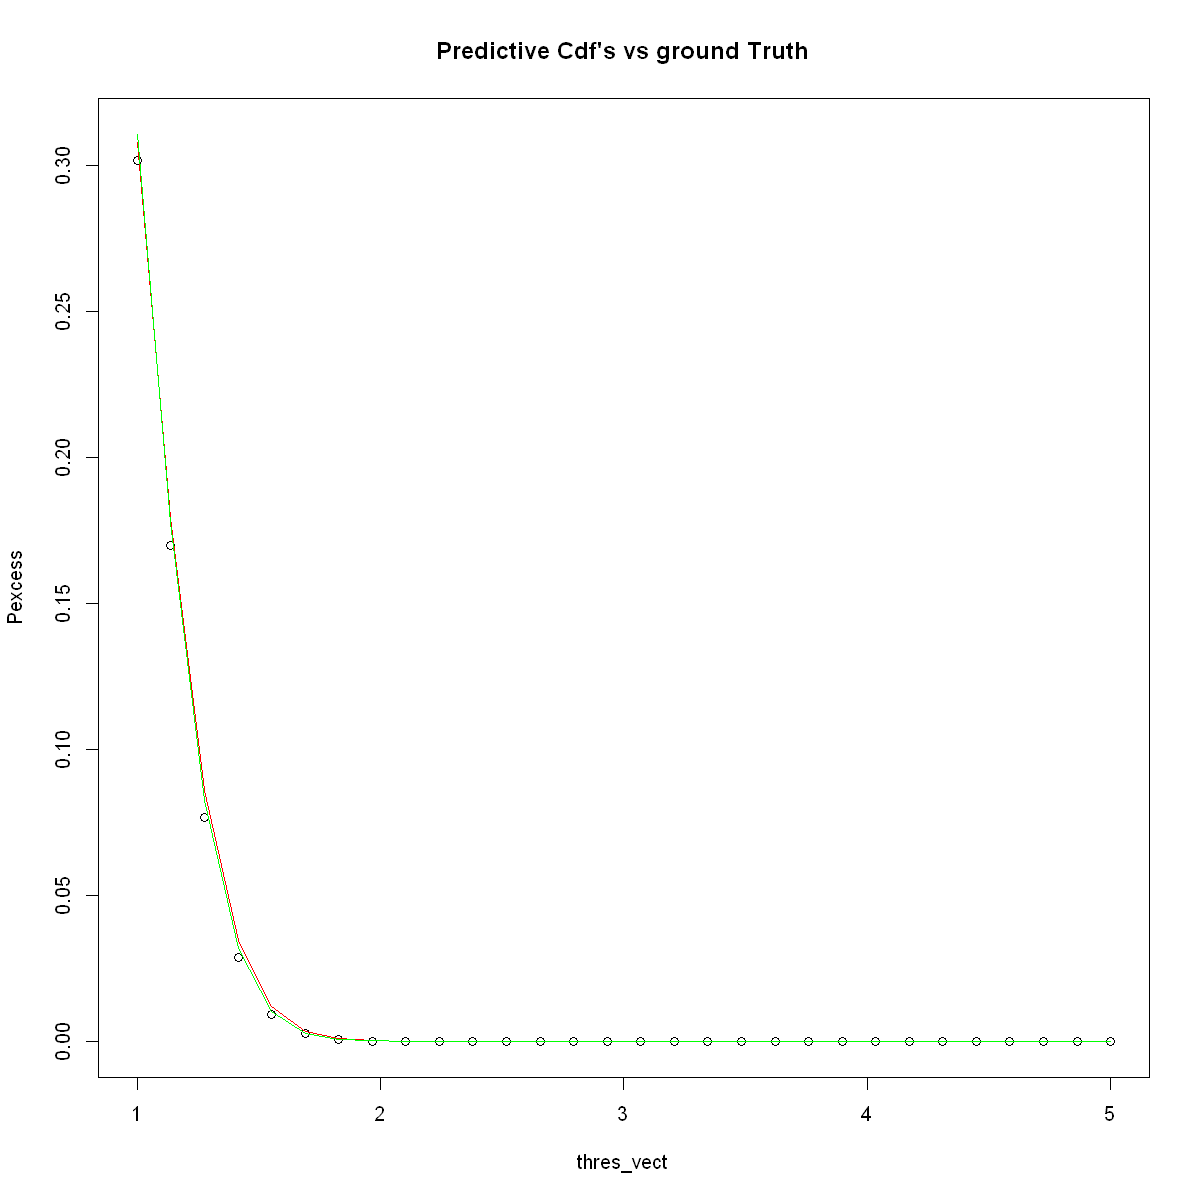

In [22]:
options(repr.plot.width=10, repr.plot.height=10)
ylim <- range(Pexcess, Pexcess_mh)                                       # to add Pexcess_vb
plot(thres_vect,Pexcess, ylim = ylim, main= "Predictive Cdf's vs ground Truth",main.cex=0.7)
lines(thres_vect, Pexcess_vb, col='red')                                    
lines(thres_vect, Pexcess_mh, col='green')
legend(1.5,1,legend=c("Ground truth", "VB CDF","MH CDF"),
       col=c("black","red","green"),pch = c(1,16,16),text.font=4,cex=2)

### Comments
* We can see from the graph above that The MH estimation(green plot) is better than VB estimation(red plot).
* Generally we can say that MH is more accurate but it needs more computation whereas VB is faster but it has more bias.

### Comments

* Consider now the tails of the mixture distribution: replace the third line in the above code chunk
    with: $$ thresvect <- seq (1 , 5 , length.out = 30) $$ 
   
* Comment your results, in particular explain the behavior of the Variational Bayes estimator. 



In [17]:
Pexcess <- rep(0,10)
Pexcess_vb <- Pexcess; Pexcess_mh <- Pexcess
thres_vect <-  seq(1, 5, length.out=30)
for(i in seq_along(thres_vect)){
     threshold <- rep(thres_vect[i], 2)
     Pexcess[i] <- 1 - gmcdf(x = threshold, Mu = Mu, Sigma=Sigma, p=p)
     Pexcess_vb[i] <- 1 -  vbPredictiveCdf (x=threshold, outputvb$Alphamat[,T] ,outputvb$Betamat[,T] 
                                       , outputvb$Marray[,,T], outputvb$Winv[,,,T], outputvb$Numat[,T])   ## complete the code:
    ## posterior predictive  estimator using VB output: 
    ## use vbPredictiveCdf
    
     Pexcess_mh[i] <-1 - MHpredictiveCdf( threshold , outputmh , burnin = 0, thin = 1)  ## complete the code:
    ## posterior predictive  estimator using MH output:
    ## use MHpredictiveCdf. 
}


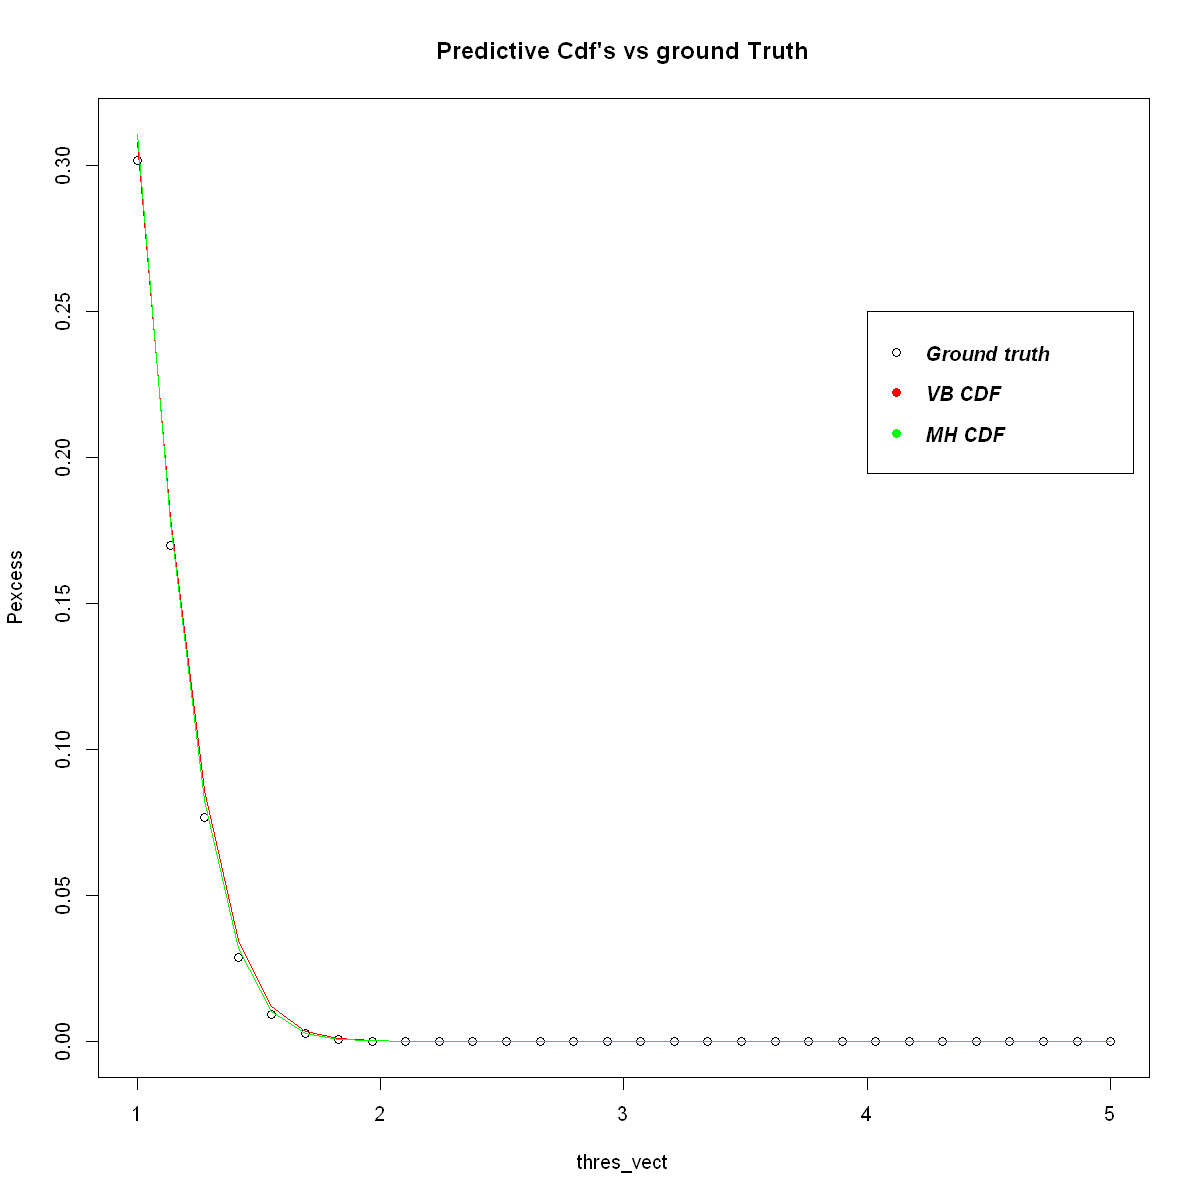

In [20]:
options(repr.plot.width=10, repr.plot.height=10)
ylim <- range(Pexcess, Pexcess_mh)                                       # to add Pexcess_vb
plot(thres_vect,Pexcess, ylim = ylim, main= "Predictive Cdf's vs ground Truth",main.cex=0.7)
lines(thres_vect, Pexcess_vb, col='red')                                    
lines(thres_vect, Pexcess_mh, col='green')
legend(4,0.25,legend=c("Ground truth", "VB CDF","MH CDF"),
       col=c("black","red","green"),pch = c(1,16,16),text.font=4,cex=1)

### Comments
In this example we changed the data ,we find out once again that VB is faster but the bias in this case for some x is more obvious (for instance : x $\in$ [1,2])  but the HM has shown once again its high accuracy.

<div class="alert alert-dark">
<span class="label label-success" style="font-size:15px;">Question 4 </span><br><br>
<p>
    We now focus on $\widehat{\varphi_{3}}$.Plot on the same graph $\varphi((x, x)|\rho, \mu_{1:k}, \Sigma_{1:k})$ and  $\widehat{\varphi_{3}}(x,x)$ together with posterior 90% credible sets obtained with the empirical quantiles of the time series $\varphi((x, x)|\rho^{t}, \mu_{1:k}^{t}, \Sigma_{1:k}^{t})$  ,$t \in 1...M $ where $(\rho_{t}, \mu_{1:k}^{t}, \Sigma_{1:k}^{t})$, $t \leq M $  is the output of the MH algorithm after thinning and
    discarding an appropriate burn-in period. </p>  <p>Comment the results. </p>

</div>

In [23]:
options(warn = -1 )
max_x = 30
thres_vect <-  seq(1, 5, length.out=max_x)
n_samples = 10000
quantile_01 = array(0,dim = max_x)
quantile_09 = array(0,dim = max_x)
index = 1
for(i in seq_along(thres_vect)){
   v = array(0, dim = c(n_samples))
   threshold <- rep(thres_vect[i], 2)

    for (  t in 1:n_samples ){
        v[t] = 1 - gmcdf(x = threshold, Mu =outputmh$Mu[,,t] , Sigma=outputmh$Sigma[,,,t], p=outputmh$p[,t])
      }

  v = sort(v)
  quantile_01[i] = v[round(n_samples/10)]
  quantile_09[i] = v[round(n_samples- n_samples/10)]
 
}




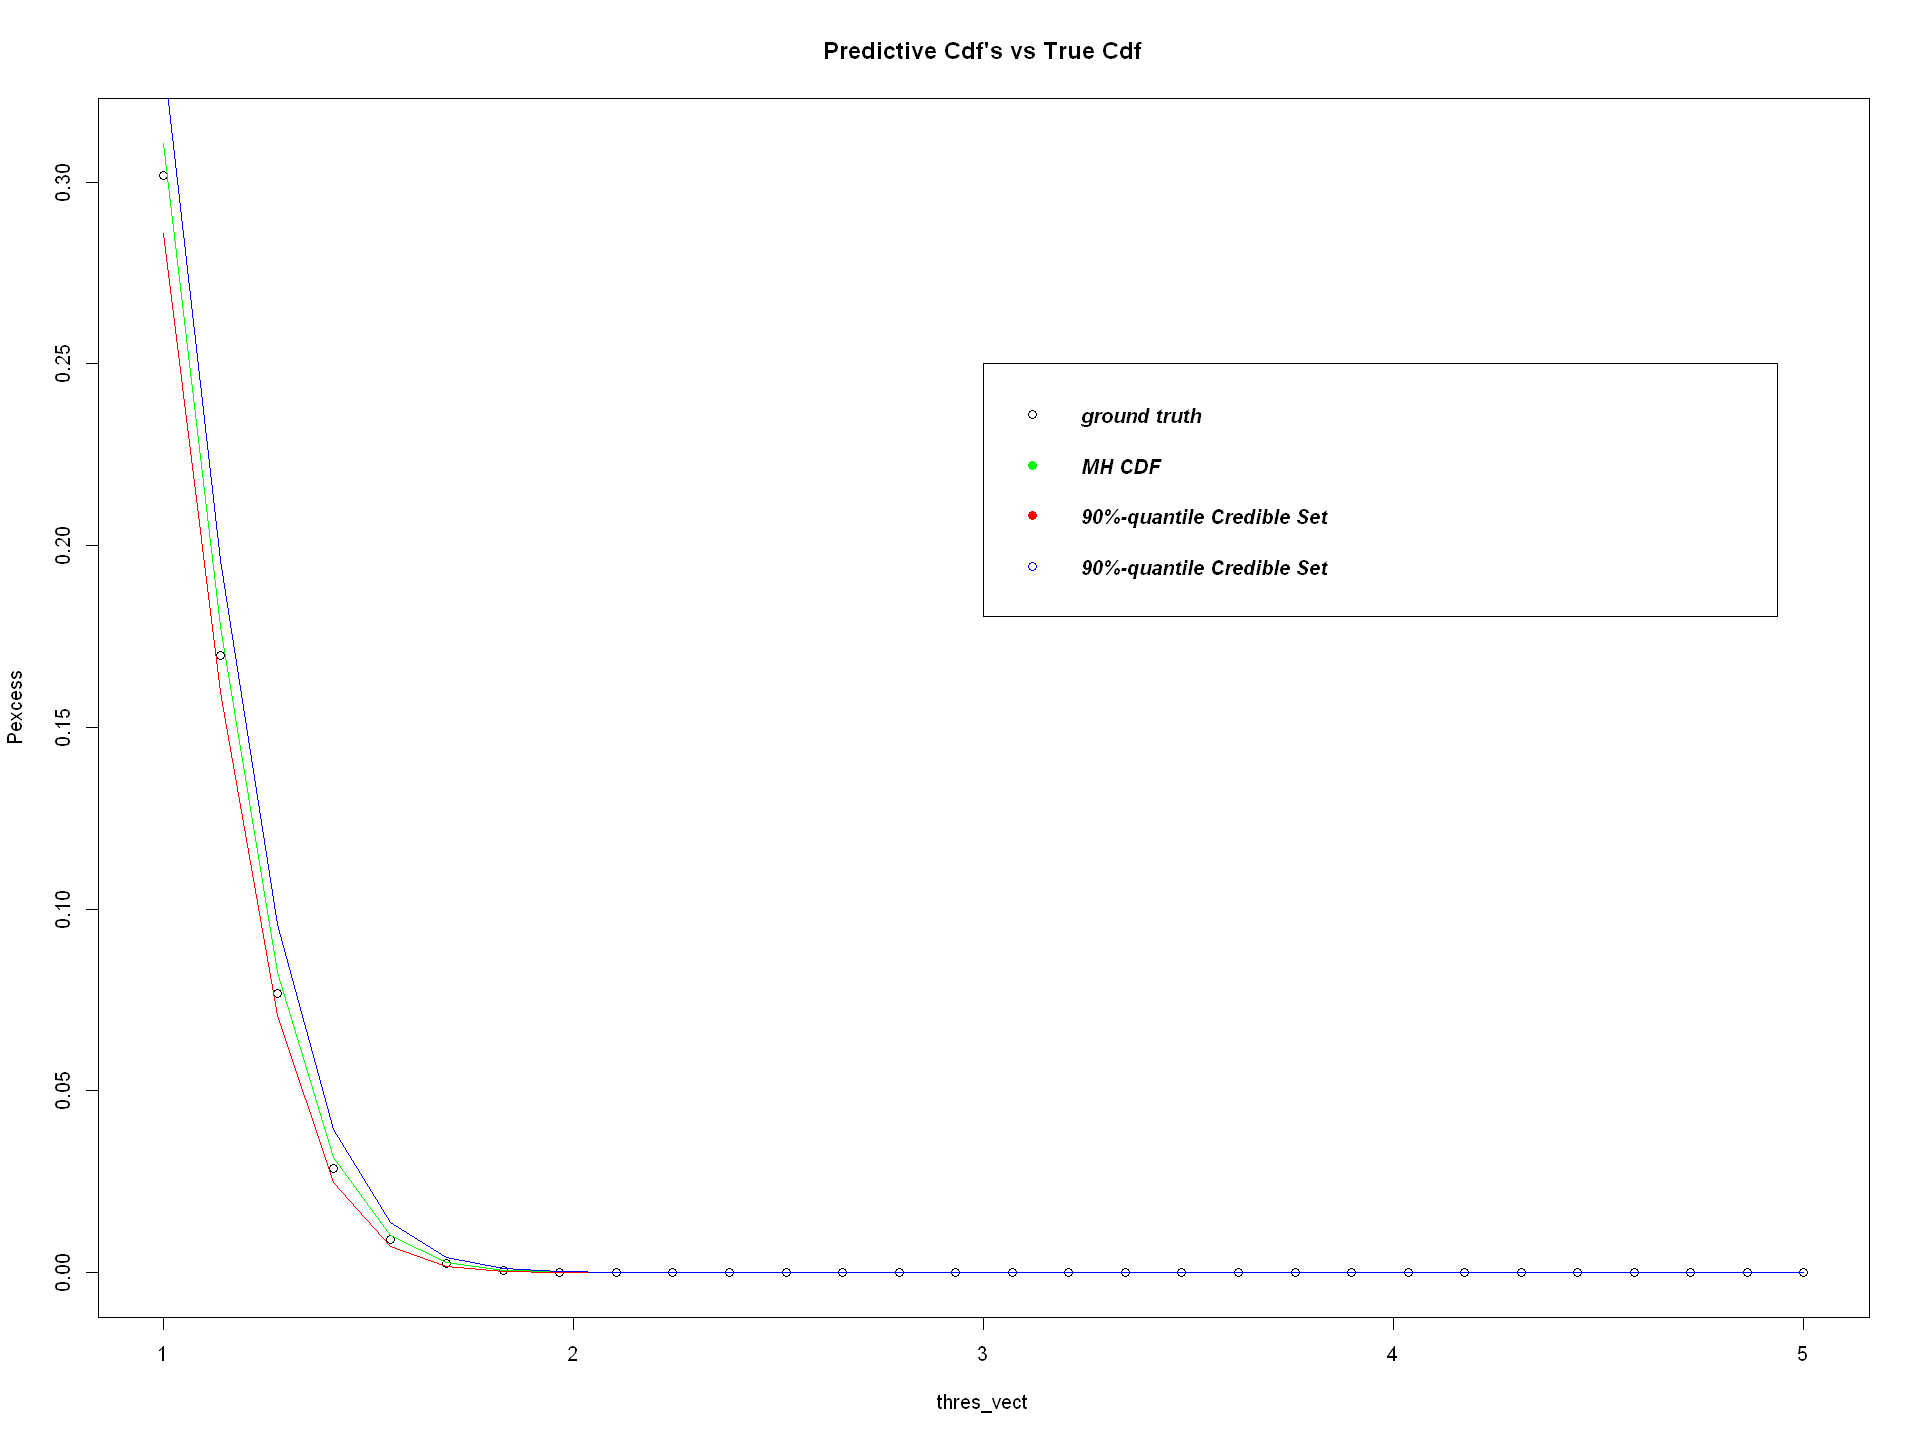

In [25]:
options(repr.plot.width=16, repr.plot.height=12)
ylim <- range(Pexcess, Pexcess_mh)                                       # to add Pexcess_vb
plot(thres_vect,Pexcess, ylim = ylim, main= "Predictive Cdf's vs True Cdf",main.cex=0.7)                                  
lines(thres_vect, Pexcess_mh, col='green')
lines(thres_vect,quantile_01,col = "red")
lines(thres_vect,quantile_09 , col = "blue")
legend(3,0.25,legend=c("ground truth","MH CDF","90%-quantile Credible Set","90%-quantile Credible Set"),
       col=c("black", "green","red","blue"),pch = c(1,16,16),text.font=4,cex=1)

### Comments
    We can see from the graph above that the 90% credible sets surround the ground truth and MH estimation.